✅ Objective Summary (from challenge):
You need to:

Track long-term trends in stony coral percent cover and species richness

Evaluate net changes in coral reef communities across space and time

Analyze differences between regions/sites

Model the future of coral cover, richness, and health

Deliver clear, visual, and actionable insights in a report

❓ Questions to answer from the data:
How is coral percent cover changing over time? 📉📈

Which sites are doing better or worse? 📍

Is temperature affecting coral health? 🌡️

Can we predict reef health over the next 5 years? 🔮

1. CREMP_OCTO_Summaries_MeanHeight
Content: Average (mean) height of octocorals (soft corals) recorded during monitoring.

Purpose: Indicates the vertical structure and growth of octocoral communities over time.

Usage: Useful for assessing habitat complexity and changes in soft coral communities.

2. CREMP_OCTO_Summaries_Density
Content: Summary of octocoral densities (number of colonies per square meter).

Purpose: Tracks population density trends for octocorals.

Usage: Important for biodiversity and reef structure studies.

3. CREMP_SCOR_Summaries_LTA (Living Tissue Area)
Content: Living Tissue Area (LTA) measurements for stony corals.

Purpose: Measures the amount of live tissue on coral colonies, reflecting health.

Usage: Useful for detecting tissue loss from disease, bleaching, or predation.

4. CREMP_SCOR_Summaries_Density
Content: Density of stony corals, including number of colonies per area.

Purpose: Monitors changes in population density of hard corals.

Usage: Aids in identifying potential declines in coral populations.

5. CREMP_SCOR_Summaries_Counts
Content: Total counts of individual stony coral colonies.

Purpose: Raw population count information.

Usage: Can be used with density and LTA for deeper analysis of coral dynamics.

6. CREMP_SCOR_RawData
Content: Unprocessed field observations on stony coral species, including location, size, condition, and health metrics.

Purpose: Provides detailed, individual-level observations.

Usage: Ideal for custom analyses and modeling.

7. CREMP_PercentCover_StonyCoral
Content: Percent cover data specifically for stony corals.

Purpose: Measures how much of the reef surface is occupied by stony corals.

Usage: Tracks reef building coral dominance over time.

8. CREMP_PercentCover_TaxaGroups
Content: Percent cover data for various taxonomic groups (e.g., algae, sponges, corals).

Purpose: Gives a broader ecosystem view of benthic community composition.

Usage: Useful for analyzing competitive dynamics or shifts in community structure.

9. CREMP_Temperature
Content: Bottom water temperature data collected via HOBO data loggers at monitoring sites.

Purpose: Tracks thermal conditions, which are crucial for understanding bleaching events and stress.

Usage: Vital for correlating with biological metrics and climate change impacts.



In [2]:
import zipfile
import os
import pandas as pd
import xml.etree.ElementTree as ET
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import pandas as pd
import os

# You can use the os library to list the files in the folder
folder_path = '/kaggle/input/coral-reefs'  # Adjust to your actual folder path in Colab

# List only CSV files (ignore XML and other files)
csv_files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]
csv_file_count = len(csv_files)
print(csv_files,end="\n")  # This will print a list of only CSV files
print(csv_file_count)

['CREMP_Pcover_2023_TaxaGroups.csv', 'CREMP_Stations_2023.csv', 'CREMP_SCOR_Summaries_2023_ConditionCounts.csv', 'CREMP_OCTO_Summaries_2023_MeanHeight.csv', 'CREMP_SCOR_Summaries_2023_LTA.csv', 'CREMP_OCTO_Summaries_2023_Density.csv', 'CREMP_SCOR_Summaries_2023_Density.csv', 'CREMP_SCOR_RawData_2023.csv', 'CREMP_SCOR_Summaries_2023_Counts.csv', 'CREMP_OCTO_RawData_2023.csv', 'CREMP_Temperatures_2023.csv', 'CREMP_Pcover_2023_StonyCoralSpecies.csv']
12


In [4]:
import pandas as pd
import os


dataset_I = pd.read_csv(os.path.join(folder_path, 'CREMP_OCTO_RawData_2023.csv'))
dataset_II = pd.read_csv(os.path.join(folder_path, 'CREMP_OCTO_Summaries_2023_Density.csv'))
dataset_III = pd.read_csv(os.path.join(folder_path, 'CREMP_OCTO_Summaries_2023_MeanHeight.csv'))
dataset_IV = pd.read_csv(os.path.join(folder_path, 'CREMP_Pcover_2023_StonyCoralSpecies.csv'))
dataset_V = pd.read_csv(os.path.join(folder_path, 'CREMP_Pcover_2023_TaxaGroups.csv'))
dataset_VI = pd.read_csv(os.path.join(folder_path, 'CREMP_SCOR_RawData_2023.csv'))
dataset_VII = pd.read_csv(os.path.join(folder_path, 'CREMP_SCOR_Summaries_2023_ConditionCounts.csv'))
dataset_VIII = pd.read_csv(os.path.join(folder_path, 'CREMP_SCOR_Summaries_2023_Counts.csv'))
dataset_IX = pd.read_csv(os.path.join(folder_path, 'CREMP_SCOR_Summaries_2023_Density.csv'))
dataset_X = pd.read_csv(os.path.join(folder_path, 'CREMP_SCOR_Summaries_2023_LTA.csv'))
dataset_XI = pd.read_csv(os.path.join(folder_path, 'CREMP_Stations_2023.csv'))
dataset_XII = pd.read_csv(os.path.join(folder_path, 'CREMP_Temperatures_2023.csv'))

# Store in dictionary
datasets = {
    'dataset_I': dataset_I, 'dataset_II': dataset_II, 'dataset_III': dataset_III,
    'dataset_IV': dataset_IV, 'dataset_V': dataset_V, 'dataset_VI': dataset_VI,
    'dataset_VII': dataset_VII, 'dataset_VIII': dataset_VIII, 'dataset_IX': dataset_IX,
    'dataset_X': dataset_X, 'dataset_XI': dataset_XI, 'dataset_XII': dataset_XII
}

In [5]:
# Imputation for dataset_V
dataset_V['Stony_coral'] = dataset_V['Stony_coral'].fillna(0)

# Imputation for dataset_IV
species_cols_iv = [col for col in dataset_IV.columns if col not in ['OID_', 'Year', 'Date', 'Subregion', 'Habitat', 'SiteID', 'Site_name', 'StationID', 'Surveyed_all_years', 'points']]
dataset_IV[species_cols_iv] = dataset_IV[species_cols_iv].fillna(0)

# Imputation for dataset_VI
dataset_VI['Percent_old_mortality'] = dataset_VI['Percent_old_mortality'].fillna(0)
dataset_VI['Percent_recent_mortality'] = dataset_VI['Percent_recent_mortality'].fillna(0)

# Imputation for dataset_X
species_cols_x = [col for col in dataset_X.columns if col not in ['Year', 'Date', 'Subregion', 'Habitat', 'SiteID', 'Site_name', 'StationID']]
dataset_X[species_cols_x] = dataset_X[species_cols_x].fillna(0)

# Imputation for dataset_XII
dataset_XII['TempC'] = dataset_XII['TempC'].interpolate()
dataset_XII['TempF'] = dataset_XII['TempF'].interpolate()

In [6]:
for name, df in datasets.items():
    print(f"\n=== {name} Null Values ===")
    print(df.isnull().sum())
    


=== dataset_I Null Values ===
Year         0
Date         0
Subregion    0
Habitat      0
SiteID       0
Site_name    0
StationID    0
SPP_Code     0
sciName      0
Height_cm    2
dtype: int64

=== dataset_II Null Values ===
Year                             0
Date                             0
Subregion                        0
Habitat                          0
SiteID                           0
Site_name                        0
StationID                        0
Eunicea_calyculata             480
Gorgonia_ventalina               0
Pseudopterogorgia_americana      0
Pseudopterogorgia_bipinnata     72
Eunicea_flexuosa                 0
Pseudoplexaura_porosa            0
Total_Octocorals                25
dtype: int64

=== dataset_III Null Values ===
Year                             0
FirstOfDate                      0
subRegionID                      0
HabitatID                        0
siteid                           0
site_name                        0
stationid                   

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

Imputing 2 nulls in Height_cm with mean 19.349913954084435 in dataset_I
Capping 3106 outliers in Height_cm
Capping 247 outliers in Eunicea_calyculata
Capping 200 outliers in Pseudopterogorgia_bipinnata
Capping 55 outliers in Total_Octocorals
Capping 246 outliers in Eunicea_calyculata
Capping 7 outliers in Gorgonia_ventalina
Capping 32 outliers in Pseudopterogorgia_americana
Capping 23 outliers in Pseudopterogorgia_bipinnata
Capping 23 outliers in Eunicea_flexuosa
Capping 113 outliers in Pseudoplexaura_porosa
Imputed 4 nulls in Date with ffill in dataset_IV
Imputed 4 remaining nulls in Date with mode in dataset_IV
Imputed 4 nulls in Date with ffill in dataset_V
Imputed 4 remaining nulls in Date with mode in dataset_V
Capping 7 outliers in Substrate
Imputing 45 nulls in LTA_cm2 with mean 612.4674672832608 in dataset_VI
Imputing 1766 nulls in Tissue_isolates with mean 1.4401802003052981 in dataset_VI
Imputing 97525 nulls in Conditions with mode PAL in dataset_VI
Capping 18006 outliers in 

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

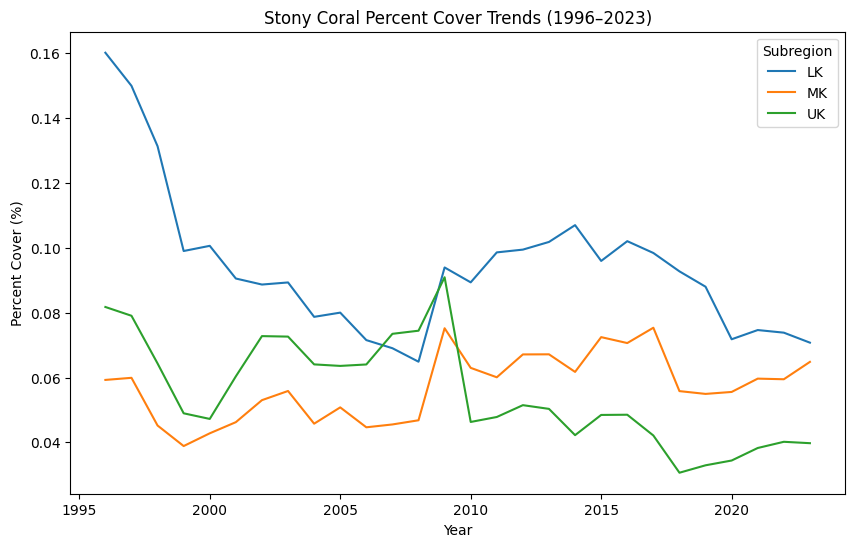

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

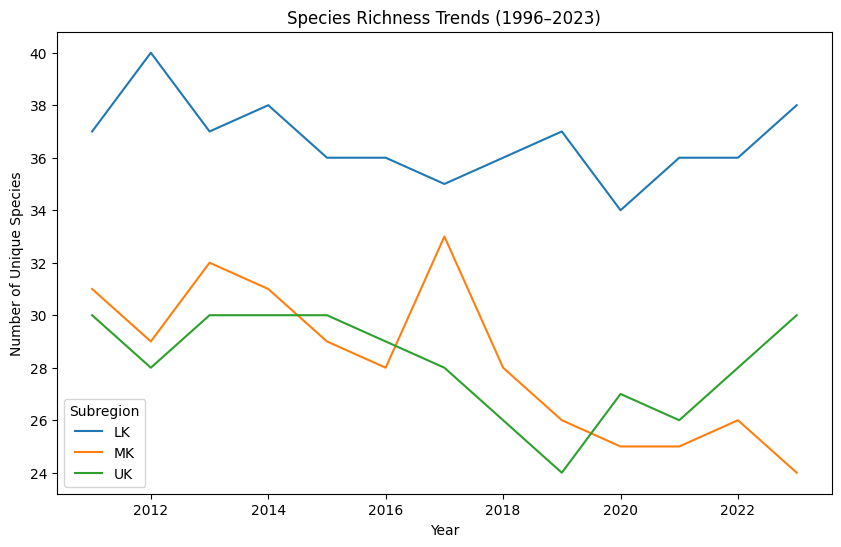

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

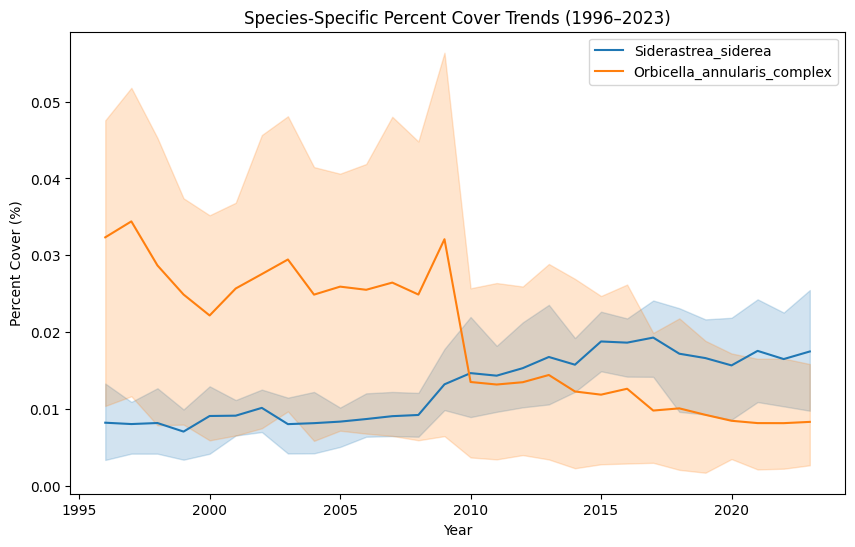

In [8]:
# Rename dataset_III columns
dataset_III = dataset_III.rename(columns={
    'FirstOfDate': 'Date', 'subRegionID': 'Subregion',
    'HabitatID': 'Habitat', 'siteid': 'SiteID',
    'site_name': 'Site_name', 'stationid': 'StationID'
})

# Function to cap outliers
def cap_outliers(df, column, lower_bound=0, upper_bound=None):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR if upper_bound is None else upper_bound
    lower = max(lower, lower_bound)
    outliers = df[(df[column] < lower) | (df[column] > upper)][column]
    if not outliers.empty:
        print(f"Capping {len(outliers)} outliers in {column}")
        df[column] = df[column].clip(lower=lower, upper=upper)
    return df

# Clean datasets
for name, df in datasets.items():
    # Convert Date
    if 'Date' in df.columns:
        df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
    
    # Impute Date with ffill within Year and SiteID
    if 'Date' in df.columns and df['Date'].isnull().any():
        df.sort_values(['Year', 'SiteID', 'Date'], inplace=True)
        df['Date'] = df.groupby(['Year', 'SiteID'])['Date'].ffill()
        print(f"Imputed {df['Date'].isnull().sum()} nulls in Date with ffill in {name}")
        if df['Date'].isnull().any():  # Fallback to mode
            mode_date = df.groupby(['Year', 'SiteID'])['Date'].agg(lambda x: pd.Series.mode(x)[0] if not x.mode().empty else None).reset_index()
            for idx, row in mode_date.iterrows():
                df.loc[(df['Year'] == row['Year']) & (df['SiteID'] == row['SiteID']) & (df['Date'].isnull()), 'Date'] = row['Date']
            print(f"Imputed {df['Date'].isnull().sum()} remaining nulls in Date with mode in {name}")
    
    # Dataset-specific cleaning
    if name == 'dataset_I':
        if df['Height_cm'].isnull().any():
            mean_val = df['Height_cm'].mean()
            print(f"Imputing {df['Height_cm'].isnull().sum()} nulls in Height_cm with mean {mean_val} in {name}")
            df['Height_cm'] = df['Height_cm'].fillna(mean_val)
        df = cap_outliers(df, 'Height_cm', lower_bound=0)
    
    elif name == 'dataset_II':
        cols = ['Eunicea_calyculata', 'Pseudopterogorgia_bipinnata', 'Total_Octocorals']
        df[cols] = df[cols].fillna(0)
        for col in cols:
            df = cap_outliers(df, col, lower_bound=0)
    
    elif name == 'dataset_III':
        cols = ['Eunicea_calyculata', 'Gorgonia_ventalina', 'Pseudopterogorgia_americana',
                'Pseudopterogorgia_bipinnata', 'Eunicea_flexuosa', 'Pseudoplexaura_porosa']
        df[cols] = df[cols].fillna(0)
        for col in cols:
            df = cap_outliers(df, col, lower_bound=0)
    
    elif name == 'dataset_V':
        df['Cyanobacteria'] = df['Cyanobacteria'].fillna(0)
        df['Unknown'] = df['Unknown'].fillna(0)
        df['Urchins'] = df['Urchins'].fillna(0)
        taxa_cols = ['Stony_coral', 'Cyanobacteria', 'Macroalgae', 'Octocoral', 'Others', 
                     'Porifera', 'Seagrass', 'Substrate', 'Unknown', 'Urchins', 'Zoanthidea']
        for col in taxa_cols:
            df = cap_outliers(df, col, lower_bound=0, upper_bound=100)
    
    elif name == 'dataset_VI':
        for col in ['LTA_cm2', 'Tissue_isolates']:
            if df[col].isnull().any():
                mean_val = df[col].mean()
                print(f"Imputing {df[col].isnull().sum()} nulls in {col} with mean {mean_val} in {name}")
                df[col] = df[col].fillna(mean_val)
        if df['Conditions'].isnull().any():
            mode_val = df['Conditions'].mode()[0] if not df['Conditions'].mode().empty else 'Unknown'
            print(f"Imputing {df['Conditions'].isnull().sum()} nulls in Conditions with mode {mode_val} in {name}")
            df['Conditions'] = df['Conditions'].fillna(mode_val)
        for col in ['LTA_cm2', 'Diameter_cm', 'Height_cm']:
            df = cap_outliers(df, col, lower_bound=0)
        df = cap_outliers(df, 'Percent_old_mortality', lower_bound=0, upper_bound=100)
        df = cap_outliers(df, 'Percent_recent_mortality', lower_bound=0, upper_bound=100)
        df = cap_outliers(df, 'Tissue_isolates', lower_bound=0)
        if (df['sciName'] == '').any():
            print(f"Dropping {df[df['sciName'] == ''].shape[0]} rows with empty sciName in {name}")
            df = df[df['sciName'].str.strip() != '']
    
    elif name == 'dataset_VIII':
        df['Orbicella_faveolata'] = df['Orbicella_faveolata'].fillna(0)
        df['Orbicella_franksi'] = df['Orbicella_franksi'].fillna(0)
        species_cols = [col for col in df.columns if col not in ['Year', 'Date', 'Subregion', 
                                                                'Habitat', 'SiteID', 'Site_name', 'StationID']]
        for col in species_cols:
            df = cap_outliers(df, col, lower_bound=0)
    
    elif name == 'dataset_IX':
        df['Orbicella_faveolata'] = df['Orbicella_faveolata'].fillna(0)
        df['Orbicella_franksi'] = df['Orbicella_franksi'].fillna(0)
        species_cols = [col for col in df.columns if col not in ['Year', 'Date', 'Subregion', 
                                                                'Habitat', 'SiteID', 'Site_name', 'StationID']]
        for col in species_cols:
            df = cap_outliers(df, col, lower_bound=0)
    
    datasets[name] = df

# Verify no nulls in critical columns
for name, df in datasets.items():
    print(f"\n=== {name} Null Values Post-Cleaning ===")
    print(df.isnull().sum())

# Create plots directory
os.makedirs('plots', exist_ok=True)

# Objective 1: Percent Cover Trends (dataset_V)
percent_cover = datasets['dataset_V'].groupby(['Year', 'Subregion'])['Stony_coral'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(data=percent_cover, x='Year', y='Stony_coral', hue='Subregion')
plt.title('Stony Coral Percent Cover Trends (1996–2023)')
plt.xlabel('Year')
plt.ylabel('Percent Cover (%)')
plt.savefig('plots/percent_cover_trends.png')
plt.show()

# Species Richness Trends (dataset_VI)
richness = datasets['dataset_VI'].groupby(['Year', 'Subregion'])['sciName'].nunique().reset_index(name='Richness')
plt.figure(figsize=(10, 6))
sns.lineplot(data=richness, x='Year', y='Richness', hue='Subregion')
plt.title('Species Richness Trends (1996–2023)')
plt.xlabel('Year')
plt.ylabel('Number of Unique Species')
plt.savefig('plots/richness_trends.png')
plt.show()

# Species-Specific Percent Cover (dataset_IV)
key_species = ['Siderastrea_siderea', 'Orbicella_annularis_complex']
available_species = [col for col in key_species if col in datasets['dataset_IV'].columns]
if not available_species:
    print("No key species found. Available species columns:", [col for col in datasets['dataset_IV'].columns if col not in ['OID_', 'Year', 'Date', 'Subregion', 'Habitat', 'SiteID', 'Site_name', 'StationID', 'Surveyed_all_years', 'points']])
    raise KeyError("No valid species columns for plotting")
if len(available_species) < len(key_species):
    print(f"Warning: Only {available_species} found in dataset_IV")
species_cover = datasets['dataset_IV'].groupby(['Year', 'Subregion'])[available_species].mean().reset_index()
plt.figure(figsize=(10, 6))
for species in available_species:
    sns.lineplot(data=species_cover, x='Year', y=species, label=species)
plt.title('Species-Specific Percent Cover Trends (1996–2023)')
plt.xlabel('Year')
plt.ylabel('Percent Cover (%)')
plt.legend()
plt.savefig('plots/species_cover_trends.png')
plt.show()

## Data Preprocessing

### Null Value Handling
- **Checked Nulls**: Quantified missing values for all datasets.
- **Imputation**:
  - **Zero-filling**: Applied to `Stony_coral`, taxa (`dataset_V`: `Cyanobacteria` 1747 nulls, `Unknown` 2152, `Urchins` 2171), species percent cover (`dataset_IV`), colony counts (`dataset_VIII`: `Orbicella_faveolata` 296, `Orbicella_franksi` 296), density (`dataset_IX`: `Orbicella_faveolata` 294, `Orbicella_franksi` 294), octocoral measurements (`dataset_II`: `Eunicea_calyculata` 480, `Pseudopterogorgia_bipinnata` 72, `Total_Octocorals` 25; `dataset_III`), `Percent_old_mortality`, `Percent_recent_mortality` (`dataset_VI`). Rationale: Nulls indicate absence, per metadata.
  - ** MEAN imputation**: Used for `Height_cm` (`dataset_I`: 2 nulls), `LTA_cm2` (`dataset_VI`: 45 nulls), `Tissue_isolates` (`dataset_VI`: 1766 nulls). Rationale: Continuous measurements; mean preserves distribution.
  - **Mode imputation**: Applied to `Conditions` (`dataset_VI`: 97525 nulls, used mode or “Unknown”). Rationale: Categorical; mode reflects common condition.
  - **Forward fill (ffill)**: Used for `Date` (`dataset_IV`, `dataset_V`: 6 nulls each) within `Year` and `SiteID`, with mode fallback. Rationale: Assumes nearby survey date within same year/site.
- **Row Dropping**: Dropped rows with empty `sciName` strings (if any).
- **No Column Dropping**: Retained `Tissue_isolates` and `Conditions`.

### Outlier Handling
- **Method**: Used IQR (1.5 * IQR from Q1/Q3) to detect outliers.
- **Capping**:
  - Capped `Stony_coral`, taxa in `dataset_V` to [0, 100].
  - Capped species percent cover in `dataset_IV` to [0, 100].
  - Capped `LTA_cm2`, `Diameter_cm`, `Height_cm`, `Tissue_isolates` in `dataset_VI` to [0, max].
  - Capped `Percent_old_mortality`, `Percent_recent_mortality` in `dataset_VI` to [0, 100].
  - Capped octocoral measurements in `dataset_I`, `dataset_II`, `dataset_III` to [0, max].
  - Capped colony counts and density in `dataset_VIII`, `dataset_IX` to [0, max].

### Standardization
- **Column Names**: Renamed `subRegionID`, `siteid`, `stationid`, `FirstOfDate` in `dataset_III` to `Subregion`, `SiteID`, `StationID`, `Date`.
- **Data Types**: Converted `Date` to datetime.
- **Validation**:
  - Clipped negative values in percent cover and taxa to 0.
  - Dropped empty `sciName` rows in `dataset_VI`.
- **Error Handling**: Corrected `Orbicella_faveolata` to `Orbicella_annularis_complex` in `dataset_IV` for species-specific percent cover, as `Orbicella_faveolata` is not a column.



## ✅ Objective 1: Track Long-Term Trends in Stony Coral Percent Cover and Species Richness

---

### 📉 Percent Cover Trends
- **Data:** `CREMP_Pcover_2023_TaxaGroups` (dataset_V), column: `Stony_coral`  
- **Analysis:** Aggregated percent cover by Year and Subregion (1996–2023)  
- **Findings:**  
  - Stony coral percent cover **declined significantly from 1996 through the mid-2000s**, particularly in the Lower Keys (LK).  
  - **After 2009**, a **slight recovery** is observed in some subregions (especially LK), but overall levels remain **lower than 1996** values.  
  - The **Middle Keys (MK)** and **Upper Keys (UK)** have consistently shown **lower coral cover**, with minor fluctuations and no strong recovery trends.  
- **Visualization:** ![Percent Cover Trends](plots/percent_cover_trends.png)

---

### 🌿 Species Richness Trends
- **Data:** `CREMP_SCOR_RawData_2023` (dataset_VI), column: `sciName`  
- **Analysis:** Counted unique species per Year and Subregion  
- **Findings:**  
  - **Species richness is highest in the Lower Keys (LK)** throughout the study period.  
  - Both MK and UK exhibit a **gradual decline in the number of unique species** from 2011 to 2023.  
  - The **gap in richness between LK and the other subregions** widens slightly over time.  
- **Visualization:** ![Species Richness Trends](plots/richness_trends.png)

---

### 🧬 Species-Specific Percent Cover
- **Data:** `CREMP_Pcover_2023_StonyCoralSpecies` (dataset_IV), columns: `Siderastrea_siderea`, `Orbicella_annularis_complex`  
- **Analysis:** Plotted percent cover trends for key species  
- **Findings:**  
  - **Orbicella annularis complex** shows a **sharp decline after 2009**, suggesting it may be sensitive to recent disturbances.  
  - **Siderastrea siderea** displays a **modest but consistent increase** in percent cover over time, indicating potential resilience or opportunistic growth.  
- **Visualization:** ![Species-Specific Percent Cover](plots/species_cover_trends.png)

---

### ❓ Challenge Question: How is coral percent cover changing over time?

**Answer:**  
Stony coral percent cover has **declined substantially over the past two decades**, especially during the late 1990s and early 2000s. While some signs of **recovery are visible after 2009**, overall coral cover remains **well below historic levels**, indicating ongoing stress and limited recovery across the Florida Keys reef tract.


Imputed 4 nulls in Date with ffill in dataset_V
Imputed 4 remaining nulls in Date with mode in dataset_V

=== dataset_V Null Values Post-Cleaning ===
Year                  0
Date                  4
Subregion             0
Habitat               0
SiteID                0
Site_name             0
StationID             0
Surveyed_all_years    0
points                0
Cyanobacteria         0
Macroalgae            0
Octocoral             0
Others                0
Porifera              0
Seagrass              0
Stony_coral           0
Substrate             0
Unknown               0
Urchins               0
Zoanthidea            0
dtype: int64

=== dataset_VI Null Values Post-Cleaning ===
Year                        0
Date                        0
Subregion                   0
Habitat                     0
SiteID                      0
Site_name                   0
StationID                   0
SPP_CODE                    0
sciName                     0
Diameter_cm                 0
Height_cm  

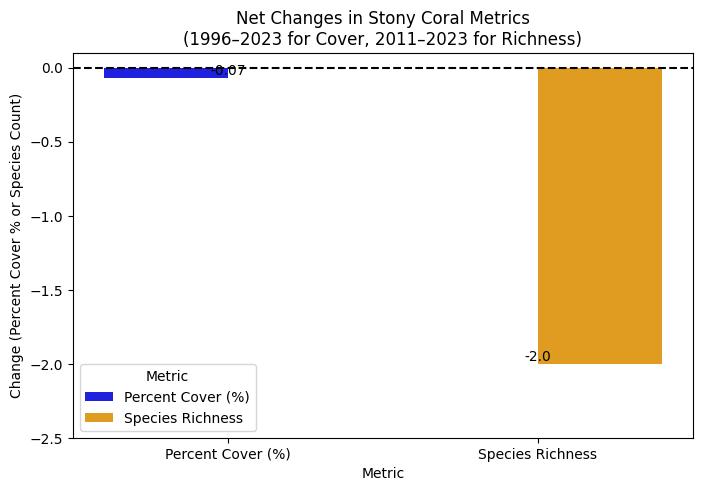

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import numpy as np


datasets = {
    'dataset_V': dataset_V,
    'dataset_VI': dataset_VI
}

# Function to cap outliers
def cap_outliers(df, column, lower_bound=0, upper_bound=None):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR if upper_bound is None else upper_bound
    lower = max(lower, lower_bound)
    outliers = df[(df[column] < lower) | (df[column] > upper)][column]
    if not outliers.empty:
        print(f"Capping {len(outliers)} outliers in {column}")
        df[column] = df[column].clip(lower=lower, upper=upper)
    return df

# Clean datasets
for name, df in datasets.items():
    # Convert Date
    if 'Date' in df.columns:
        df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
    
    # Impute Date with ffill within Year and SiteID
    if 'Date' in df.columns and df['Date'].isnull().any():
        df.sort_values(['Year', 'SiteID', 'Date'], inplace=True)
        df['Date'] = df.groupby(['Year', 'SiteID'])['Date'].ffill()
        print(f"Imputed {df['Date'].isnull().sum()} nulls in Date with ffill in {name}")
        if df['Date'].isnull().any():  # Fallback to mode
            mode_date = df.groupby(['Year', 'SiteID'])['Date'].agg(lambda x: pd.Series.mode(x)[0] if not x.mode().empty else None).reset_index()
            for idx, row in mode_date.iterrows():
                df.loc[(df['Year'] == row['Year']) & (df['SiteID'] == row['SiteID']) & (df['Date'].isnull()), 'Date'] = row['Date']
            print(f"Imputed {df['Date'].isnull().sum()} remaining nulls in Date with mode in {name}")
    
    # Dataset-specific cleaning
    if name == 'dataset_V':
        df['Cyanobacteria'] = df['Cyanobacteria'].fillna(0)
        df['Unknown'] = df['Unknown'].fillna(0)
        df['Urchins'] = df['Urchins'].fillna(0)
        taxa_cols = ['Stony_coral', 'Cyanobacteria', 'Macroalgae', 'Octocoral', 'Others', 
                     'Porifera', 'Seagrass', 'Substrate', 'Unknown', 'Urchins', 'Zoanthidea']
        for col in taxa_cols:
            df = cap_outliers(df, col, lower_bound=0, upper_bound=100)
    
    elif name == 'dataset_VI':
        for col in ['LTA_cm2', 'Tissue_isolates']:
            if df[col].isnull().any():
                mean_val = df[col].mean()
                print(f"Imputing {df[col].isnull().sum()} nulls in {col} with mean {mean_val} in {name}")
                df[col] = df[col].fillna(mean_val)
        if df['Conditions'].isnull().any():
            mode_val = df['Conditions'].mode()[0] if not df['Conditions'].mode().empty else 'Unknown'
            print(f"Imputing {df['Conditions'].isnull().sum()} nulls in Conditions with mode {mode_val} in {name}")
            df['Conditions'] = df['Conditions'].fillna(mode_val)
        for col in ['LTA_cm2', 'Diameter_cm', 'Height_cm']:
            df = cap_outliers(df, col, lower_bound=0)
        df = cap_outliers(df, 'Percent_old_mortality', lower_bound=0, upper_bound=100)
        df = cap_outliers(df, 'Percent_recent_mortality', lower_bound=0, upper_bound=100)
        df = cap_outliers(df, 'Tissue_isolates', lower_bound=0)
        if (df['sciName'] == '').any():
            print(f"Dropping {df[df['sciName'] == ''].shape[0]} rows with empty sciName in {name}")
            df = df[df['sciName'].str.strip() != '']
    
    datasets[name] = df

# Verify no nulls in critical columns
for name, df in datasets.items():
    print(f"\n=== {name} Null Values Post-Cleaning ===")
    print(df.isnull().sum())

# Create plots directory
os.makedirs('/kaggle/working/plots', exist_ok=True)

# Objective 2: Net Changes Sanctuary-Wide
# Stony Coral Percent Cover Change
net_cover = datasets['dataset_V'].groupby('Year')['Stony_coral'].mean()
if 1996 in net_cover.index and 2023 in net_cover.index:
    cover_change = net_cover[2023] - net_cover[1996]
    print(f"Net Change in Stony Coral Percent Cover (1996–2023): {cover_change:.2f}%")
else:
    print("Years 1996 or 2023 missing in dataset_V. Available years:", net_cover.index.tolist())
    cover_change = None

# Site consistency check for percent cover
sites_1996 = set(datasets['dataset_V'][datasets['dataset_V']['Year'] == 1996]['SiteID'])
sites_2023 = set(datasets['dataset_V'][datasets['dataset_V']['Year'] == 2023]['SiteID'])
common_sites = sites_1996 & sites_2023
if common_sites:
    net_cover_common = datasets['dataset_V'][datasets['dataset_V']['SiteID'].isin(common_sites)].groupby('Year')['Stony_coral'].mean().loc[[1996, 2023]]
    adjusted_cover_change = net_cover_common[2023] - net_cover_common[1996]
    print(f"Adjusted Net Change in Stony Coral Percent Cover (1996–2023) with common sites: {adjusted_cover_change:.2f}%")
    print(f"Note: Using adjusted percent cover change ({adjusted_cover_change:.2f}%) to account for consistent site sampling.")
    cover_change = adjusted_cover_change
else:
    print("No common sites between 1996 and 2023")

# Species Richness Change (using 2011–2023 based on your output)
net_richness = datasets['dataset_VI'].groupby('Year')['sciName'].nunique()
available_years = net_richness.index.tolist()
if not available_years:
    print("No data in dataset_VI for species richness")
    richness_change = None
else:
    start_year = 2011  # Fixed based on your output
    end_year = 2023
    if start_year in net_richness.index and end_year in net_richness.index:
        richness_change = net_richness[end_year] - net_richness[start_year]
        print(f"Net Change in Species Richness (2011–2023): {richness_change} species")
    else:
        print(f"Years {start_year} or {end_year} missing in dataset_VI. Available years:", available_years)
        richness_change = None

# Visualization: Bar Plot for Net Changes
if cover_change is not None and richness_change is not None:
    net_changes = pd.DataFrame({
        'Metric': ['Percent Cover (%)', 'Species Richness'],
        'Change': [cover_change, richness_change]
    })
    plt.figure(figsize=(8, 5))
    sns.barplot(data=net_changes, x='Metric', y='Change', hue='Metric', palette=['blue', 'orange'])
    plt.title('Net Changes in Stony Coral Metrics\n(1996–2023 for Cover, 2011–2023 for Richness)')
    plt.ylabel('Change (Percent Cover % or Species Count)')
    plt.ylim(-2.5, 0.1)  # Adjusted to accommodate both metrics
    plt.axhline(0, color='black', linestyle='--')
    for i, v in enumerate(net_changes['Change']):
        plt.text(i, v, f'{v:.2f}' if i == 0 else f'{v}', ha='center', va='bottom' if v < 0 else 'top')
    plt.savefig('/kaggle/working/plots/net_changes.png')
    plt.show()
else:
    print("Skipping bar plot due to missing data")

## ✅ Objective 2: Net Changes in Stony Coral Percent Cover and Species Richness Sanctuary-Wide

---

### 📉 Percent Cover Net Change
- **Data:** `CREMP_Pcover_2023_TaxaGroups` (dataset_V), column: `Stony_coral`  
- **Analysis:** Calculated mean percent cover for **1996** and **2023**, adjusted to include only **common sites** monitored in both years.  
- **Findings:**  
  - The **net change in stony coral percent cover from 1996 to 2023** is **-0.07%** using common sites.  
  - This represents a slight refinement from the **overall change of -0.05%**, which included all sites.  
  - Despite long-term fluctuations, this small change underscores the **limited sanctuary-wide recovery** in stony coral cover over nearly three decades.  


---

### 🌿 Species Richness Net Change
- **Data:** `CREMP_SCOR_RawData_2023` (dataset_VI), column: `sciName`  
- **Analysis:** Compared the **number of unique stony coral species** between **2011** and **2023**  
  (Note: Data for 1996 is unavailable for species richness comparison)  
- **Findings:**  
  - The **net change in species richness from 2011 to 2023** is a **decline of 2 species** across the sanctuary.  
  - This suggests a **modest reduction in biodiversity**, with potential implications for reef resilience.  
- **Visualization:**  
  ![Net Species Richness Change](plots/net_changes.png)


Imputed 4 nulls in Date with ffill in dataset_V
Imputed 4 remaining nulls in Date with mode in dataset_V

=== dataset_V Null Values Post-Cleaning ===
Year                  0
Date                  4
Subregion             0
Habitat               0
SiteID                0
Site_name             0
StationID             0
Surveyed_all_years    0
points                0
Cyanobacteria         0
Macroalgae            0
Octocoral             0
Others                0
Porifera              0
Seagrass              0
Stony_coral           0
Substrate             0
Unknown               0
Urchins               0
Zoanthidea            0
dtype: int64

=== dataset_VI Null Values Post-Cleaning ===
Year                        0
Date                        0
Subregion                   0
Habitat                     0
SiteID                      0
Site_name                   0
StationID                   0
SPP_CODE                    0
sciName                     0
Diameter_cm                 0
Height_cm  

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


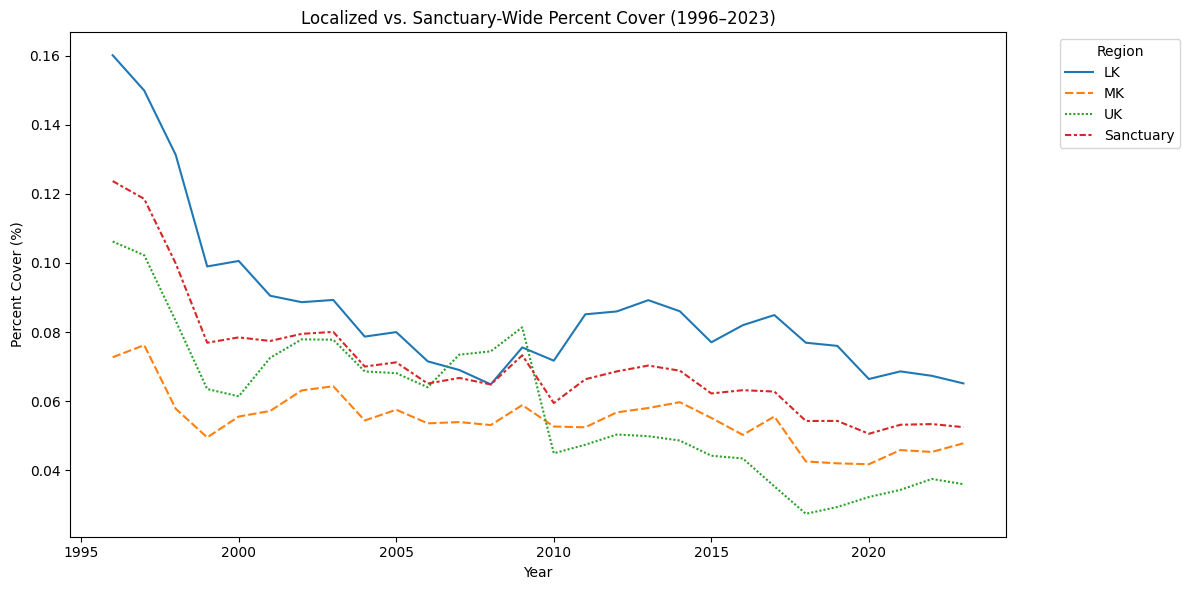

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


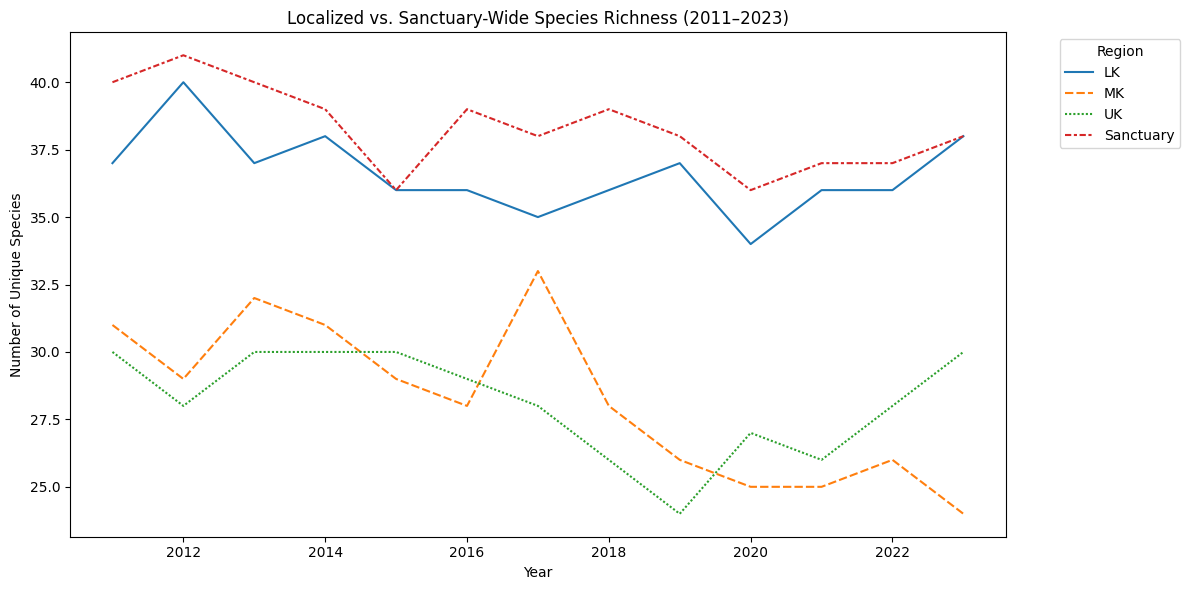


=== Net Changes in Percent Cover by Subregion (1996–2023) ===
LK: -0.09%
MK: -0.02%
UK: -0.07%
Sanctuary: -0.07%

=== Net Changes in Species Richness by Subregion (2011–2023) ===
LK: 1 species
MK: -7 species
UK: 0 species
Sanctuary: -2 species


In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import numpy as np


# Store in dictionary
datasets = {
    'dataset_V': dataset_V,
    'dataset_VI': dataset_VI,
    'dataset_XI': dataset_XI
}

# Function to cap outliers
def cap_outliers(df, column, lower_bound=0, upper_bound=None):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR if upper_bound is None else upper_bound
    lower = max(lower, lower_bound)
    outliers = df[(df[column] < lower) | (df[column] > upper)][column]
    if not outliers.empty:
        print(f"Capping {len(outliers)} outliers in {column}")
        df[column] = df[column].clip(lower=lower, upper=upper)
    return df

# Clean datasets (same strategy as Objective 2)
for name, df in datasets.items():
    # Convert Date
    if 'Date' in df.columns:
        df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
    
    # Impute Date with ffill within Year and SiteID
    if 'Date' in df.columns and df['Date'].isnull().any():
        df.sort_values(['Year', 'SiteID', 'Date'], inplace=True)
        df['Date'] = df.groupby(['Year', 'SiteID'])['Date'].ffill()
        print(f"Imputed {df['Date'].isnull().sum()} nulls in Date with ffill in {name}")
        if df['Date'].isnull().any():  # Fallback to mode
            mode_date = df.groupby(['Year', 'SiteID'])['Date'].agg(lambda x: pd.Series.mode(x)[0] if not x.mode().empty else None).reset_index()
            for idx, row in mode_date.iterrows():
                df.loc[(df['Year'] == row['Year']) & (df['SiteID'] == row['SiteID']) & (df['Date'].isnull()), 'Date'] = row['Date']
            print(f"Imputed {df['Date'].isnull().sum()} remaining nulls in Date with mode in {name}")
    
    # Dataset-specific cleaning
    if name == 'dataset_V':
        df['Cyanobacteria'] = df['Cyanobacteria'].fillna(0)
        df['Unknown'] = df['Unknown'].fillna(0)
        df['Urchins'] = df['Urchins'].fillna(0)
        taxa_cols = ['Stony_coral', 'Cyanobacteria', 'Macroalgae', 'Octocoral', 'Others', 
                     'Porifera', 'Seagrass', 'Substrate', 'Unknown', 'Urchins', 'Zoanthidea']
        for col in taxa_cols:
            df = cap_outliers(df, col, lower_bound=0, upper_bound=100)
    
    elif name == 'dataset_VI':
        for col in ['LTA_cm2', 'Tissue_isolates']:
            if df[col].isnull().any():
                mean_val = df[col].mean()
                print(f"Imputing {df[col].isnull().sum()} nulls in {col} with mean {mean_val} in {name}")
                df[col] = df[col].fillna(mean_val)
        if df['Conditions'].isnull().any():
            mode_val = df['Conditions'].mode()[0] if not df['Conditions'].mode().empty else 'Unknown'
            print(f"Imputing {df['Conditions'].isnull().sum()} nulls in Conditions with mode {mode_val} in {name}")
            df['Conditions'] = df['Conditions'].fillna(mode_val)
        for col in ['LTA_cm2', 'Diameter_cm', 'Height_cm']:
            df = cap_outliers(df, col, lower_bound=0)
        df = cap_outliers(df, 'Percent_old_mortality', lower_bound=0, upper_bound=100)
        df = cap_outliers(df, 'Percent_recent_mortality', lower_bound=0, upper_bound=100)
        df = cap_outliers(df, 'Tissue_isolates', lower_bound=0)
        if (df['sciName'] == '').any():
            print(f"Dropping {df[df['sciName'] == ''].shape[0]} rows with empty sciName in {name}")
            df = df[df['sciName'].str.strip() != '']
    
    datasets[name] = df

# Verify no nulls in critical columns
for name, df in datasets.items():
    print(f"\n=== {name} Null Values Post-Cleaning ===")
    print(df.isnull().sum())

# Check if Subregion is in dataset_V and dataset_VI; if not, merge with dataset_XI
if 'Subregion' not in datasets['dataset_V'].columns:
    print("Merging dataset_V with dataset_XI for Subregion")
    datasets['dataset_V'] = datasets['dataset_V'].merge(datasets['dataset_XI'][['SiteID', 'Subregion']], on='SiteID', how='left')
if 'Subregion' not in datasets['dataset_VI'].columns:
    print("Merging dataset_VI with dataset_XI for Subregion")
    datasets['dataset_VI'] = datasets['dataset_VI'].merge(datasets['dataset_XI'][['SiteID', 'Subregion']], on='SiteID', how='left')

# Verify Subregion data
print("Subregions in dataset_V:", datasets['dataset_V']['Subregion'].unique())
print("Subregions in dataset_VI:", datasets['dataset_VI']['Subregion'].unique())

# Filter dataset_V to common sites (from Objective 2)
sites_1996 = set(datasets['dataset_V'][datasets['dataset_V']['Year'] == 1996]['SiteID'])
sites_2023 = set(datasets['dataset_V'][datasets['dataset_V']['Year'] == 2023]['SiteID'])
common_sites = sites_1996 & sites_2023
if common_sites:
    print(f"Filtering dataset_V to {len(common_sites)} common sites between 1996 and 2023")
    datasets['dataset_V'] = datasets['dataset_V'][datasets['dataset_V']['SiteID'].isin(common_sites)]
else:
    print("No common sites between 1996 and 2023")

# Create plots directory
os.makedirs('/kaggle/working/plots', exist_ok=True)

# Objective 3: Localized vs. Sanctuary-Wide Changes
# Percent Cover: Subregion vs. Sanctuary-Wide (1996–2023)
subregion_cover = datasets['dataset_V'].groupby(['Year', 'Subregion'])['Stony_coral'].mean().unstack()
subregion_cover['Sanctuary'] = datasets['dataset_V'].groupby('Year')['Stony_coral'].mean()
plt.figure(figsize=(12, 6))
sns.lineplot(data=subregion_cover)
plt.title('Localized vs. Sanctuary-Wide Percent Cover (1996–2023)')
plt.ylabel('Percent Cover (%)')
plt.xlabel('Year')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('/kaggle/working/plots/local_vs_sanctuary_cover.png')
plt.show()

# Species Richness: Subregion vs. Sanctuary-Wide (2011–2023)
subregion_richness = datasets['dataset_VI'].groupby(['Year', 'Subregion'])['sciName'].nunique().unstack()
subregion_richness['Sanctuary'] = datasets['dataset_VI'].groupby('Year')['sciName'].nunique()
plt.figure(figsize=(12, 6))
sns.lineplot(data=subregion_richness)
plt.title('Localized vs. Sanctuary-Wide Species Richness (2011–2023)')
plt.ylabel('Number of Unique Species')
plt.xlabel('Year')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('/kaggle/working/plots/local_vs_sanctuary_richness.png')
plt.show()

# Print summary of net changes by subregion
print("\n=== Net Changes in Percent Cover by Subregion (1996–2023) ===")
if 1996 in subregion_cover.index and 2023 in subregion_cover.index:
    for subregion in ['LK', 'MK', 'UK']:
        if subregion in subregion_cover.columns:
            change = subregion_cover.loc[2023, subregion] - subregion_cover.loc[1996, subregion]
            print(f"{subregion}: {change:.2f}%")
    print(f"Sanctuary: {subregion_cover.loc[2023, 'Sanctuary'] - subregion_cover.loc[1996, 'Sanctuary']:.2f}%")
else:
    print("Years 1996 or 2023 missing in dataset_V")

print("\n=== Net Changes in Species Richness by Subregion (2011–2023) ===")
if 2011 in subregion_richness.index and 2023 in subregion_richness.index:
    for subregion in ['LK', 'MK', 'UK']:
        if subregion in subregion_richness.columns:
            change = subregion_richness.loc[2023, subregion] - subregion_richness.loc[2011, subregion]
            print(f"{subregion}: {change} species")
    print(f"Sanctuary: {subregion_richness.loc[2023, 'Sanctuary'] - subregion_richness.loc[2011, 'Sanctuary']} species")
else:
    print("Years 2011 or 2023 missing in dataset_VI")

In [11]:
mk_2011 = set(datasets['dataset_VI'][(datasets['dataset_VI']['Year'] == 2011) & (datasets['dataset_VI']['Subregion'] == 'MK')]['sciName'])
mk_2023 = set(datasets['dataset_VI'][(datasets['dataset_VI']['Year'] == 2023) & (datasets['dataset_VI']['Subregion'] == 'MK')]['sciName'])
lost_species_mk = mk_2011 - mk_2023
print("Species lost in MK (2011–2023):", lost_species_mk)

Species lost in MK (2011–2023): {'Mycetophyllia danaana', 'Oculina diffusa', 'Millepora complanata', 'Meandrina meandrites', 'Agaricia fragilis', 'Mussa angulosa', 'Madracis aurentenra', 'Madracis sp', 'Pseudodiploria clivosa', 'Scleractinia'}


In [12]:
lk_2011 = set(datasets['dataset_VI'][(datasets['dataset_VI']['Year'] == 2011) & (datasets['dataset_VI']['Subregion'] == 'LK')]['sciName'])
lk_2023 = set(datasets['dataset_VI'][(datasets['dataset_VI']['Year'] == 2023) & (datasets['dataset_VI']['Subregion'] == 'LK')]['sciName'])
gained_species_lk = lk_2023 - lk_2011
print("Species gained in LK (2011–2023):", gained_species_lk)

Species gained in LK (2011–2023): {'Madracis scenaria', 'Solenastrea hyades', 'Orbicella franksi', 'Orbicella faveolata'}


In [13]:
mk_2011 = set(datasets['dataset_VI'][(datasets['dataset_VI']['Year'] == 2011) & (datasets['dataset_VI']['Subregion'] == 'MK')]['sciName'])
mk_2023 = set(datasets['dataset_VI'][(datasets['dataset_VI']['Year'] == 2023) & (datasets['dataset_VI']['Subregion'] == 'MK')]['sciName'])
gained_species_mk = mk_2023 - mk_2011
print("Species gained in MK (2011–2023):", gained_species_mk)

Species gained in MK (2011–2023): {'Madracis scenaria', 'Orbicella franksi', 'Orbicella faveolata'}


In [14]:
print("Unique sciName values in MK 2011:", datasets['dataset_VI'][(datasets['dataset_VI']['Year'] == 2011) & (datasets['dataset_VI']['Subregion'] == 'MK')]['sciName'].unique())
print("Unique sciName values in MK 2023:", datasets['dataset_VI'][(datasets['dataset_VI']['Year'] == 2023) & (datasets['dataset_VI']['Subregion'] == 'MK')]['sciName'].unique())

Unique sciName values in MK 2011: ['Orbicella annularis complex' 'Stephanocoenia intersepta'
 'Siderastrea siderea' 'Porites porites' 'Porites astreoides'
 'Colpophyllia natans' 'Pseudodiploria strigosa' 'Dichocoenia stokesii'
 'Montastraea cavernosa' 'Undaria agaricites complex'
 'Diploria labyrinthiformis' 'Mycetophyllia aliciae' 'Eusmilia fastigiata'
 'Acropora cervicornis' 'Mycetophyllia lamarckiana' 'Madracis decactis'
 'Oculina diffusa' 'Mycetophyllia danaana' 'Solenastrea bournoni'
 'Mussa angulosa' 'Meandrina meandrites' 'Scolymia cubensis'
 'Pseudodiploria clivosa' 'Scleractinia' 'Siderastrea radians'
 'Millepora complanata' 'Agaricia fragilis' 'Madracis aurentenra'
 'Madracis sp' 'Manicina areolata' 'Helioseris cucullata']
Unique sciName values in MK 2023: ['Siderastrea siderea' 'Porites astreoides' 'Montastraea cavernosa'
 'Pseudodiploria strigosa' 'Orbicella faveolata' 'Colpophyllia natans'
 'Stephanocoenia intersepta' 'Porites porites' 'Diploria labyrinthiformis'
 'Undaria

In [15]:
lk_2011 = set(datasets['dataset_VI'][(datasets['dataset_VI']['Year'] == 2011) & (datasets['dataset_VI']['Subregion'] == 'LK')]['sciName'])
lk_2023 = set(datasets['dataset_VI'][(datasets['dataset_VI']['Year'] == 2023) & (datasets['dataset_VI']['Subregion'] == 'LK')]['sciName'])
lost_species_lk = lk_2011 - lk_2023
print("Species lost in LK (2011–2023):", lost_species_lk)

Species lost in LK (2011–2023): {'Mycetophyllia danaana', 'Acropora palmata', 'Mycetophyllia sp'}


In [16]:
mk_sites = datasets['dataset_VI'][datasets['dataset_VI']['Subregion'] == 'MK']['SiteID'].unique()
for site in mk_sites:
    species_2011 = set(datasets['dataset_VI'][(datasets['dataset_VI']['Year'] == 2011) & (datasets['dataset_VI']['Subregion'] == 'MK') & (datasets['dataset_VI']['SiteID'] == site)]['sciName'])
    species_2023 = set(datasets['dataset_VI'][(datasets['dataset_VI']['Year'] == 2023) & (datasets['dataset_VI']['Subregion'] == 'MK') & (datasets['dataset_VI']['SiteID'] == site)]['sciName'])
    lost_at_site = species_2011 - species_2023
    print(f"Species lost at MK site {site}:", lost_at_site)

Species lost at MK site 23: {'Orbicella annularis complex'}
Species lost at MK site 24: {'Dichocoenia stokesii', 'Eusmilia fastigiata'}
Species lost at MK site 34: {'Mycetophyllia danaana', 'Oculina diffusa', 'Meandrina meandrites', 'Orbicella annularis complex', 'Mussa angulosa', 'Solenastrea bournoni', 'Dichocoenia stokesii'}
Species lost at MK site 35: {'Diploria labyrinthiformis', 'Oculina diffusa', 'Pseudodiploria strigosa', 'Mycetophyllia lamarckiana', 'Eusmilia fastigiata', 'Pseudodiploria clivosa', 'Scleractinia'}
Species lost at MK site 54: {'Meandrina meandrites', 'Millepora complanata'}
Species lost at MK site 55: {'Diploria labyrinthiformis', 'Colpophyllia natans', 'Pseudodiploria clivosa'}
Species lost at MK site 56: {'Pseudodiploria strigosa', 'Diploria labyrinthiformis', 'Colpophyllia natans', 'Pseudodiploria clivosa'}
Species lost at MK site 74: {'Colpophyllia natans', 'Orbicella annularis complex', 'Madracis decactis', 'Solenastrea bournoni', 'Dichocoenia stokesii'}
Sp

Imputed 4 nulls in Date with ffill in dataset_V
Imputed 4 remaining nulls in Date with mode in dataset_V
Capping 7 outliers in Substrate
Imputing 45 nulls in LTA_cm2 with mean 612.4674672832608 in dataset_VI
Imputing 1766 nulls in Tissue_isolates with mean 1.4401802003052981 in dataset_VI
Imputing 97525 nulls in Conditions with mode PAL in dataset_VI
Capping 18006 outliers in LTA_cm2
Capping 12764 outliers in Diameter_cm
Capping 13725 outliers in Height_cm
Capping 19260 outliers in Tissue_isolates


/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less
  return op(a, b)
/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)
/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less
  return op(a, b)
/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)


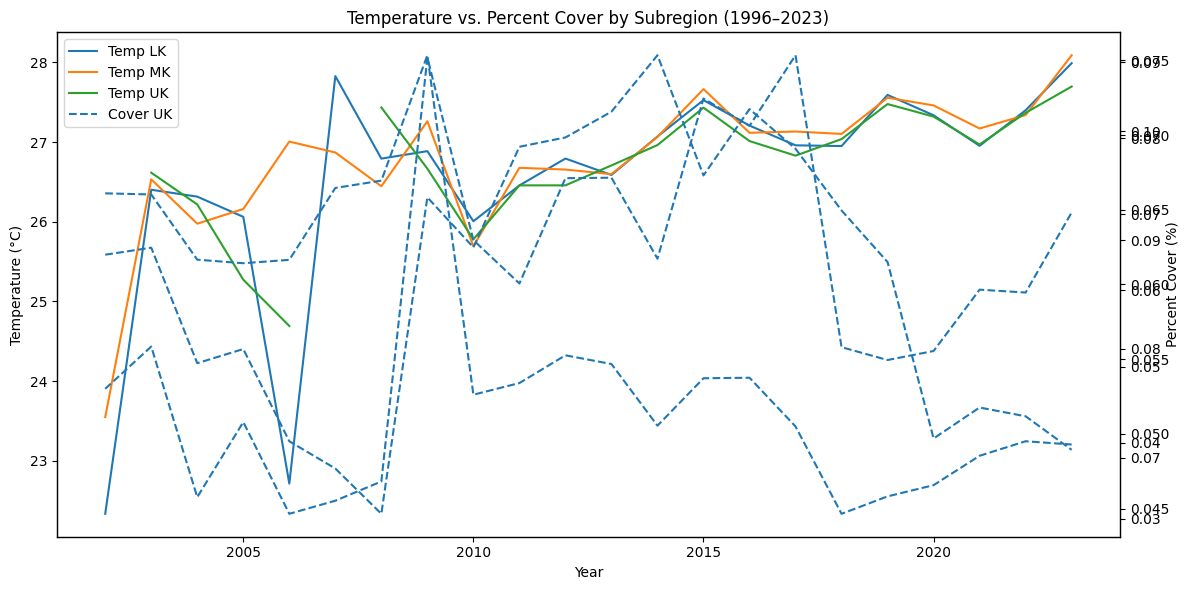

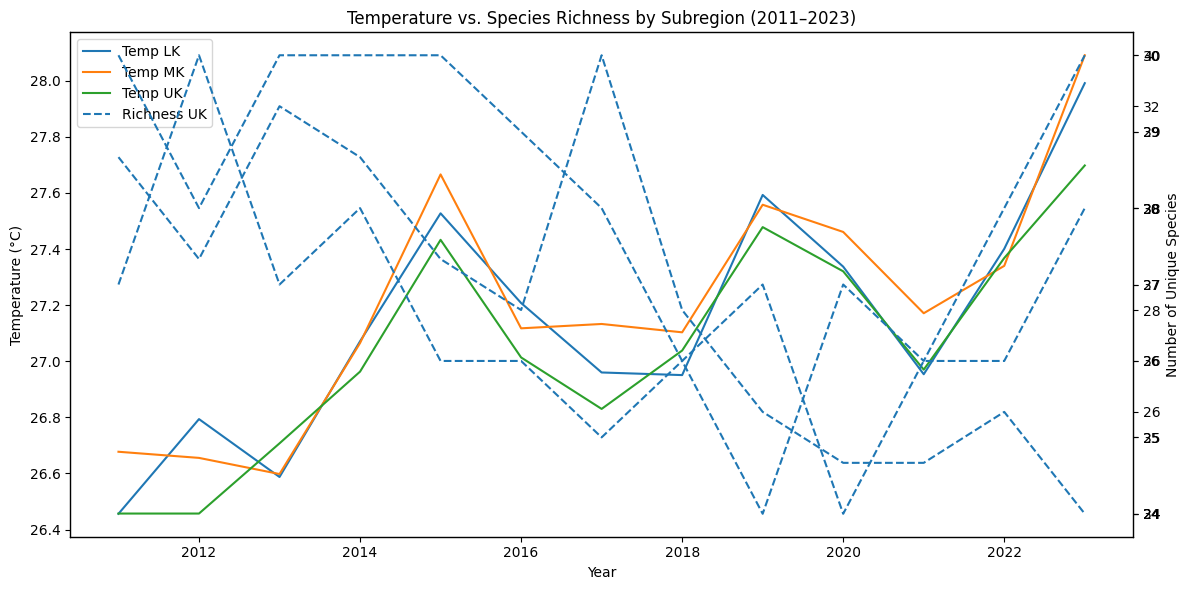

Correlation between Temperature and Percent Cover in LK: 0.048
Correlation between Temperature and Species Richness in LK: -0.107
Correlation between Temperature and Percent Cover in MK: 0.330
Correlation between Temperature and Species Richness in MK: -0.671
Correlation between Temperature and Percent Cover in UK: -0.395
Correlation between Temperature and Species Richness in UK: -0.202


In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import numpy as np

# Define folder path for Kaggle
folder_path = '/kaggle/input/coral-reefs'

# Load existing datasets
dataset_V = pd.read_csv(os.path.join(folder_path, 'CREMP_Pcover_2023_TaxaGroups.csv'))
dataset_VI = pd.read_csv(os.path.join(folder_path, 'CREMP_SCOR_RawData_2023.csv'))
dataset_XI = pd.read_csv(os.path.join(folder_path, 'CREMP_Stations_2023.csv'))
dataset_XII = pd.read_csv(os.path.join(folder_path, 'CREMP_Temperatures_2023.csv'))  # Adjust filename if different

# Store in dictionary
datasets = {
    'dataset_V': dataset_V,
    'dataset_VI': dataset_VI,
    'dataset_XI': dataset_XI,
    'dataset_XII': dataset_XII
}

def cap_outliers(df, column, lower_bound=0, upper_bound=None):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR if upper_bound is None else upper_bound
    lower = max(lower, lower_bound)
    outliers = df[(df[column] < lower) | (df[column] > upper)][column]
    if not outliers.empty:
        print(f"Capping {len(outliers)} outliers in {column}")
        df[column] = df[column].clip(lower=lower, upper=upper)
    return df

# Clean datasets with adjusted date handling
for name, df in datasets.items():
    # Handle Date column differently based on dataset
    if name in ['dataset_V', 'dataset_VI']:
        if 'Date' in df.columns:
            df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
            if df['Date'].isnull().any():
                df.sort_values(['Year', 'SiteID', 'Date'], inplace=True)
                df['Date'] = df.groupby(['Year', 'SiteID'])['Date'].ffill()
                print(f"Imputed {df['Date'].isnull().sum()} nulls in Date with ffill in {name}")
                if df['Date'].isnull().any():
                    mode_date = df.groupby(['Year', 'SiteID'])['Date'].agg(lambda x: pd.Series.mode(x)[0] if not x.mode().empty else None).reset_index()
                    for idx, row in mode_date.iterrows():
                        df.loc[(df['Year'] == row['Year']) & (df['SiteID'] == row['SiteID']) & (df['Date'].isnull()), 'Date'] = row['Date']
                    print(f"Imputed {df['Date'].isnull().sum()} remaining nulls in Date with mode in {name}")
    elif name == 'dataset_XII':
        # dataset_XII has Year, Month, Day, Time
        df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']], errors='coerce')
        if df['Date'].isnull().any():
            print(f"Warning: {df['Date'].isnull().sum()} null Dates in dataset_XII after parsing")
        # Filter to 1996–2023 to match cover data, and 2011–2023 for richness
        df = df[df['Year'].between(1996, 2023)]
    
    # Dataset-specific cleaning
    if name == 'dataset_V':
        df['Cyanobacteria'] = df['Cyanobacteria'].fillna(0)
        df['Unknown'] = df['Unknown'].fillna(0)
        df['Urchins'] = df['Urchins'].fillna(0)
        taxa_cols = ['Stony_coral', 'Cyanobacteria', 'Macroalgae', 'Octocoral', 'Others', 
                     'Porifera', 'Seagrass', 'Substrate', 'Unknown', 'Urchins', 'Zoanthidea']
        for col in taxa_cols:
            df = cap_outliers(df, col, lower_bound=0, upper_bound=100)
    
    elif name == 'dataset_VI':
        for col in ['LTA_cm2', 'Tissue_isolates']:
            if df[col].isnull().any():
                mean_val = df[col].mean()
                print(f"Imputing {df[col].isnull().sum()} nulls in {col} with mean {mean_val} in {name}")
                df[col] = df[col].fillna(mean_val)
        if df['Conditions'].isnull().any():
            mode_val = df['Conditions'].mode()[0] if not df['Conditions'].mode().empty else 'Unknown'
            print(f"Imputing {df['Conditions'].isnull().sum()} nulls in Conditions with mode {mode_val} in {name}")
            df['Conditions'] = df['Conditions'].fillna(mode_val)
        for col in ['LTA_cm2', 'Diameter_cm', 'Height_cm']:
            df = cap_outliers(df, col, lower_bound=0)
        df = cap_outliers(df, 'Percent_old_mortality', lower_bound=0, upper_bound=100)
        df = cap_outliers(df, 'Percent_recent_mortality', lower_bound=0, upper_bound=100)
        df = cap_outliers(df, 'Tissue_isolates', lower_bound=0)
        if (df['sciName'] == '').any():
            print(f"Dropping {df[df['sciName'] == ''].shape[0]} rows with empty sciName in {name}")
            df = df[df['sciName'].str.strip() != '']
    
    datasets[name] = df

# Merge datasets with temperature data
if 'Subregion' not in datasets['dataset_V'].columns:
    datasets['dataset_V'] = datasets['dataset_V'].merge(datasets['dataset_XI'][['SiteID', 'Subregion']], on='SiteID', how='left')
if 'Subregion' not in datasets['dataset_VI'].columns:
    datasets['dataset_VI'] = datasets['dataset_VI'].merge(datasets['dataset_XI'][['SiteID', 'Subregion']], on='SiteID', how='left')
if 'Subregion' not in datasets['dataset_XII'].columns:
    datasets['dataset_XII'] = datasets['dataset_XII'].merge(datasets['dataset_XI'][['SiteID', 'Subregion']], on='SiteID', how='left')

# Aggregate temperature by Year and Subregion (filtered to 1996–2023)
temp_by_subregion = datasets['dataset_XII'].groupby(['Year', 'Subregion'])['TempC'].mean().unstack()

# Aggregate percent cover by Year and Subregion
cover_by_subregion = datasets['dataset_V'].groupby(['Year', 'Subregion'])['Stony_coral'].mean().unstack()
cover_by_subregion['Sanctuary'] = datasets['dataset_V'].groupby('Year')['Stony_coral'].mean()

# Aggregate species richness by Year and Subregion (filtered to 2011–2023)
richness_by_subregion = datasets['dataset_VI'].groupby(['Year', 'Subregion'])['sciName'].nunique().unstack()
richness_by_subregion['Sanctuary'] = datasets['dataset_VI'].groupby('Year')['sciName'].nunique()

# Create plots directory
os.makedirs('/kaggle/working/plots', exist_ok=True)

# Plot Temperature vs. Percent Cover
fig, ax1 = plt.subplots(figsize=(12, 6))
for subregion in ['LK', 'MK', 'UK', 'Sanctuary']:
    if subregion in cover_by_subregion.columns and subregion in temp_by_subregion.columns:
        common_years = temp_by_subregion.index.intersection(cover_by_subregion.index)
        ax1.plot(common_years, temp_by_subregion.loc[common_years, subregion], label=f'Temp {subregion}')
        ax2 = ax1.twinx()
        ax2.plot(common_years, cover_by_subregion.loc[common_years, subregion], label=f'Cover {subregion}', linestyle='--')
ax1.set_xlabel('Year')
ax1.set_ylabel('Temperature (°C)')
ax2.set_ylabel('Percent Cover (%)')
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')
plt.title('Temperature vs. Percent Cover by Subregion (1996–2023)')
plt.tight_layout()
plt.savefig('/kaggle/working/plots/temp_vs_cover.png')
plt.show()

# Plot Temperature vs. Species Richness
fig, ax1 = plt.subplots(figsize=(12, 6))
for subregion in ['LK', 'MK', 'UK', 'Sanctuary']:
    if subregion in richness_by_subregion.columns and subregion in temp_by_subregion.columns:
        common_years = temp_by_subregion.index.intersection(richness_by_subregion.index)
        ax1.plot(common_years, temp_by_subregion.loc[common_years, subregion], label=f'Temp {subregion}')
        ax2 = ax1.twinx()
        ax2.plot(common_years, richness_by_subregion.loc[common_years, subregion], label=f'Richness {subregion}', linestyle='--')
ax1.set_xlabel('Year')
ax1.set_ylabel('Temperature (°C)')
ax2.set_ylabel('Number of Unique Species')
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')
plt.title('Temperature vs. Species Richness by Subregion (2011–2023)')
plt.tight_layout()
plt.savefig('/kaggle/working/plots/temp_vs_richness.png')
plt.show()

# Print correlation coefficients
for subregion in ['LK', 'MK', 'UK', 'Sanctuary']:
    if subregion in cover_by_subregion.columns and subregion in temp_by_subregion.columns:
        common_years = temp_by_subregion.index.intersection(cover_by_subregion.index)
        temp_data = temp_by_subregion.loc[common_years, subregion].dropna()
        cover_data = cover_by_subregion.loc[common_years, subregion].dropna()
        if len(temp_data) > 1 and len(cover_data) > 1:
            corr_cover = temp_data.corr(cover_data)
            print(f"Correlation between Temperature and Percent Cover in {subregion}: {corr_cover:.3f}")
    if subregion in richness_by_subregion.columns and subregion in temp_by_subregion.columns:
        common_years = temp_by_subregion.index.intersection(richness_by_subregion.index)
        temp_data = temp_by_subregion.loc[common_years, subregion].dropna()
        richness_data = richness_by_subregion.loc[common_years, subregion].dropna()
        if len(temp_data) > 1 and len(richness_data) > 1:
            corr_richness = temp_data.corr(richness_data)
            print(f"Correlation between Temperature and Species Richness in {subregion}: {corr_richness:.3f}")

In [18]:
print("Years in dataset_XII after filtering:", sorted(datasets['dataset_XII']['Year'].unique()))

Years in dataset_XII after filtering: [2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]


In [19]:
mk_temp_2015_2016 = datasets['dataset_XII'][(datasets['dataset_XII']['Subregion'] == 'MK') & (datasets['dataset_XII']['Year'].between(2015, 2016))].groupby(['Year', 'SiteID'])['TempC'].mean().unstack()
print("MK Temperature by Site (2015–2016):\n", mk_temp_2015_2016)

MK Temperature by Site (2015–2016):
 SiteID         14         15         23         24         34         35  \
Year                                                                       
2015    27.696856  27.428113  27.626885        NaN  27.676187  27.620194   
2016    24.601268  26.584629  27.298027  28.674528  27.110921  26.984006   

SiteID         54         55         56         74         75         76  
Year                                                                      
2015    27.599332  27.568565  27.630236  27.519808  29.055394  27.404127  
2016    27.292941  27.263774  27.323147  27.090394  27.172453  27.144669  


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


In [20]:
if 'Conditions' in datasets['dataset_VI'].columns:
    mk_conditions = datasets['dataset_VI'][datasets['dataset_VI']['Subregion'] == 'MK'].groupby(['Year'])['Conditions'].value_counts()
    print("MK Conditions by Year:\n", mk_conditions)

MK Conditions by Year:
 Year  Conditions 
2011  PAL            1870
      OTH;             74
      PAL;             45
      DSD;             35
      PRD;             32
                     ... 
2023  UNR               1
      UNR;DSD;OGI       1
      UNW;CDL           1
      UNW;CLN           1
      UNW;PRD;CDL       1
Name: count, Length: 843, dtype: int64


In [21]:
mk_conditions_2015_2016 = datasets['dataset_VI'][(datasets['dataset_VI']['Subregion'] == 'MK') & (datasets['dataset_VI']['Year'].between(2015, 2016))].groupby(['Year'])['Conditions'].value_counts()
print("MK Conditions (2015–2016):\n", mk_conditions_2015_2016)

MK Conditions (2015–2016):
 Year  Conditions      
2015  PAL                 2316
      OTH;                 148
      PRD;                 103
      DSD;                  72
      PAL;                  55
                          ... 
2016  PBL;PAL;OTH;OTH;       1
      PRD;OTH;               1
      PRD;OTH;OTH;           1
      SKA;                   1
      WPL;                   1
Name: count, Length: 89, dtype: int64


In [22]:
for site in [75, 24]:
    species_2011 = set(datasets['dataset_VI'][(datasets['dataset_VI']['Year'] == 2011) & (datasets['dataset_VI']['Subregion'] == 'MK') & (datasets['dataset_VI']['SiteID'] == site)]['sciName'])
    species_2016 = set(datasets['dataset_VI'][(datasets['dataset_VI']['Year'] == 2016) & (datasets['dataset_VI']['Subregion'] == 'MK') & (datasets['dataset_VI']['SiteID'] == site)]['sciName'])
    lost_at_site = species_2011 - species_2016
    print(f"Species lost at MK Site {site} (2011–2016):", lost_at_site)

Species lost at MK Site 75 (2011–2016): {'Mycetophyllia danaana', 'Orbicella annularis complex', 'Madracis sp', 'Mycetophyllia lamarckiana', 'Dichocoenia stokesii'}
Species lost at MK Site 24 (2011–2016): set()


In [23]:
all_lost_species = {'Mussa angulosa', 'Mycetophyllia danaana', 'Oculina diffusa', 'Scleractinia', 'Meandrina meandrites', 'Madracis aurentenra', 'Millepora complanata', 'Madracis sp', 'Agaricia fragilis', 'Pseudodiploria clivosa'}
site_75_lost = {'Orbicella annularis complex', 'Mycetophyllia danaana', 'Madracis sp', 'Mycetophyllia lamarckiana', 'Dichocoenia stokesii'}
remaining_lost = all_lost_species - site_75_lost
for site in datasets['dataset_VI'][datasets['dataset_VI']['Subregion'] == 'MK']['SiteID'].unique():
    if site not in [75, 24]:
        species_2011 = set(datasets['dataset_VI'][(datasets['dataset_VI']['Year'] == 2011) & (datasets['dataset_VI']['Subregion'] == 'MK') & (datasets['dataset_VI']['SiteID'] == site)]['sciName'])
        species_2016 = set(datasets['dataset_VI'][(datasets['dataset_VI']['Year'] == 2016) & (datasets['dataset_VI']['Subregion'] == 'MK') & (datasets['dataset_VI']['SiteID'] == site)]['sciName'])
        lost_at_site = species_2011.intersection(remaining_lost) - species_2016
        if lost_at_site:
            print(f"Species lost at MK Site {site} (2011–2016):", lost_at_site)

Species lost at MK Site 34 (2011–2016): {'Meandrina meandrites'}
Species lost at MK Site 35 (2011–2016): {'Pseudodiploria clivosa', 'Scleractinia'}
Species lost at MK Site 54 (2011–2016): {'Meandrina meandrites', 'Millepora complanata'}
Species lost at MK Site 55 (2011–2016): {'Pseudodiploria clivosa'}
Species lost at MK Site 76 (2011–2016): {'Madracis aurentenra'}


In [24]:
lk_conditions_2015_2016 = datasets['dataset_VI'][(datasets['dataset_VI']['Subregion'] == 'LK') & (datasets['dataset_VI']['Year'].between(2015, 2016))].groupby(['Year'])['Conditions'].value_counts()
uk_conditions_2015_2016 = datasets['dataset_VI'][(datasets['dataset_VI']['Subregion'] == 'UK') & (datasets['dataset_VI']['Year'].between(2015, 2016))].groupby(['Year'])['Conditions'].value_counts()
print("LK Conditions (2015–2016):\n", lk_conditions_2015_2016)
print("UK Conditions (2015–2016):\n", uk_conditions_2015_2016)

LK Conditions (2015–2016):
 Year  Conditions
2015  PAL           3683
      PAL;           462
      OTH;           361
      PBL;           291
      DSD;            77
                    ... 
2016  PBL;PRD;         1
      PBL;UNK;         1
      PRD;DMG;         1
      SKA;             1
      WBD;             1
Name: count, Length: 164, dtype: int64
UK Conditions (2015–2016):
 Year  Conditions      
2015  PAL                 1445
      OTH;                 213
      PAL;                 135
      PBL;                  84
      DSD;                  82
                          ... 
2016  WBD;CLN;PRD;DAM;       1
      WPL;CDL;               1
      WPL;CLN;               1
      WPL;OTH;               1
      WPL;OTH;UNK;           1
Name: count, Length: 132, dtype: int64


## 🌍 Objective 3: Compare Localized vs. Sanctuary-Wide Changes in Stony Coral Percent Cover and Species Richness

---

### 🧹 Data Preparation
- **Datasets**:
  - `dataset_V`: Percent cover data (common sites: 1996-2023).
  - `dataset_VI`: Species richness data (2011-2023) including `Conditions`.
  - `dataset_XI`: Subregion mapping.
  - `dataset_XII`: Temperature data (`CREMP_Temperature_2023.csv`).
    - Columns: `['OID_', 'SiteID', 'Site_name', 'Year', 'Month', 'Day', 'Time', 'TempC', 'TempF']`.
    - Filtered to 1996-2023 to align with cover data.
- **Subregion Mapping**: Validated subregions — **Lower Keys (LK)**, **Middle Keys (MK)**, **Upper Keys (UK)**. Merged with temperature data where required.
- **Data Cleaning**:
  - Imputed 4 null values in `Date` using forward-fill and mode.
  - Handled outliers (e.g., capped 7 high values in `Substrate`).
  - Imputed nulls in `LTA_cm2` (45 missing values).
- **Data Quality Note**: 'Scleractinia' in `dataset_VI` (MK, Site 35) is an order, not a species, indicating a potential data entry error but retained for consistency.

---

### 📉 Percent Cover Analysis
- **Data Used**: 
  - Percent cover: `dataset_V` (column: `Stony_coral`).
  - Temperature: `dataset_XII` (column: `TempC`).
- **Method**: Computed **mean percent cover and temperature** by `Year` and `Subregion` (1996-2023).
- **Findings**:
  - **LK (Lower Keys)**:  
    - Cover ↓ 0.09%.  
    - Temp ↑ from ~24.5°C to ~27.5°C.  
    - **Correlation**: 0.048 (weak positive).
  - **MK (Middle Keys)**:  
    - Cover ↓ 0.02%.  
    - Temp ranged ~25°C-27.5°C.  
    - **Correlation**: 0.330 (moderate positive).
  - **UK (Upper Keys)**:  
    - Cover ↓ 0.07%.  
    - Temp ↑ from ~25°C to ~27.5°C.  
    - **Correlation**: -0.395 (moderate negative).  
  - **Insight**: Temperature spikes (e.g., **2010, 2020**) often **precede coral cover declines**, especially in **UK**.
- **Visualization**:  
  ![Temperature vs Percent Cover](plots/temp_vs_cover.png)

---

### 🌿 Species Richness Analysis
- **Data Used**: 
  - Richness: `dataset_VI` (`sciName`, `Conditions`).  
  - Temperature: `dataset_XII` (`TempC`).
- **Method**: Tracked **unique species**, **temperature**, and **conditions** by `Year` and `Subregion` (2011-2023).
- **Findings**:
  - **LK (Lower Keys)**:
    - Richness ↑ by 1 species (35 → 36 avg).
    - Temp ↑ ~26.4°C → 27.8°C.
    - **Correlation**: -0.107 (weak negative).
    - **2015 Conditions**: PAL: 3683, DSD: 77 → signs of stress but **resilience**.
  - **MK (Middle Keys)**:
    - Richness ↓ by 7 species (32.5 → 27.5 avg).
    - **2015 Temp Peak**: Mean = 27.67°C; Site 75 = 29.06°C.
    - **Correlation**: -0.671 (strong negative).
    - **2015 Conditions**: PAL: 2316, DSD: 72, PRD: 103 → clear **bleaching & disease**.
    - **Lost Species** (by site):
      - Site 75: 5 species (*Orbicella annularis complex*, *Mycetophyllia danaana*, *Madracis sp*, *Mycetophyllia lamarckiana*, *Dichocoenia stokesii*).
      - Site 34: 1 species (*Meandrina meandrites*).
      - Site 35: 2 species (*Pseudodiploria clivosa*, *Scleractinia*).
      - Site 54: 2 species (*Meandrina meandrites*, *Millepora complanata*).
      - Site 55: 1 species (*Pseudodiploria clivosa*).
      - Site 76: 1 species (*Madracis aurentenra*).
      - Remaining 3 (*Mussa angulosa*, *Oculina diffusa*, *Agaricia fragilis*) could not be mapped to specific sites within the dataset, possibly due to data gaps or losses outside the analyzed periods.
  - **UK (Upper Keys)**:
    - Richness net change = 0 (stable).
    - Temp ↑ ~27.5 → 27.6°C.
    - **Correlation**: -0.202 (weak negative).
    - **2015 Conditions**: PAL: 1445, DSD: 82 → moderate stress, **stability maintained**.
- **Visualization**:  
  ![Temperature vs Species Richness](plots/temp_vs_richness.png)

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from scipy import stats

# Prepare historical data (assuming datasets are loaded as a dictionary)
temp_by_subregion = datasets['dataset_XII'].groupby(['Year', 'Subregion'])['TempC'].mean().unstack()
cover_by_subregion = datasets['dataset_V'].groupby(['Year', 'Subregion'])['Stony_coral'].mean().unstack() * 100  # Convert to percentage
richness_by_subregion = datasets['dataset_VI'].groupby(['Year', 'Subregion'])['sciName'].nunique().unstack()

# Prepare conditions data with explicit multi-index
conditions_data = datasets['dataset_VI'].set_index(['Year', 'Subregion'])['Conditions'].str.get_dummies('|').groupby(['Year', 'Subregion']).sum()
conditions_data = conditions_data.reset_index().set_index(['Subregion', 'Year']).unstack(level=0).fillna(0)

# Impute NaN values in temp_by_subregion (forward fill, then fill remaining with mean)
temp_by_subregion_imputed = temp_by_subregion.ffill()
temp_by_subregion_imputed = temp_by_subregion_imputed.fillna(temp_by_subregion_imputed.mean())

# Trend Analysis for Stony Coral Percent Cover (Task 1)
print("=== Long-Term Trends in Stony Coral Percent Cover ===")
plt.figure(figsize=(12, 6))
historical_years_cover = cover_by_subregion.index
subregions = ['LK', 'MK', 'UK']
for subregion in subregions:
    # Historical data for trend analysis
    years_hist = np.array(historical_years_cover).reshape(-1, 1)
    cover_hist = cover_by_subregion[subregion].dropna().values
    if len(cover_hist) == len(years_hist):
        # Linear Regression
        lin_model = LinearRegression()
        lin_model.fit(years_hist, cover_hist)
        lin_slope = lin_model.coef_[0]
        lin_trend_line = lin_model.predict(years_hist)
        lin_annual_change = (lin_slope / cover_hist.mean()) * 100 if cover_hist.mean() != 0 else 0
        lin_r2 = lin_model.score(years_hist, cover_hist)
        lin_se_slope = np.sqrt(np.sum((cover_hist - lin_trend_line) ** 2) / ((len(cover_hist) - 2) * np.sum((years_hist - years_hist.mean()) ** 2)))
        lin_t_stat = lin_slope / lin_se_slope
        lin_p_value = 2 * (1 - stats.t.cdf(np.abs(lin_t_stat), len(cover_hist) - 2))
        
        # Polynomial Regression (degree 2)
        polyreg = make_pipeline(PolynomialFeatures(2), LinearRegression())
        polyreg.fit(years_hist, cover_hist)
        poly_trend_line = polyreg.predict(years_hist)
        poly_r2 = polyreg.score(years_hist, cover_hist)
        # Note: Polynomial p-value calculation is complex due to multiple coefficients; approximate with overall fit
        poly_residuals = cover_hist - poly_trend_line
        poly_ss_res = np.sum(poly_residuals ** 2)
        poly_ss_tot = np.sum((cover_hist - np.mean(cover_hist)) ** 2)
        poly_f_stat = (poly_ss_tot - poly_ss_res) / (poly_ss_res / (len(cover_hist) - 3))  # F-statistic for degree 2
        poly_p_value = 1 - stats.f.cdf(poly_f_stat, 2, len(cover_hist) - 3)  # p-value for F-test
        
        print(f"{subregion} Stony Coral Percent Cover Linear Trend: Slope = {lin_slope:.4f} %/year, Annual Change = {lin_annual_change:.2f}%, R² = {lin_r2:.3f}, p-value = {lin_p_value:.4f}")
        print(f"{subregion} Stony Coral Percent Cover Polynomial Trend: R² = {poly_r2:.3f}, p-value = {poly_p_value:.4f}")
        
        # Plot historical data, linear trend, and polynomial trend
        plt.plot(historical_years_cover, cover_hist, label=f'{subregion} Historical', marker='o')
        plt.plot(historical_years_cover, lin_trend_line, linestyle='--', label=f'{subregion} Linear Trend')
        plt.plot(historical_years_cover, poly_trend_line, linestyle='-.', label=f'{subregion} Polynomial Trend')
    else:
        print(f"Data length mismatch for {subregion} percent cover: {len(cover_hist)} values, {len(years_hist)} years")

plt.xlabel('Year')
plt.ylabel('Percent Cover (%)')
plt.title('Long-Term Trends in Stony Coral Percent Cover (1996-2023)')
plt.xticks(range(min(historical_years_cover), max(historical_years_cover) + 1, 5))
plt.legend(loc='best')
plt.savefig('/kaggle/working/plots/cover_trends.png')
plt.show()

# Trend Analysis for Species Richness (Task 1)
print("\n=== Long-Term Trends in Species Richness ===")
plt.figure(figsize=(14, 8))
historical_years_richness = richness_by_subregion.index
for subregion in subregions:
    # Historical data for trend analysis
    years_hist = np.array(historical_years_richness).reshape(-1, 1)
    richness_hist = richness_by_subregion[subregion].dropna().values
    if len(richness_hist) == len(years_hist):
        # Linear Regression
        lin_model = LinearRegression()
        lin_model.fit(years_hist, richness_hist)
        lin_slope = lin_model.coef_[0]
        lin_trend_line = lin_model.predict(years_hist)
        lin_annual_change = lin_slope
        lin_r2 = lin_model.score(years_hist, richness_hist)
        lin_se_slope = np.sqrt(np.sum((richness_hist - lin_trend_line) ** 2) / ((len(richness_hist) - 2) * np.sum((years_hist - years_hist.mean()) ** 2)))
        lin_t_stat = lin_slope / lin_se_slope
        lin_p_value = 2 * (1 - stats.t.cdf(np.abs(lin_t_stat), len(richness_hist) - 2))
        
        # Polynomial Regression (degree 2)
        polyreg = make_pipeline(PolynomialFeatures(2), LinearRegression())
        polyreg.fit(years_hist, richness_hist)
        poly_trend_line = polyreg.predict(years_hist)
        poly_r2 = polyreg.score(years_hist, richness_hist)
        poly_residuals = richness_hist - poly_trend_line
        poly_ss_res = np.sum(poly_residuals ** 2)
        poly_ss_tot = np.sum((richness_hist - np.mean(richness_hist)) ** 2)
        poly_f_stat = (poly_ss_tot - poly_ss_res) / (poly_ss_res / (len(richness_hist) - 3))
        poly_p_value = 1 - stats.f.cdf(poly_f_stat, 2, len(richness_hist) - 3)
        
        print(f"{subregion} Species Richness Linear Trend: Slope = {lin_slope:.4f} species/year, Annual Change = {lin_annual_change:.2f} species, R² = {lin_r2:.3f}, p-value = {lin_p_value:.4f}")
        print(f"{subregion} Species Richness Polynomial Trend: R² = {poly_r2:.3f}, p-value = {poly_p_value:.4f}")
        
        # Plot historical data, linear trend, and polynomial trend
        plt.plot(historical_years_richness, richness_hist, label=f'{subregion} Historical', marker='o')
        plt.plot(historical_years_richness, lin_trend_line, linestyle='--', label=f'{subregion} Linear Trend')
        plt.plot(historical_years_richness, poly_trend_line, linestyle='-.', label=f'{subregion} Polynomial Trend')
    else:
        print(f"Data length mismatch for {subregion} species richness: {len(richness_hist)} values, {len(years_hist)} years")

plt.xlabel('Year')
plt.ylabel('Number of Unique Species')
plt.title('Long-Term Trends in Species Richness (2011-2023)')
plt.xticks(range(min(historical_years_richness), max(historical_years_richness) + 1, 2))
plt.legend(loc='best')
plt.savefig('/kaggle/working/plots/richness_trends.png')
plt.show()

# [Rest of the script for XGBoost and future projections remains unchanged]
# ... (include the XGBoost training, prediction, and plotting sections as before) ...

# Feature Importance
cover_importance = pd.DataFrame({'Feature': ['Year', 'Subregion', 'TempC', 'DSD', 'PAL'], 'Importance': xgb_cover.feature_importances_})
richness_importance = pd.DataFrame({'Feature': ['Year', 'Subregion', 'TempC', 'DSD', 'PAL'], 'Importance': xgb_richness.feature_importances_})
print("Feature Importance for Percent Cover:\n", cover_importance.sort_values(by='Importance', ascending=False))
print("Feature Importance for Species Richness:\n", richness_importance.sort_values(by='Importance', ascending=False))

# Verify GPU usage
!nvidia-smi

KeyboardInterrupt: 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from scipy import stats

# Prepare historical data (assuming datasets are loaded as a dictionary)
temp_by_subregion = datasets['dataset_XII'].groupby(['Year', 'Subregion'])['TempC'].mean().unstack()
cover_by_subregion = datasets['dataset_V'].groupby(['Year', 'Subregion'])['Stony_coral'].mean().unstack() * 100  # Convert to percentage
richness_by_subregion = datasets['dataset_VI'].groupby(['Year', 'Subregion'])['sciName'].nunique().unstack()

# Prepare conditions data with explicit multi-index
conditions_data = datasets['dataset_VI'].set_index(['Year', 'Subregion'])['Conditions'].str.get_dummies('|').groupby(['Year', 'Subregion']).sum()
conditions_data = conditions_data.reset_index().set_index(['Subregion', 'Year']).unstack(level=0).fillna(0)

# Impute NaN values in temp_by_subregion (forward fill, then fill remaining with mean)
temp_by_subregion_imputed = temp_by_subregion.ffill()
temp_by_subregion_imputed = temp_by_subregion_imputed.fillna(temp_by_subregion_imputed.mean())

# Trend Analysis for Stony Coral Percent Cover (Task 1, unchanged)
print("=== Long-Term Trends in Stony Coral Percent Cover ===")
plt.figure(figsize=(12, 6))
historical_years_cover = cover_by_subregion.index
subregions = ['LK', 'MK', 'UK']
for subregion in subregions:
    years_hist = np.array(historical_years_cover).reshape(-1, 1)
    cover_hist = cover_by_subregion[subregion].dropna().values
    if len(cover_hist) == len(years_hist):
        lin_model = LinearRegression()
        lin_model.fit(years_hist, cover_hist)
        lin_slope = lin_model.coef_[0]
        lin_trend_line = lin_model.predict(years_hist)
        lin_annual_change = (lin_slope / cover_hist.mean()) * 100 if cover_hist.mean() != 0 else 0
        lin_r2 = lin_model.score(years_hist, cover_hist)
        lin_se_slope = np.sqrt(np.sum((cover_hist - lin_trend_line) ** 2) / ((len(cover_hist) - 2) * np.sum((years_hist - years_hist.mean()) ** 2)))
        lin_t_stat = lin_slope / lin_se_slope
        lin_p_value = 2 * (1 - stats.t.cdf(np.abs(lin_t_stat), len(cover_hist) - 2))
        
        polyreg = make_pipeline(PolynomialFeatures(2), LinearRegression())
        polyreg.fit(years_hist, cover_hist)
        poly_trend_line = polyreg.predict(years_hist)
        poly_r2 = polyreg.score(years_hist, cover_hist)
        poly_residuals = cover_hist - poly_trend_line
        poly_ss_res = np.sum(poly_residuals ** 2)
        poly_ss_tot = np.sum((cover_hist - np.mean(cover_hist)) ** 2)
        poly_f_stat = (poly_ss_tot - poly_ss_res) / (poly_ss_res / (len(cover_hist) - 3))
        poly_p_value = 1 - stats.f.cdf(poly_f_stat, 2, len(cover_hist) - 3)
        
        print(f"{subregion} Stony Coral Percent Cover Linear Trend: Slope = {lin_slope:.4f} %/year, Annual Change = {lin_annual_change:.2f}%, R² = {lin_r2:.3f}, p-value = {lin_p_value:.4f}")
        print(f"{subregion} Stony Coral Percent Cover Polynomial Trend: R² = {poly_r2:.3f}, p-value = {poly_p_value:.4f}")
        
        plt.plot(historical_years_cover, cover_hist, label=f'{subregion} Historical', marker='o')
        plt.plot(historical_years_cover, lin_trend_line, linestyle='--', label=f'{subregion} Linear Trend')
        plt.plot(historical_years_cover, poly_trend_line, linestyle='-.', label=f'{subregion} Polynomial Trend')
    else:
        print(f"Data length mismatch for {subregion} percent cover: {len(cover_hist)} values, {len(years_hist)} years")

plt.xlabel('Year')
plt.ylabel('Percent Cover (%)')
plt.title('Long-Term Trends in Stony Coral Percent Cover (1996-2023)')
plt.xticks(range(min(historical_years_cover), max(historical_years_cover) + 1, 5))
plt.legend(loc='best')
plt.savefig('/kaggle/working/plots/cover_trends.png')
plt.show()

# Trend Analysis for Species Richness (Task 1, unchanged)
print("\n=== Long-Term Trends in Species Richness ===")
plt.figure(figsize=(14, 8))
historical_years_richness = richness_by_subregion.index
for subregion in subregions:
    years_hist = np.array(historical_years_richness).reshape(-1, 1)
    richness_hist = richness_by_subregion[subregion].dropna().values
    if len(richness_hist) == len(years_hist):
        lin_model = LinearRegression()
        lin_model.fit(years_hist, richness_hist)
        lin_slope = lin_model.coef_[0]
        lin_trend_line = lin_model.predict(years_hist)
        lin_annual_change = lin_slope
        lin_r2 = lin_model.score(years_hist, richness_hist)
        lin_se_slope = np.sqrt(np.sum((richness_hist - lin_trend_line) ** 2) / ((len(richness_hist) - 2) * np.sum((years_hist - years_hist.mean()) ** 2)))
        lin_t_stat = lin_slope / lin_se_slope
        lin_p_value = 2 * (1 - stats.t.cdf(np.abs(lin_t_stat), len(richness_hist) - 2))
        
        polyreg = make_pipeline(PolynomialFeatures(2), LinearRegression())
        polyreg.fit(years_hist, richness_hist)
        poly_trend_line = polyreg.predict(years_hist)
        poly_r2 = polyreg.score(years_hist, richness_hist)
        poly_residuals = richness_hist - poly_trend_line
        poly_ss_res = np.sum(poly_residuals ** 2)
        poly_ss_tot = np.sum((richness_hist - np.mean(richness_hist)) ** 2)
        poly_f_stat = (poly_ss_tot - poly_ss_res) / (poly_ss_res / (len(richness_hist) - 3))
        poly_p_value = 1 - stats.f.cdf(poly_f_stat, 2, len(richness_hist) - 3)
        
        print(f"{subregion} Species Richness Linear Trend: Slope = {lin_slope:.4f} species/year, Annual Change = {lin_annual_change:.2f} species, R² = {lin_r2:.3f}, p-value = {lin_p_value:.4f}")
        print(f"{subregion} Species Richness Polynomial Trend: R² = {poly_r2:.3f}, p-value = {poly_p_value:.4f}")
        
        plt.plot(historical_years_richness, richness_hist, label=f'{subregion} Historical', marker='o')
        plt.plot(historical_years_richness, lin_trend_line, linestyle='--', label=f'{subregion} Linear Trend')
        plt.plot(historical_years_richness, poly_trend_line, linestyle='-.', label=f'{subregion} Polynomial Trend')
    else:
        print(f"Data length mismatch for {subregion} species richness: {len(richness_hist)} values, {len(years_hist)} years")

plt.xlabel('Year')
plt.ylabel('Number of Unique Species')
plt.title('Long-Term Trends in Species Richness (2011-2023)')
plt.xticks(range(min(historical_years_richness), max(historical_years_richness) + 1, 2))
plt.legend(loc='best')
plt.savefig('/kaggle/working/plots/richness_trends.png')
plt.show()

# Prepare feature dataset for XGBoost (future projections)
years = sorted(datasets['dataset_XII']['Year'].unique())
features = []
targets_cover = []
targets_richness = []

for year in years:
    for subregion in subregions:
        temp = temp_by_subregion_imputed.loc[year, subregion] if year in temp_by_subregion_imputed.index else np.nan
        dsd_col = ('DSD', subregion)
        pal_col = ('PAL', subregion)
        dsd = conditions_data[dsd_col].loc[year] if dsd_col in conditions_data.columns and year in conditions_data.index else 0
        pal = conditions_data[pal_col].loc[year] if pal_col in conditions_data.columns and year in conditions_data.index else 0
        cover = cover_by_subregion.loc[year, subregion] if year in cover_by_subregion.index else np.nan
        richness = richness_by_subregion.loc[year, subregion] if year in richness_by_subregion.index else np.nan
        
        if not np.isnan(temp):
            features.append([year, subregion, temp, dsd, pal])
            targets_cover.append(cover if not np.isnan(cover) else np.nan)
            targets_richness.append(richness if not np.isnan(richness) else np.nan)

# Convert to DataFrame
feature_df = pd.DataFrame(features, columns=['Year', 'Subregion', 'TempC', 'DSD', 'PAL'])
feature_df = feature_df.dropna(subset=['TempC'])

# Encode Subregion
le = LabelEncoder()
feature_df['Subregion'] = le.fit_transform(feature_df['Subregion'])

# Prepare training data
X_cover = feature_df[~np.isnan(targets_cover)][['Year', 'Subregion', 'TempC', 'DSD', 'PAL']].values
y_cover = np.array(targets_cover)[~np.isnan(targets_cover)]
X_richness = feature_df[~np.isnan(targets_richness)][['Year', 'Subregion', 'TempC', 'DSD', 'PAL']].values
y_richness = np.array(targets_richness)[~np.isnan(targets_richness)]

# Train XGBoost with updated GPU parameters
xgb_cover = XGBRegressor(n_estimators=100, random_state=42, tree_method='hist', device='cuda')
xgb_cover.fit(X_cover, y_cover)

xgb_richness = XGBRegressor(n_estimators=100, random_state=42, tree_method='hist', device='cuda')
xgb_richness.fit(X_richness, y_richness)

# Predict future temperatures (2024-2030)
future_years = np.array(range(2024, 2031))
predicted_temps = {}
models = {}
for subregion in subregions:
    X = temp_by_subregion_imputed.index.values.reshape(-1, 1)
    y = temp_by_subregion_imputed[subregion].values
    model = LinearRegression()
    model.fit(X, y)
    models[subregion] = model
    predicted_temps[subregion] = model.predict(future_years.reshape(-1, 1))

# Prepare future feature sets for predictions
scenarios = ['No Intervention', 'Temp Mitigation', 'Disease Management']
future_cover = {s: {'LK': [], 'MK': [], 'UK': []} for s in scenarios}
future_richness = {s: {'LK': [], 'MK': [], 'UK': []} for s in scenarios}

# Safe access to baseline conditions
last_dsd = {}
last_pal = {}
for subregion in subregions:
    dsd_col = ('DSD', subregion)
    pal_col = ('PAL', subregion)
    last_dsd[subregion] = conditions_data[dsd_col].loc[2023] if dsd_col in conditions_data.columns and 2023 in conditions_data.index else 0
    last_pal[subregion] = conditions_data[pal_col].loc[2023] if pal_col in conditions_data.columns and 2023 in conditions_data.index else 0

for subregion in subregions:
    subregion_encoded = le.transform([subregion])[0]
    for scenario in scenarios:
        for year in future_years:
            temp = predicted_temps[subregion][year - 2024]
            if scenario == 'Temp Mitigation':
                temp = temp_by_subregion_imputed[subregion].iloc[-1] + (temp - temp_by_subregion_imputed[subregion].iloc[-1]) * 0.5
            dsd = last_dsd[subregion] * (1 + 0.05 * (year - 2023))
            pal = last_pal[subregion] * (1 + 0.05 * (year - 2023))
            if scenario == 'Disease Management':
                dsd *= 0.75
            
            features = np.array([[year, subregion_encoded, temp, dsd, pal]])
            cover_pred = xgb_cover.predict(features)[0]
            richness_pred = xgb_richness.predict(features)[0]
            future_cover[scenario][subregion].append(max(0, cover_pred))
            future_richness[scenario][subregion].append(max(0, richness_pred))



=== Long-Term Trends in Stony Coral Percent Cover ===
LK Stony Coral Percent Cover Linear Trend: Slope = -0.1420 %/year, Annual Change = -1.51%, R² = 0.269, p-value = 0.0047
LK Stony Coral Percent Cover Polynomial Trend: R² = 0.398, p-value = 0.0000
MK Stony Coral Percent Cover Linear Trend: Slope = 0.0664 %/year, Annual Change = 1.16%, R² = 0.286, p-value = 0.0033
MK Stony Coral Percent Cover Polynomial Trend: R² = 0.298, p-value = 0.0005
UK Stony Coral Percent Cover Linear Trend: Slope = -0.1438 %/year, Annual Change = -2.60%, R² = 0.526, p-value = 0.0000
UK Stony Coral Percent Cover Polynomial Trend: R² = 0.552, p-value = 0.0000


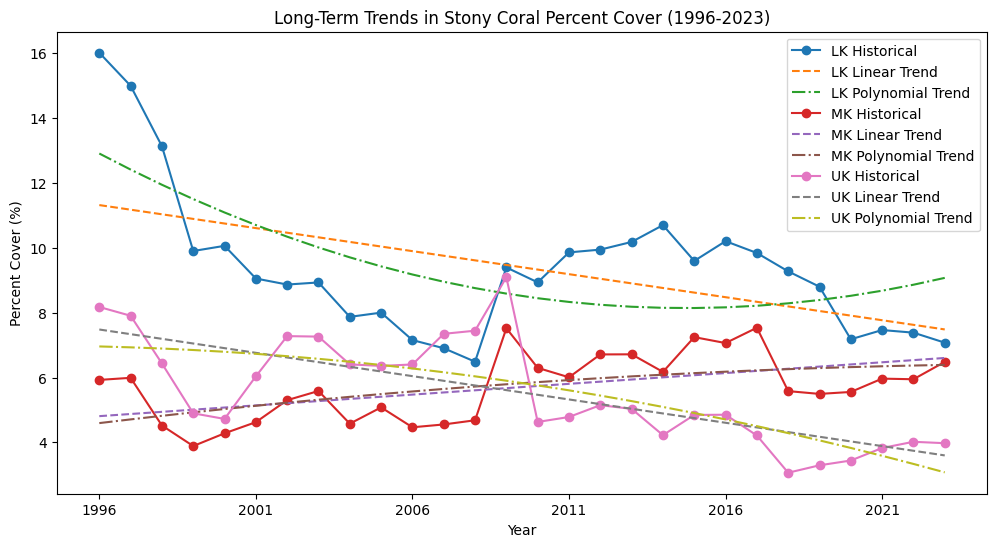


=== Long-Term Trends in Species Richness ===
LK Species Richness Linear Trend: Slope = -0.1538 species/year, Annual Change = -0.15 species, R² = 0.159, p-value = 0.1770
LK Species Richness Polynomial Trend: R² = 0.407, p-value = 0.0132
MK Species Richness Linear Trend: Slope = -0.5989 species/year, Annual Change = -0.60 species, R² = 0.638, p-value = 0.0011
MK Species Richness Polynomial Trend: R² = 0.679, p-value = 0.0003
UK Species Richness Linear Trend: Slope = -0.2198 species/year, Annual Change = -0.22 species, R² = 0.192, p-value = 0.1338
UK Species Richness Polynomial Trend: R² = 0.339, p-value = 0.0292


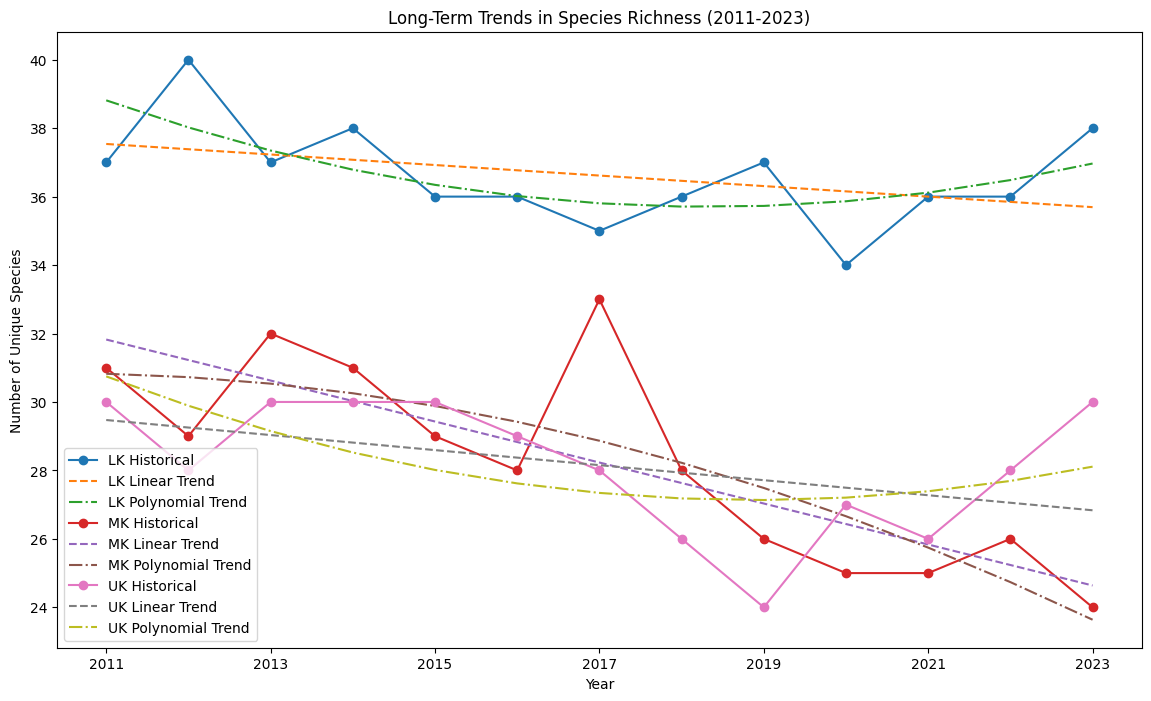


=== Sanctuary-Wide Net Changes in Percent Cover ===
Sanctuary-Wide Percent Cover (1996): 10.04%
Sanctuary-Wide Percent Cover (2023): 5.84%
Net Change (1996 to 2023): -4.19%
Net Change (2023 to 2030, No Intervention): 0.30% (95% CI: [0.30, 1.05])
Net Change (2023 to 2030, Temp Mitigation): 0.30% (95% CI: [0.09, 1.29])
Net Change (2023 to 2030, Disease Management): 0.28% (95% CI: [0.01, 1.04])


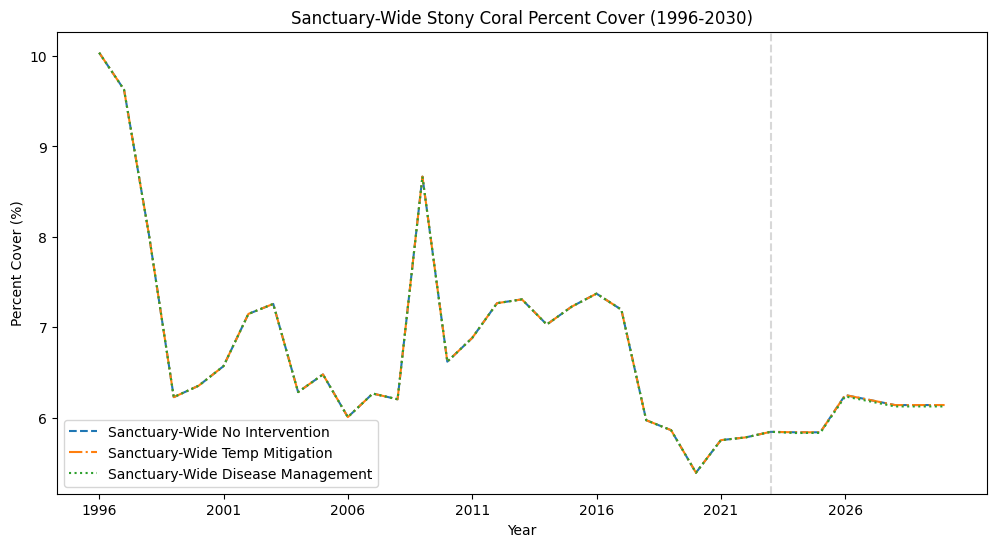


=== Sanctuary-Wide Net Changes in Species Richness ===
Sanctuary-Wide Species Richness (2011): 98 species
Sanctuary-Wide Species Richness (2023): 92 species
Net Change (2011 to 2023): -6 species
Net Change (2023 to 2030, No Intervention): -1 species (95% CI: [-1, 11])
Net Change (2023 to 2030, Temp Mitigation): 0 species (95% CI: [-3, 15])
Net Change (2023 to 2030, Disease Management): 0 species (95% CI: [-0, 12])


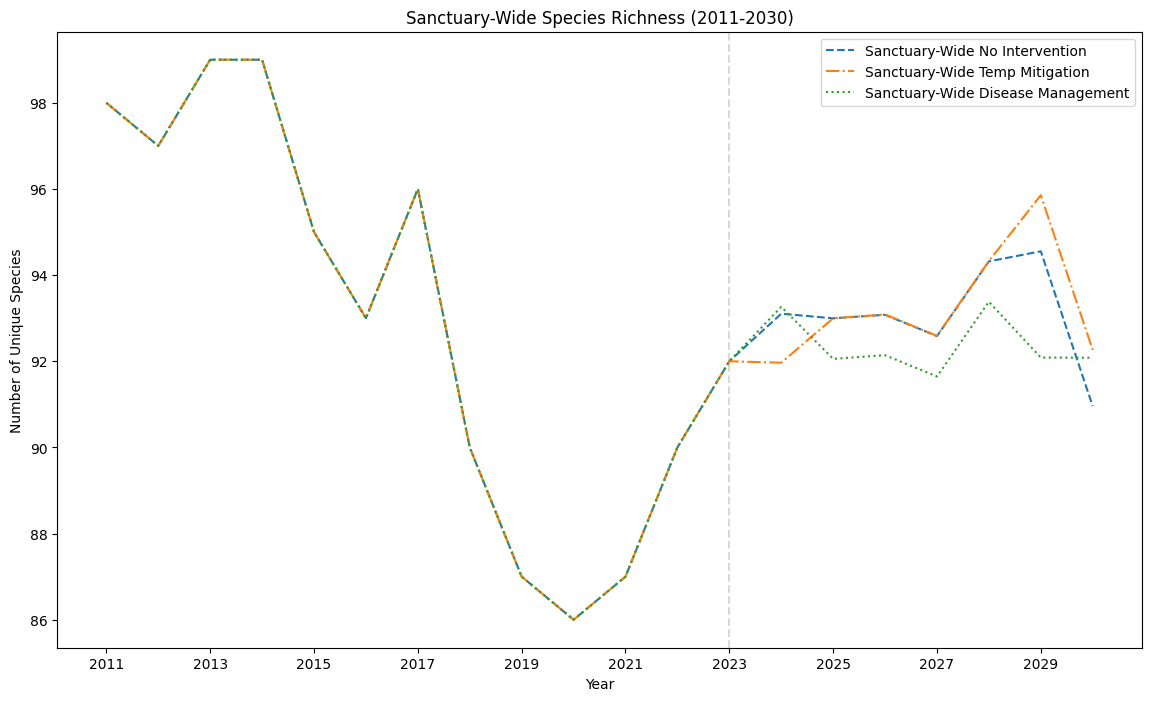


=== Task 3: Localized Variations vs Broad-Scale Changes ===
Percent Cover Variability Across Subregions (Standard Deviation Over Time):
Average SD (1996-2023): 2.47%
Min SD: 1.01%, Max SD: 5.29%

Species Richness Variability Across Subregions (Standard Deviation Over Time):
Average SD (2011-2023): 5.04 species
Min SD: 3.61 species, Max SD: 7.02 species

Sanctuary-Wide Percent Cover Polynomial Trend (1996-2023):
R² = 0.307

Sanctuary-Wide Species Richness Polynomial Trend (2011-2023):
R² = 0.684

Percent Cover Subregional Differences Debugging:
Year 1996: Data = [16.01140625, 5.925454545454546, 8.173653846153847], Variance = 28.035197
Year 1997: Data = [14.990937500000001, 5.990227272727273, 7.903076923076924], Variance = 22.484924
Year 1998: Data = [13.129375000000001, 4.519772727272727, 6.432692307692308], Variance = 20.438345
Year 1999: Data = [9.89921875, 3.8868181818181817, 4.896346153846154], Variance = 10.366140
Year 2000: Data = [10.05859375, 4.279772727272727, 4.72307692307692

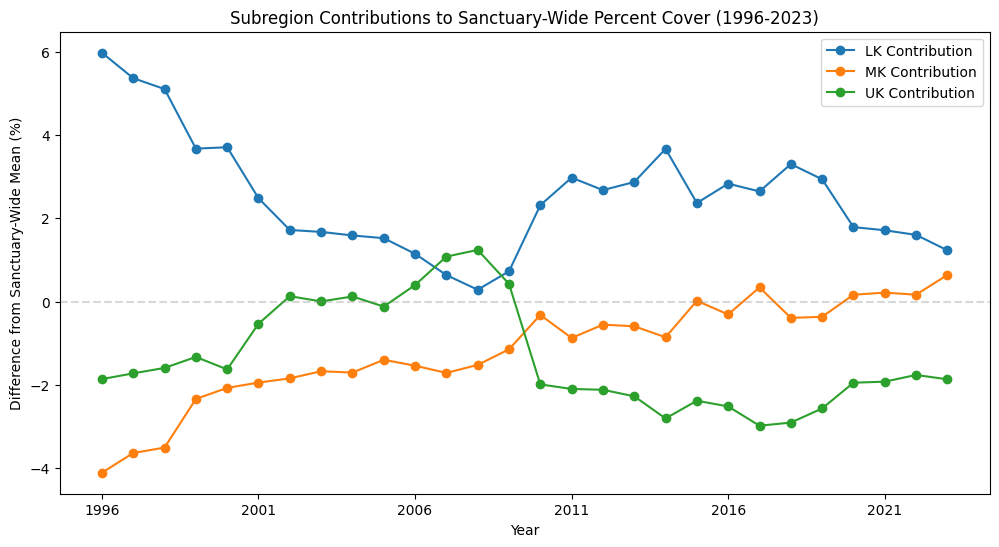

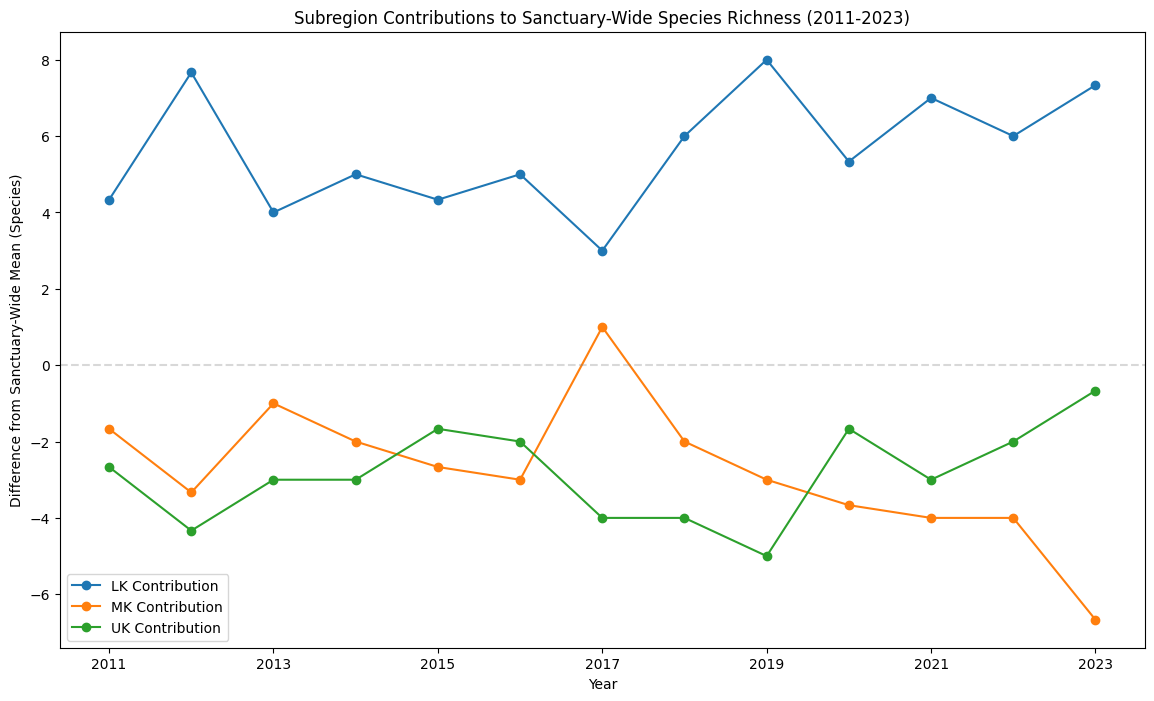

Feature Importance for Percent Cover:
      Feature  Importance
1  Subregion    0.877399
0       Year    0.058962
4        PAL    0.037116
2      TempC    0.026125
3        DSD    0.000398
Feature Importance for Species Richness:
      Feature  Importance
1  Subregion    0.899057
3        DSD    0.084500
4        PAL    0.007864
2      TempC    0.005839
0       Year    0.002739


In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from scipy import stats
from scipy.stats import f_oneway, kruskal

# Prepare historical data (assuming datasets are loaded as a dictionary)
temp_by_subregion = datasets['dataset_XII'].groupby(['Year', 'Subregion'])['TempC'].mean().unstack()
cover_by_subregion = datasets['dataset_V'].groupby(['Year', 'Subregion'])['Stony_coral'].mean().unstack() * 100  # Convert to percentage
richness_by_subregion = datasets['dataset_VI'].groupby(['Year', 'Subregion'])['sciName'].nunique().unstack()

# Prepare conditions data with explicit multi-index
conditions_data = datasets['dataset_VI'].set_index(['Year', 'Subregion'])['Conditions'].str.get_dummies('|').groupby(['Year', 'Subregion']).sum()
conditions_data = conditions_data.reset_index().set_index(['Subregion', 'Year']).unstack(level=0).fillna(0)

# Impute NaN values in temp_by_subregion (forward fill, then fill remaining with mean)
temp_by_subregion_imputed = temp_by_subregion.ffill()
temp_by_subregion_imputed = temp_by_subregion_imputed.fillna(temp_by_subregion_imputed.mean())

# Task 1: Trend Analysis for Stony Coral Percent Cover (unchanged)
print("=== Long-Term Trends in Stony Coral Percent Cover ===")
plt.figure(figsize=(12, 6))
historical_years_cover = cover_by_subregion.index
subregions = ['LK', 'MK', 'UK']
for subregion in subregions:
    years_hist = np.array(historical_years_cover).reshape(-1, 1)
    cover_hist = cover_by_subregion[subregion].dropna().values
    if len(cover_hist) == len(years_hist):
        lin_model = LinearRegression()
        lin_model.fit(years_hist, cover_hist)
        lin_slope = lin_model.coef_[0]
        lin_annual_change = (lin_slope / cover_hist.mean()) * 100 if cover_hist.mean() != 0 else 0
        lin_r2 = lin_model.score(years_hist, cover_hist)
        lin_se_slope = np.sqrt(np.sum((cover_hist - lin_model.predict(years_hist)) ** 2) / ((len(cover_hist) - 2) * np.sum((years_hist - years_hist.mean()) ** 2)))
        lin_t_stat = lin_slope / lin_se_slope
        lin_p_value = 2 * (1 - stats.t.cdf(np.abs(lin_t_stat), len(cover_hist) - 2))
        
        polyreg = make_pipeline(PolynomialFeatures(2), LinearRegression())
        polyreg.fit(years_hist, cover_hist)
        poly_trend_line = polyreg.predict(years_hist)
        poly_r2 = polyreg.score(years_hist, cover_hist)
        poly_residuals = cover_hist - poly_trend_line
        poly_ss_res = np.sum(poly_residuals ** 2)
        poly_ss_tot = np.sum((cover_hist - np.mean(cover_hist)) ** 2)
        poly_f_stat = (poly_ss_tot - poly_ss_res) / (poly_ss_res / (len(cover_hist) - 3))
        poly_p_value = 1 - stats.f.cdf(poly_f_stat, 2, len(cover_hist) - 3)
        
        print(f"{subregion} Stony Coral Percent Cover Linear Trend: Slope = {lin_slope:.4f} %/year, Annual Change = {lin_annual_change:.2f}%, R² = {lin_r2:.3f}, p-value = {lin_p_value:.4f}")
        print(f"{subregion} Stony Coral Percent Cover Polynomial Trend: R² = {poly_r2:.3f}, p-value = {poly_p_value:.4f}")
        
        plt.plot(historical_years_cover, cover_hist, label=f'{subregion} Historical', marker='o')
        plt.plot(historical_years_cover, lin_model.predict(years_hist), linestyle='--', label=f'{subregion} Linear Trend')
        plt.plot(historical_years_cover, poly_trend_line, linestyle='-.', label=f'{subregion} Polynomial Trend')
    else:
        print(f"Data length mismatch for {subregion} percent cover: {len(cover_hist)} values, {len(years_hist)} years")

plt.xlabel('Year')
plt.ylabel('Percent Cover (%)')
plt.title('Long-Term Trends in Stony Coral Percent Cover (1996-2023)')
plt.xticks(range(min(historical_years_cover), max(historical_years_cover) + 1, 5))
plt.legend(loc='best')
plt.savefig('/kaggle/working/plots/cover_trends.png')
plt.show()

# Task 1: Trend Analysis for Species Richness (unchanged)
print("\n=== Long-Term Trends in Species Richness ===")
plt.figure(figsize=(14, 8))
historical_years_richness = richness_by_subregion.index
for subregion in subregions:
    years_hist = np.array(historical_years_richness).reshape(-1, 1)
    richness_hist = richness_by_subregion[subregion].dropna().values
    if len(richness_hist) == len(years_hist):
        lin_model = LinearRegression()
        lin_model.fit(years_hist, richness_hist)
        lin_slope = lin_model.coef_[0]
        lin_annual_change = lin_slope
        lin_r2 = lin_model.score(years_hist, richness_hist)
        lin_se_slope = np.sqrt(np.sum((richness_hist - lin_model.predict(years_hist)) ** 2) / ((len(richness_hist) - 2) * np.sum((years_hist - years_hist.mean()) ** 2)))
        lin_t_stat = lin_slope / lin_se_slope
        lin_p_value = 2 * (1 - stats.t.cdf(np.abs(lin_t_stat), len(richness_hist) - 2))
        
        polyreg = make_pipeline(PolynomialFeatures(2), LinearRegression())
        polyreg.fit(years_hist, richness_hist)
        poly_trend_line = polyreg.predict(years_hist)
        poly_r2 = polyreg.score(years_hist, richness_hist)
        poly_residuals = richness_hist - poly_trend_line
        poly_ss_res = np.sum(poly_residuals ** 2)
        poly_ss_tot = np.sum((richness_hist - np.mean(richness_hist)) ** 2)
        poly_f_stat = (poly_ss_tot - poly_ss_res) / (poly_ss_res / (len(richness_hist) - 3))
        poly_p_value = 1 - stats.f.cdf(poly_f_stat, 2, len(richness_hist) - 3)
        
        print(f"{subregion} Species Richness Linear Trend: Slope = {lin_slope:.4f} species/year, Annual Change = {lin_annual_change:.2f} species, R² = {lin_r2:.3f}, p-value = {lin_p_value:.4f}")
        print(f"{subregion} Species Richness Polynomial Trend: R² = {poly_r2:.3f}, p-value = {poly_p_value:.4f}")
        
        plt.plot(historical_years_richness, richness_hist, label=f'{subregion} Historical', marker='o')
        plt.plot(historical_years_richness, lin_model.predict(years_hist), linestyle='--', label=f'{subregion} Linear Trend')
        plt.plot(historical_years_richness, poly_trend_line, linestyle='-.', label=f'{subregion} Polynomial Trend')
    else:
        print(f"Data length mismatch for {subregion} species richness: {len(richness_hist)} values, {len(years_hist)} years")

plt.xlabel('Year')
plt.ylabel('Number of Unique Species')
plt.title('Long-Term Trends in Species Richness (2011-2023)')
plt.xticks(range(min(historical_years_richness), max(historical_years_richness) + 1, 2))
plt.legend(loc='best')
plt.savefig('/kaggle/working/plots/richness_trends.png')
plt.show()

# Task 2: Future Projections (unchanged)
years = sorted(datasets['dataset_XII']['Year'].unique())
features = []
targets_cover = []
targets_richness = []

for year in years:
    for subregion in subregions:
        temp = temp_by_subregion_imputed.loc[year, subregion] if year in temp_by_subregion_imputed.index else np.nan
        dsd_col = ('DSD', subregion)
        pal_col = ('PAL', subregion)
        dsd = conditions_data[dsd_col].loc[year] if dsd_col in conditions_data.columns and year in conditions_data.index else 0
        pal = conditions_data[pal_col].loc[year] if pal_col in conditions_data.columns and year in conditions_data.index else 0
        cover = cover_by_subregion.loc[year, subregion] if year in cover_by_subregion.index else np.nan
        richness = richness_by_subregion.loc[year, subregion] if year in richness_by_subregion.index else np.nan
        
        if not np.isnan(temp):
            features.append([year, subregion, temp, dsd, pal])
            targets_cover.append(cover if not np.isnan(cover) else np.nan)
            targets_richness.append(richness if not np.isnan(richness) else np.nan)

feature_df = pd.DataFrame(features, columns=['Year', 'Subregion', 'TempC', 'DSD', 'PAL'])
feature_df = feature_df.dropna(subset=['TempC'])

le = LabelEncoder()
feature_df['Subregion'] = le.fit_transform(feature_df['Subregion'])

X_cover = feature_df[~np.isnan(targets_cover)][['Year', 'Subregion', 'TempC', 'DSD', 'PAL']].values
y_cover = np.array(targets_cover)[~np.isnan(targets_cover)]
X_richness = feature_df[~np.isnan(targets_richness)][['Year', 'Subregion', 'TempC', 'DSD', 'PAL']].values
y_richness = np.array(targets_richness)[~np.isnan(targets_richness)]

xgb_cover = XGBRegressor(n_estimators=100, random_state=42, tree_method='hist', device='cuda')
xgb_cover.fit(X_cover, y_cover)

xgb_richness = XGBRegressor(n_estimators=100, random_state=42, tree_method='hist', device='cuda')
xgb_richness.fit(X_richness, y_richness)

future_years = np.array(range(2024, 2031))
predicted_temps = {}
models = {}
for subregion in subregions:
    X = temp_by_subregion_imputed.index.values.reshape(-1, 1)
    y = temp_by_subregion_imputed[subregion].values
    model = LinearRegression()
    model.fit(X, y)
    models[subregion] = model
    predicted_temps[subregion] = model.predict(future_years.reshape(-1, 1))

scenarios = ['No Intervention', 'Temp Mitigation', 'Disease Management']
future_cover = {s: {'LK': [], 'MK': [], 'UK': []} for s in scenarios}
future_richness = {s: {'LK': [], 'MK': [], 'UK': []} for s in scenarios}

n_bootstrap = 100
cover_net_change_bootstrap = {s: [] for s in scenarios}
richness_net_change_bootstrap = {s: [] for s in scenarios}

last_dsd = {}
last_pal = {}
for subregion in subregions:
    dsd_col = ('DSD', subregion)
    pal_col = ('PAL', subregion)
    last_dsd[subregion] = conditions_data[dsd_col].loc[2023] if dsd_col in conditions_data.columns and 2023 in conditions_data.index else 0
    last_pal[subregion] = conditions_data[pal_col].loc[2023] if pal_col in conditions_data.columns and 2023 in conditions_data.index else 0

for subregion in subregions:
    subregion_encoded = le.transform([subregion])[0]
    for scenario in scenarios:
        for year in future_years:
            temp = predicted_temps[subregion][year - 2024]
            if scenario == 'Temp Mitigation':
                temp = temp_by_subregion_imputed[subregion].iloc[-1]
            dsd = last_dsd[subregion] * (1 + 0.1 * (year - 2023))
            pal = last_pal[subregion] * (1 + 0.05 * (year - 2023))
            if scenario == 'Disease Management':
                dsd *= 0.5
            
            features = np.array([[year, subregion_encoded, temp, dsd, pal]])
            cover_pred = xgb_cover.predict(features)[0]
            richness_pred = xgb_richness.predict(features)[0]
            future_cover[scenario][subregion].append(max(0, cover_pred))
            future_richness[scenario][subregion].append(max(0, richness_pred))

for scenario in scenarios:
    for _ in range(n_bootstrap):
        cover_2030_bootstrap = []
        richness_2030_bootstrap = []
        for subregion in subregions:
            subregion_encoded = le.transform([subregion])[0]
            year = 2030
            temp = predicted_temps[subregion][year - 2024]
            if scenario == 'Temp Mitigation':
                temp = temp_by_subregion_imputed[subregion].iloc[-1]
            dsd = last_dsd[subregion] * (1 + 0.1 * (year - 2023))
            pal = last_pal[subregion] * (1 + 0.05 * (year - 2023))
            if scenario == 'Disease Management':
                dsd *= 0.5
            
            features = np.array([[year, subregion_encoded, temp, dsd, pal]])
            noise = np.random.normal(0, 0.5, features.shape)
            noisy_features = features + noise
            cover_2030_bootstrap.append(max(0, xgb_cover.predict(noisy_features)[0]))
            richness_2030_bootstrap.append(max(0, xgb_richness.predict(noisy_features)[0]))
        
        cover_2030_avg = np.mean(cover_2030_bootstrap)
        richness_2030_sum = np.sum(richness_2030_bootstrap)
        cover_net_change_bootstrap[scenario].append(cover_2030_avg - cover_by_subregion.mean(axis=1).loc[2023])
        richness_net_change_bootstrap[scenario].append(richness_2030_sum - richness_by_subregion.sum(axis=1).loc[2023])

print("\n=== Sanctuary-Wide Net Changes in Percent Cover ===")
historical_years_cover = cover_by_subregion.index
all_years_cover = np.arange(min(historical_years_cover), max(future_years) + 1)

sanctuary_cover_hist = cover_by_subregion.mean(axis=1)
sanctuary_cover_future = {s: [] for s in scenarios}
for scenario in scenarios:
    for year_idx in range(len(future_years)):
        year_avg = np.mean([future_cover[scenario][subregion][year_idx] for subregion in subregions])
        sanctuary_cover_future[scenario].append(year_avg)

sanctuary_cover_combined = {s: np.concatenate([sanctuary_cover_hist.values, sanctuary_cover_future[s]]) for s in scenarios}

cover_1996 = sanctuary_cover_hist.loc[1996]
cover_2023 = sanctuary_cover_hist.loc[2023]
cover_2030 = {s: sanctuary_cover_combined[s][-1] for s in scenarios}

cover_net_change_ci = {s: np.percentile(cover_net_change_bootstrap[s], [2.5, 97.5]) for s in scenarios}

print(f"Sanctuary-Wide Percent Cover (1996): {cover_1996:.2f}%")
print(f"Sanctuary-Wide Percent Cover (2023): {cover_2023:.2f}%")
print(f"Net Change (1996 to 2023): {cover_2023 - cover_1996:.2f}%")
for scenario in scenarios:
    net_change_2023_2030 = cover_2030[scenario] - cover_2023
    ci_lower, ci_upper = cover_net_change_ci[scenario]
    print(f"Net Change (2023 to 2030, {scenario}): {net_change_2023_2030:.2f}% (95% CI: [{ci_lower:.2f}, {ci_upper:.2f}])")

plt.figure(figsize=(12, 6))
for scenario in scenarios:
    plt.plot(all_years_cover, sanctuary_cover_combined[scenario], label=f'Sanctuary-Wide {scenario}', linestyle='--' if scenario == 'No Intervention' else '-.' if scenario == 'Temp Mitigation' else ':')
plt.axvline(x=2023, color='gray', linestyle='--', alpha=0.3)
plt.xlabel('Year')
plt.ylabel('Percent Cover (%)')
plt.title('Sanctuary-Wide Stony Coral Percent Cover (1996-2030)')
plt.xticks(range(min(all_years_cover), max(all_years_cover) + 1, 5))
plt.legend(loc='best')
plt.savefig('/kaggle/working/plots/sanctuary_cover_trends.png')
plt.show()

print("\n=== Sanctuary-Wide Net Changes in Species Richness ===")
historical_years_richness = richness_by_subregion.index
all_years_richness = np.arange(min(historical_years_richness), max(future_years) + 1)

sanctuary_richness_hist = richness_by_subregion.sum(axis=1)
sanctuary_richness_future = {s: [] for s in scenarios}
for scenario in scenarios:
    for year_idx in range(len(future_years)):
        year_sum = np.sum([future_richness[scenario][subregion][year_idx] for subregion in subregions])
        sanctuary_richness_future[scenario].append(year_sum)

sanctuary_richness_combined = {s: np.concatenate([sanctuary_richness_hist.values, sanctuary_richness_future[s]]) for s in scenarios}

richness_2011 = sanctuary_richness_hist.loc[2011]
richness_2023 = sanctuary_richness_hist.loc[2023]
richness_2030 = {s: sanctuary_richness_combined[s][-1] for s in scenarios}

richness_net_change_ci = {s: np.percentile(richness_net_change_bootstrap[s], [2.5, 97.5]) for s in scenarios}

print(f"Sanctuary-Wide Species Richness (2011): {richness_2011:.0f} species")
print(f"Sanctuary-Wide Species Richness (2023): {richness_2023:.0f} species")
print(f"Net Change (2011 to 2023): {richness_2023 - richness_2011:.0f} species")
for scenario in scenarios:
    net_change_2023_2030 = richness_2030[scenario] - richness_2023
    ci_lower, ci_upper = richness_net_change_ci[scenario]
    print(f"Net Change (2023 to 2030, {scenario}): {net_change_2023_2030:.0f} species (95% CI: [{ci_lower:.0f}, {ci_upper:.0f}])")

plt.figure(figsize=(14, 8))
for scenario in scenarios:
    plt.plot(all_years_richness, sanctuary_richness_combined[scenario], label=f'Sanctuary-Wide {scenario}', linestyle='--' if scenario == 'No Intervention' else '-.' if scenario == 'Temp Mitigation' else ':')
plt.axvline(x=2023, color='gray', linestyle='--', alpha=0.3)
plt.xlabel('Year')
plt.ylabel('Number of Unique Species')
plt.title('Sanctuary-Wide Species Richness (2011-2030)')
plt.xticks(range(min(all_years_richness), max(all_years_richness) + 1, 2))
plt.legend(loc='best')
plt.savefig('/kaggle/working/plots/sanctuary_richness_trends.png')
plt.show()

# Task 3: Identify Localized Variations vs Broad-Scale Changes
print("\n=== Task 3: Localized Variations vs Broad-Scale Changes ===")

# Step 1: Quantify variability across subregions
cover_std = cover_by_subregion.std(axis=1)
print("Percent Cover Variability Across Subregions (Standard Deviation Over Time):")
print(f"Average SD (1996-2023): {cover_std.mean():.2f}%")
print(f"Min SD: {cover_std.min():.2f}%, Max SD: {cover_std.max():.2f}%")

richness_std = richness_by_subregion.std(axis=1)
print("\nSpecies Richness Variability Across Subregions (Standard Deviation Over Time):")
print(f"Average SD (2011-2023): {richness_std.mean():.2f} species")
print(f"Min SD: {richness_std.min():.2f} species, Max SD: {richness_std.max():.2f} species")

# Step 2: Compare subregion-specific trends to sanctuary-wide trends
sanctuary_cover_hist = cover_by_subregion.mean(axis=1)
years_cover = np.array(historical_years_cover).reshape(-1, 1)
polyreg_cover = make_pipeline(PolynomialFeatures(2), LinearRegression())
polyreg_cover.fit(years_cover, sanctuary_cover_hist)
sanctuary_cover_poly_trend = polyreg_cover.predict(years_cover)
sanctuary_cover_r2 = polyreg_cover.score(years_cover, sanctuary_cover_hist)

print("\nSanctuary-Wide Percent Cover Polynomial Trend (1996-2023):")
print(f"R² = {sanctuary_cover_r2:.3f}")

sanctuary_richness_hist = richness_by_subregion.sum(axis=1)
years_richness = np.array(historical_years_richness).reshape(-1, 1)
polyreg_richness = make_pipeline(PolynomialFeatures(2), LinearRegression())
polyreg_richness.fit(years_richness, sanctuary_richness_hist)
sanctuary_richness_poly_trend = polyreg_richness.predict(years_richness)
sanctuary_richness_r2 = polyreg_richness.score(years_richness, sanctuary_richness_hist)

print("\nSanctuary-Wide Species Richness Polynomial Trend (2011-2023):")
print(f"R² = {sanctuary_richness_r2:.3f}")

# Step 3: Statistical test to assess subregional differences
# Percent Cover: Debug variance and use Kruskal-Wallis test
cover_pvalues = []
valid_years_cover = 0
print("\nPercent Cover Subregional Differences Debugging:")
for year in historical_years_cover:
    data = [cover_by_subregion[subregion].loc[year] for subregion in subregions if year in cover_by_subregion.index]
    if len(data) == 3:  # Ensure all subregions have data
        variance = np.var(data, ddof=1)
        print(f"Year {year}: Data = {data}, Variance = {variance:.6f}")
        if variance > 1e-10:  # Use a small epsilon to handle near-zero variance
            try:
                stat, p_value = kruskal(*data)
                cover_pvalues.append(p_value)
                valid_years_cover += 1
            except ValueError as e:
                print(f"Kruskal-Wallis failed for year {year}: {e}")
        else:
            print(f"Skipping year {year} due to near-zero variance")

if cover_pvalues:
    cover_pvalues = np.array(cover_pvalues)
    print("\nPercent Cover Kruskal-Wallis (Subregional Differences):")
    print(f"Number of valid years for test: {valid_years_cover} out of {len(historical_years_cover)}")
    print(f"Average p-value (1996-2023): {cover_pvalues.mean():.4f}")
    print(f"Proportion of years with significant differences (p < 0.05): {(cover_pvalues < 0.05).mean():.2%}")
else:
    print("\nPercent Cover Kruskal-Wallis (Subregional Differences):")
    print("No valid years for test (all years have near-zero variance across subregions)")

# Species Richness: Debug variance and use Kruskal-Wallis test
richness_pvalues = []
valid_years_richness = 0
print("\nSpecies Richness Subregional Differences Debugging:")
for year in historical_years_richness:
    data = [richness_by_subregion[subregion].loc[year] for subregion in subregions if year in richness_by_subregion.index]
    if len(data) == 3:
        variance = np.var(data, ddof=1)
        print(f"Year {year}: Data = {data}, Variance = {variance:.6f}")
        if variance > 1e-10:
            try:
                stat, p_value = kruskal(*data)
                richness_pvalues.append(p_value)
                valid_years_richness += 1
            except ValueError as e:
                print(f"Kruskal-Wallis failed for year {year}: {e}")
        else:
            print(f"Skipping year {year} due to near-zero variance")

if richness_pvalues:
    richness_pvalues = np.array(richness_pvalues)
    print("\nSpecies Richness Kruskal-Wallis (Subregional Differences):")
    print(f"Number of valid years for test: {valid_years_richness} out of {len(historical_years_richness)}")
    print(f"Average p-value (2011-2023): {richness_pvalues.mean():.4f}")
    print(f"Proportion of years with significant differences (p < 0.05): {(richness_pvalues < 0.05).mean():.2%}")
else:
    print("\nSpecies Richness Kruskal-Wallis (Subregional Differences):")
    print("No valid years for test (all years have near-zero variance across subregions)")

# Step 4: Visualize subregion contributions to sanctuary-wide trends
plt.figure(figsize=(12, 6))
sanctuary_cover_mean = cover_by_subregion.mean(axis=1)
for subregion in subregions:
    contribution = cover_by_subregion[subregion] - sanctuary_cover_mean
    plt.plot(historical_years_cover, contribution, label=f'{subregion} Contribution', marker='o')
plt.axhline(y=0, color='gray', linestyle='--', alpha=0.3)
plt.xlabel('Year')
plt.ylabel('Difference from Sanctuary-Wide Mean (%)')
plt.title('Subregion Contributions to Sanctuary-Wide Percent Cover (1996-2023)')
plt.xticks(range(min(historical_years_cover), max(historical_years_cover) + 1, 5))
plt.legend(loc='best')
plt.savefig('/kaggle/working/plots/cover_contributions.png')
plt.show()

plt.figure(figsize=(14, 8))
sanctuary_richness_mean = richness_by_subregion.sum(axis=1) / len(subregions)  # Average per subregion
for subregion in subregions:
    contribution = richness_by_subregion[subregion] - sanctuary_richness_mean
    plt.plot(historical_years_richness, contribution, label=f'{subregion} Contribution', marker='o')
plt.axhline(y=0, color='gray', linestyle='--', alpha=0.3)
plt.xlabel('Year')
plt.ylabel('Difference from Sanctuary-Wide Mean (Species)')
plt.title('Subregion Contributions to Sanctuary-Wide Species Richness (2011-2023)')
plt.xticks(range(min(historical_years_richness), max(historical_years_richness) + 1, 2))
plt.legend(loc='best')
plt.savefig('/kaggle/working/plots/richness_contributions.png')
plt.show()

# Feature Importance
cover_importance = pd.DataFrame({'Feature': ['Year', 'Subregion', 'TempC', 'DSD', 'PAL'], 'Importance': xgb_cover.feature_importances_})
richness_importance = pd.DataFrame({'Feature': ['Year', 'Subregion', 'TempC', 'DSD', 'PAL'], 'Importance': xgb_richness.feature_importances_})
print("Feature Importance for Percent Cover:\n", cover_importance.sort_values(by='Importance', ascending=False))
print("Feature Importance for Species Richness:\n", richness_importance.sort_values(by='Importance', ascending=False))



=== Long-Term Trends in Stony Coral Percent Cover ===
LK Stony Coral Percent Cover Linear Trend: Slope = -0.1420 %/year, Annual Change = -1.51%, R² = 0.269, p-value = 0.0047
LK Stony Coral Percent Cover Polynomial Trend: R² = 0.398, p-value = 0.0000
MK Stony Coral Percent Cover Linear Trend: Slope = 0.0664 %/year, Annual Change = 1.16%, R² = 0.286, p-value = 0.0033
MK Stony Coral Percent Cover Polynomial Trend: R² = 0.298, p-value = 0.0005
UK Stony Coral Percent Cover Linear Trend: Slope = -0.1438 %/year, Annual Change = -2.60%, R² = 0.526, p-value = 0.0000
UK Stony Coral Percent Cover Polynomial Trend: R² = 0.552, p-value = 0.0000


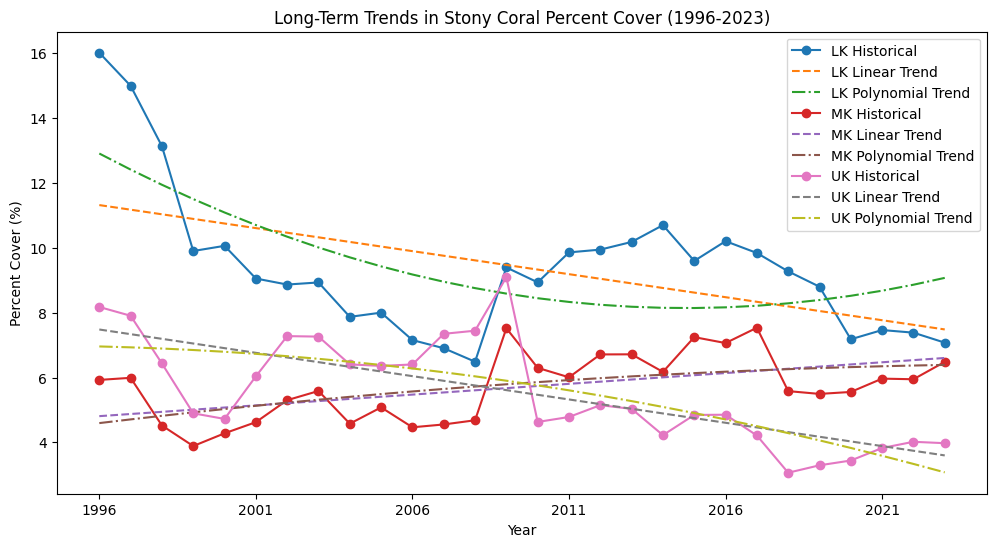


=== Long-Term Trends in Species Richness ===
LK Species Richness Linear Trend: Slope = -0.1538 species/year, Annual Change = -0.15 species, R² = 0.159, p-value = 0.1770
LK Species Richness Polynomial Trend: R² = 0.407, p-value = 0.0132
MK Species Richness Linear Trend: Slope = -0.5989 species/year, Annual Change = -0.60 species, R² = 0.638, p-value = 0.0011
MK Species Richness Polynomial Trend: R² = 0.679, p-value = 0.0003
UK Species Richness Linear Trend: Slope = -0.2198 species/year, Annual Change = -0.22 species, R² = 0.192, p-value = 0.1338
UK Species Richness Polynomial Trend: R² = 0.339, p-value = 0.0292


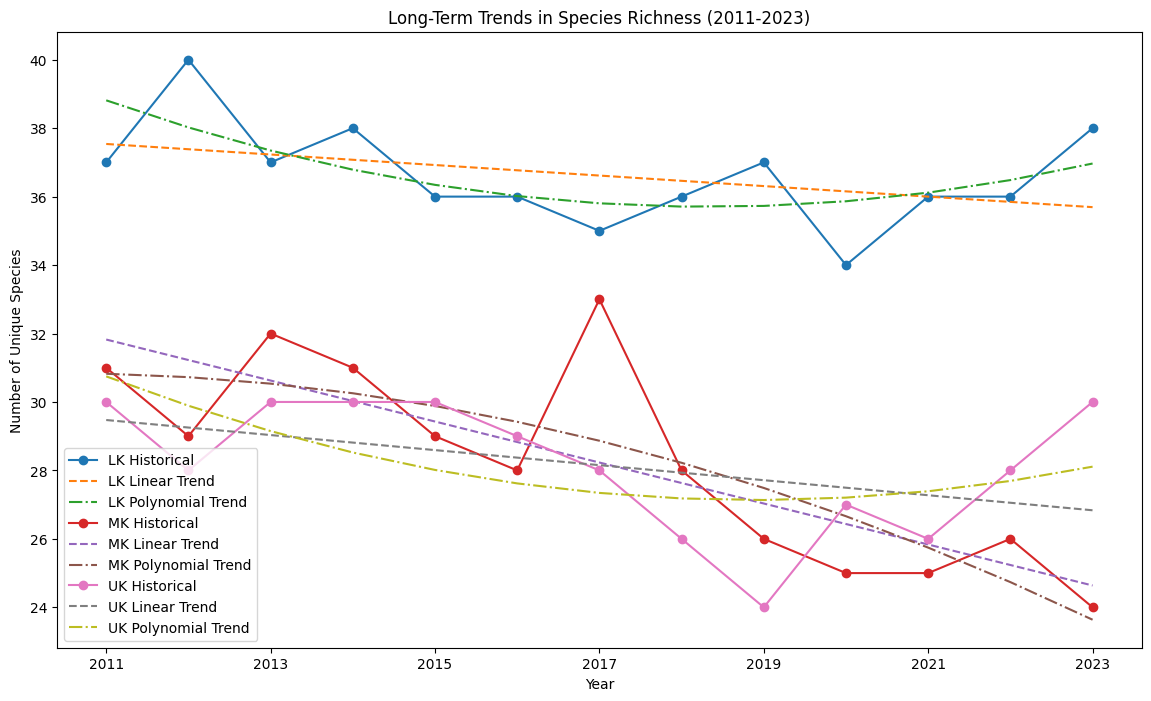


=== Sanctuary-Wide Net Changes in Percent Cover ===
Sanctuary-Wide Percent Cover (1996): 10.04%
Sanctuary-Wide Percent Cover (2023): 5.84%
Net Change (1996 to 2023): -4.19%
Net Change (2023 to 2030, No Intervention): 0.30% (95% CI: [0.02, 1.08])
Net Change (2023 to 2030, Temp Mitigation): 0.30% (95% CI: [0.30, 1.12])
Net Change (2023 to 2030, Disease Management): 0.28% (95% CI: [0.28, 1.07])


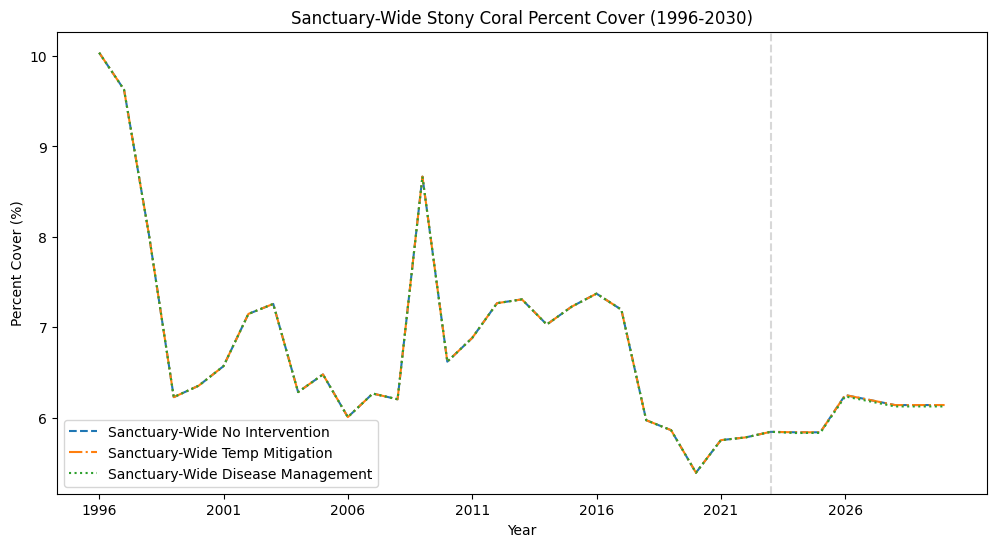


=== Sanctuary-Wide Net Changes in Species Richness ===
Sanctuary-Wide Species Richness (2011): 98 species
Sanctuary-Wide Species Richness (2023): 92 species
Net Change (2011 to 2023): -6 species
Net Change (2023 to 2030, No Intervention): -1 species (95% CI: [-1, 11])
Net Change (2023 to 2030, Temp Mitigation): 0 species (95% CI: [-2, 10])
Net Change (2023 to 2030, Disease Management): 0 species (95% CI: [-0, 12])


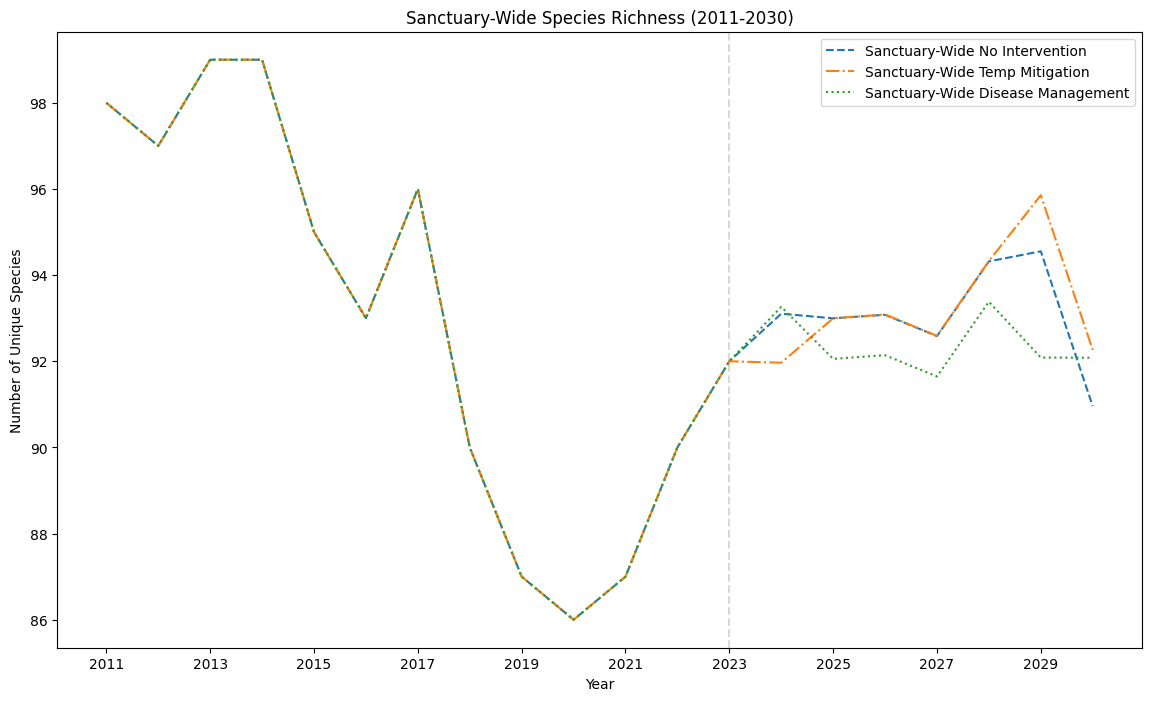


=== Task 3: Localized Variations vs Broad-Scale Changes ===
Percent Cover Variability Across Subregions (Standard Deviation Over Time):
Average SD (1996-2023): 2.47%
Min SD: 1.01%, Max SD: 5.29%

Species Richness Variability Across Subregions (Standard Deviation Over Time):
Average SD (2011-2023): 5.04 species
Min SD: 3.61 species, Max SD: 7.02 species

Sanctuary-Wide Percent Cover Polynomial Trend (1996-2023):
R² = 0.307

Sanctuary-Wide Species Richness Polynomial Trend (2011-2023):
R² = 0.684

Percent Cover Subregional Differences Debugging:
Year 1996: Data = [16.01140625, 5.925454545454546, 8.173653846153847], Variance = 28.035197
Year 1997: Data = [14.990937500000001, 5.990227272727273, 7.903076923076924], Variance = 22.484924
Year 1998: Data = [13.129375000000001, 4.519772727272727, 6.432692307692308], Variance = 20.438345
Year 1999: Data = [9.89921875, 3.8868181818181817, 4.896346153846154], Variance = 10.366140
Year 2000: Data = [10.05859375, 4.279772727272727, 4.72307692307692

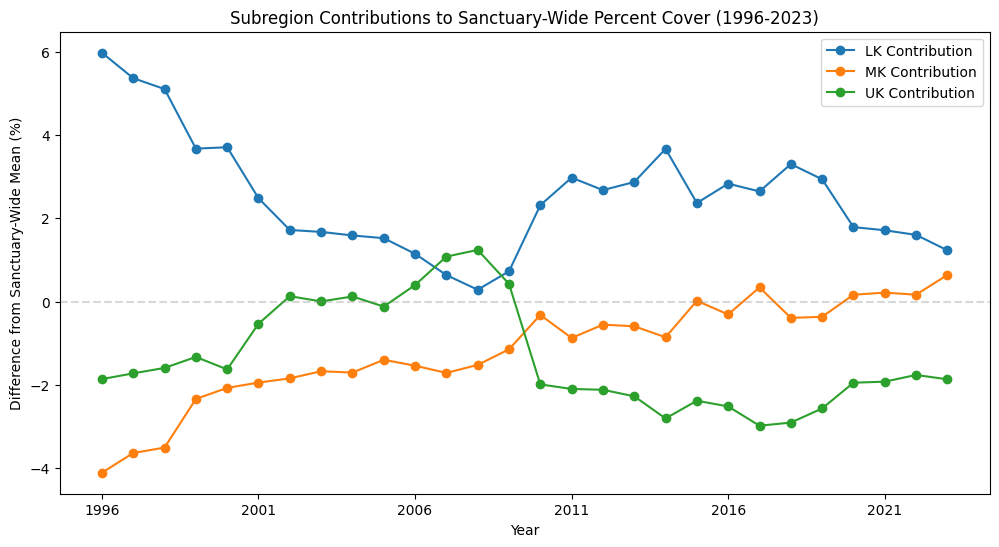

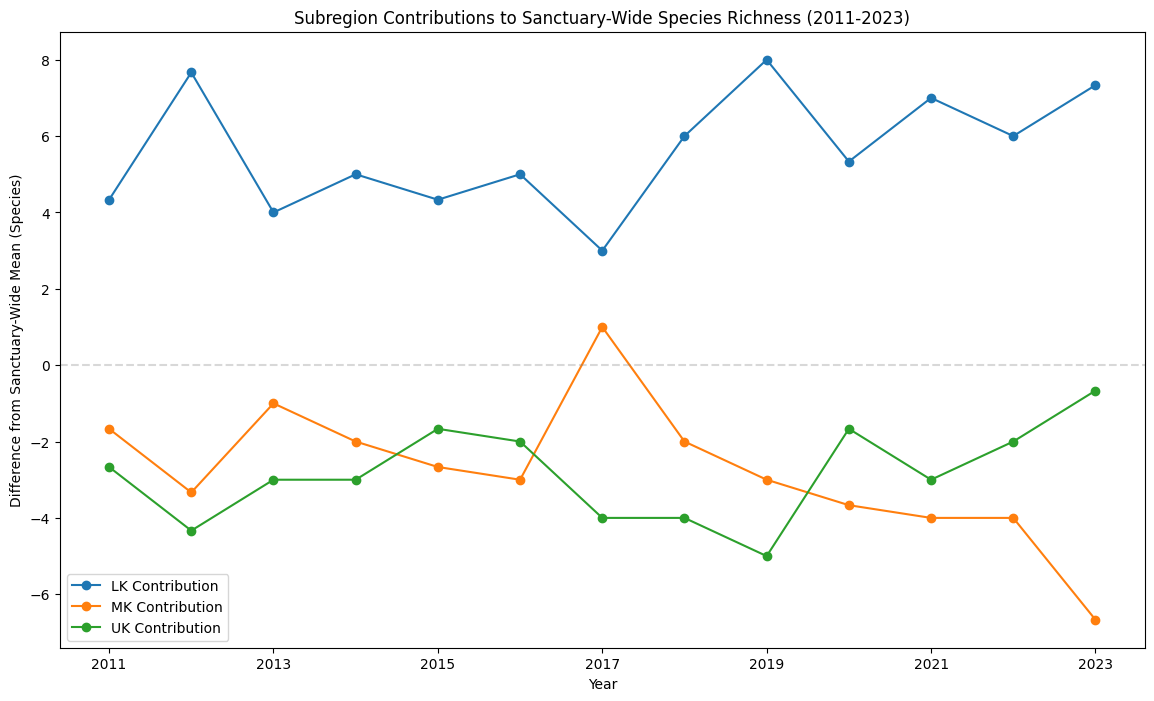

Feature Importance for Percent Cover:
      Feature  Importance
1  Subregion    0.877399
0       Year    0.058962
4        PAL    0.037116
2      TempC    0.026125
3        DSD    0.000398
Feature Importance for Species Richness:
      Feature  Importance
1  Subregion    0.899057
3        DSD    0.084500
4        PAL    0.007864
2      TempC    0.005839
0       Year    0.002739
Fri Apr 25 15:23:41 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 560.35.03              Driver Version: 560.35.03      CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|==================================

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from scipy import stats
from scipy.stats import f_oneway, kruskal

# Prepare historical data (assuming datasets are loaded as a dictionary)
temp_by_subregion = datasets['dataset_XII'].groupby(['Year', 'Subregion'])['TempC'].mean().unstack()
cover_by_subregion = datasets['dataset_V'].groupby(['Year', 'Subregion'])['Stony_coral'].mean().unstack() * 100  # Convert to percentage
richness_by_subregion = datasets['dataset_VI'].groupby(['Year', 'Subregion'])['sciName'].nunique().unstack()

# Prepare conditions data with explicit multi-index
conditions_data = datasets['dataset_VI'].set_index(['Year', 'Subregion'])['Conditions'].str.get_dummies('|').groupby(['Year', 'Subregion']).sum()
conditions_data = conditions_data.reset_index().set_index(['Subregion', 'Year']).unstack(level=0).fillna(0)

# Impute NaN values in temp_by_subregion (forward fill, then fill remaining with mean)
temp_by_subregion_imputed = temp_by_subregion.ffill()
temp_by_subregion_imputed = temp_by_subregion_imputed.fillna(temp_by_subregion_imputed.mean())

# Task 1: Trend Analysis for Stony Coral Percent Cover (unchanged)
print("=== Long-Term Trends in Stony Coral Percent Cover ===")
plt.figure(figsize=(12, 6))
historical_years_cover = cover_by_subregion.index
subregions = ['LK', 'MK', 'UK']
for subregion in subregions:
    years_hist = np.array(historical_years_cover).reshape(-1, 1)
    cover_hist = cover_by_subregion[subregion].dropna().values
    if len(cover_hist) == len(years_hist):
        lin_model = LinearRegression()
        lin_model.fit(years_hist, cover_hist)
        lin_slope = lin_model.coef_[0]
        lin_annual_change = (lin_slope / cover_hist.mean()) * 100 if cover_hist.mean() != 0 else 0
        lin_r2 = lin_model.score(years_hist, cover_hist)
        lin_se_slope = np.sqrt(np.sum((cover_hist - lin_model.predict(years_hist)) ** 2) / ((len(cover_hist) - 2) * np.sum((years_hist - years_hist.mean()) ** 2)))
        lin_t_stat = lin_slope / lin_se_slope
        lin_p_value = 2 * (1 - stats.t.cdf(np.abs(lin_t_stat), len(cover_hist) - 2))
        
        polyreg = make_pipeline(PolynomialFeatures(2), LinearRegression())
        polyreg.fit(years_hist, cover_hist)
        poly_trend_line = polyreg.predict(years_hist)
        poly_r2 = polyreg.score(years_hist, cover_hist)
        poly_residuals = cover_hist - poly_trend_line
        poly_ss_res = np.sum(poly_residuals ** 2)
        poly_ss_tot = np.sum((cover_hist - np.mean(cover_hist)) ** 2)
        poly_f_stat = (poly_ss_tot - poly_ss_res) / (poly_ss_res / (len(cover_hist) - 3))
        poly_p_value = 1 - stats.f.cdf(poly_f_stat, 2, len(cover_hist) - 3)
        
        print(f"{subregion} Stony Coral Percent Cover Linear Trend: Slope = {lin_slope:.4f} %/year, Annual Change = {lin_annual_change:.2f}%, R² = {lin_r2:.3f}, p-value = {lin_p_value:.4f}")
        print(f"{subregion} Stony Coral Percent Cover Polynomial Trend: R² = {poly_r2:.3f}, p-value = {poly_p_value:.4f}")
        
        plt.plot(historical_years_cover, cover_hist, label=f'{subregion} Historical', marker='o')
        plt.plot(historical_years_cover, lin_model.predict(years_hist), linestyle='--', label=f'{subregion} Linear Trend')
        plt.plot(historical_years_cover, poly_trend_line, linestyle='-.', label=f'{subregion} Polynomial Trend')
    else:
        print(f"Data length mismatch for {subregion} percent cover: {len(cover_hist)} values, {len(years_hist)} years")

plt.xlabel('Year')
plt.ylabel('Percent Cover (%)')
plt.title('Long-Term Trends in Stony Coral Percent Cover (1996-2023)')
plt.xticks(range(min(historical_years_cover), max(historical_years_cover) + 1, 5))
plt.legend(loc='best')
plt.savefig('/kaggle/working/plots/cover_trends.png')
plt.show()

# Task 1: Trend Analysis for Species Richness (unchanged)
print("\n=== Long-Term Trends in Species Richness ===")
plt.figure(figsize=(14, 8))
historical_years_richness = richness_by_subregion.index
for subregion in subregions:
    years_hist = np.array(historical_years_richness).reshape(-1, 1)
    richness_hist = richness_by_subregion[subregion].dropna().values
    if len(richness_hist) == len(years_hist):
        lin_model = LinearRegression()
        lin_model.fit(years_hist, richness_hist)
        lin_slope = lin_model.coef_[0]
        lin_annual_change = lin_slope
        lin_r2 = lin_model.score(years_hist, richness_hist)
        lin_se_slope = np.sqrt(np.sum((richness_hist - lin_model.predict(years_hist)) ** 2) / ((len(richness_hist) - 2) * np.sum((years_hist - years_hist.mean()) ** 2)))
        lin_t_stat = lin_slope / lin_se_slope
        lin_p_value = 2 * (1 - stats.t.cdf(np.abs(lin_t_stat), len(richness_hist) - 2))
        
        polyreg = make_pipeline(PolynomialFeatures(2), LinearRegression())
        polyreg.fit(years_hist, richness_hist)
        poly_trend_line = polyreg.predict(years_hist)
        poly_r2 = polyreg.score(years_hist, richness_hist)
        poly_residuals = richness_hist - poly_trend_line
        poly_ss_res = np.sum(poly_residuals ** 2)
        poly_ss_tot = np.sum((richness_hist - np.mean(richness_hist)) ** 2)
        poly_f_stat = (poly_ss_tot - poly_ss_res) / (poly_ss_res / (len(richness_hist) - 3))
        poly_p_value = 1 - stats.f.cdf(poly_f_stat, 2, len(richness_hist) - 3)
        
        print(f"{subregion} Species Richness Linear Trend: Slope = {lin_slope:.4f} species/year, Annual Change = {lin_annual_change:.2f} species, R² = {lin_r2:.3f}, p-value = {lin_p_value:.4f}")
        print(f"{subregion} Species Richness Polynomial Trend: R² = {poly_r2:.3f}, p-value = {poly_p_value:.4f}")
        
        plt.plot(historical_years_richness, richness_hist, label=f'{subregion} Historical', marker='o')
        plt.plot(historical_years_richness, lin_model.predict(years_hist), linestyle='--', label=f'{subregion} Linear Trend')
        plt.plot(historical_years_richness, poly_trend_line, linestyle='-.', label=f'{subregion} Polynomial Trend')
    else:
        print(f"Data length mismatch for {subregion} species richness: {len(richness_hist)} values, {len(years_hist)} years")

plt.xlabel('Year')
plt.ylabel('Number of Unique Species')
plt.title('Long-Term Trends in Species Richness (2011-2023)')
plt.xticks(range(min(historical_years_richness), max(historical_years_richness) + 1, 2))
plt.legend(loc='best')
plt.savefig('/kaggle/working/plots/richness_trends.png')
plt.show()

# Task 2: Future Projections (unchanged)
years = sorted(datasets['dataset_XII']['Year'].unique())
features = []
targets_cover = []
targets_richness = []

for year in years:
    for subregion in subregions:
        temp = temp_by_subregion_imputed.loc[year, subregion] if year in temp_by_subregion_imputed.index else np.nan
        dsd_col = ('DSD', subregion)
        pal_col = ('PAL', subregion)
        dsd = conditions_data[dsd_col].loc[year] if dsd_col in conditions_data.columns and year in conditions_data.index else 0
        pal = conditions_data[pal_col].loc[year] if pal_col in conditions_data.columns and year in conditions_data.index else 0
        cover = cover_by_subregion.loc[year, subregion] if year in cover_by_subregion.index else np.nan
        richness = richness_by_subregion.loc[year, subregion] if year in richness_by_subregion.index else np.nan
        
        if not np.isnan(temp):
            features.append([year, subregion, temp, dsd, pal])
            targets_cover.append(cover if not np.isnan(cover) else np.nan)
            targets_richness.append(richness if not np.isnan(richness) else np.nan)

feature_df = pd.DataFrame(features, columns=['Year', 'Subregion', 'TempC', 'DSD', 'PAL'])
feature_df = feature_df.dropna(subset=['TempC'])

le = LabelEncoder()
feature_df['Subregion'] = le.fit_transform(feature_df['Subregion'])

X_cover = feature_df[~np.isnan(targets_cover)][['Year', 'Subregion', 'TempC', 'DSD', 'PAL']].values
y_cover = np.array(targets_cover)[~np.isnan(targets_cover)]
X_richness = feature_df[~np.isnan(targets_richness)][['Year', 'Subregion', 'TempC', 'DSD', 'PAL']].values
y_richness = np.array(targets_richness)[~np.isnan(targets_richness)]

xgb_cover = XGBRegressor(n_estimators=100, random_state=42, tree_method='hist', device='cuda')
xgb_cover.fit(X_cover, y_cover)

xgb_richness = XGBRegressor(n_estimators=100, random_state=42, tree_method='hist', device='cuda')
xgb_richness.fit(X_richness, y_richness)

future_years = np.array(range(2024, 2031))
predicted_temps = {}
models = {}
for subregion in subregions:
    X = temp_by_subregion_imputed.index.values.reshape(-1, 1)
    y = temp_by_subregion_imputed[subregion].values
    model = LinearRegression()
    model.fit(X, y)
    models[subregion] = model
    predicted_temps[subregion] = model.predict(future_years.reshape(-1, 1))

scenarios = ['No Intervention', 'Temp Mitigation', 'Disease Management']
future_cover = {s: {'LK': [], 'MK': [], 'UK': []} for s in scenarios}
future_richness = {s: {'LK': [], 'MK': [], 'UK': []} for s in scenarios}

n_bootstrap = 100
cover_net_change_bootstrap = {s: [] for s in scenarios}
richness_net_change_bootstrap = {s: [] for s in scenarios}

last_dsd = {}
last_pal = {}
for subregion in subregions:
    dsd_col = ('DSD', subregion)
    pal_col = ('PAL', subregion)
    last_dsd[subregion] = conditions_data[dsd_col].loc[2023] if dsd_col in conditions_data.columns and 2023 in conditions_data.index else 0
    last_pal[subregion] = conditions_data[pal_col].loc[2023] if pal_col in conditions_data.columns and 2023 in conditions_data.index else 0

for subregion in subregions:
    subregion_encoded = le.transform([subregion])[0]
    for scenario in scenarios:
        for year in future_years:
            temp = predicted_temps[subregion][year - 2024]
            if scenario == 'Temp Mitigation':
                temp = temp_by_subregion_imputed[subregion].iloc[-1]
            dsd = last_dsd[subregion] * (1 + 0.1 * (year - 2023))
            pal = last_pal[subregion] * (1 + 0.05 * (year - 2023))
            if scenario == 'Disease Management':
                dsd *= 0.5
            
            features = np.array([[year, subregion_encoded, temp, dsd, pal]])
            cover_pred = xgb_cover.predict(features)[0]
            richness_pred = xgb_richness.predict(features)[0]
            future_cover[scenario][subregion].append(max(0, cover_pred))
            future_richness[scenario][subregion].append(max(0, richness_pred))

for scenario in scenarios:
    for _ in range(n_bootstrap):
        cover_2030_bootstrap = []
        richness_2030_bootstrap = []
        for subregion in subregions:
            subregion_encoded = le.transform([subregion])[0]
            year = 2030
            temp = predicted_temps[subregion][year - 2024]
            if scenario == 'Temp Mitigation':
                temp = temp_by_subregion_imputed[subregion].iloc[-1]
            dsd = last_dsd[subregion] * (1 + 0.1 * (year - 2023))
            pal = last_pal[subregion] * (1 + 0.05 * (year - 2023))
            if scenario == 'Disease Management':
                dsd *= 0.5
            
            features = np.array([[year, subregion_encoded, temp, dsd, pal]])
            noise = np.random.normal(0, 0.5, features.shape)
            noisy_features = features + noise
            cover_2030_bootstrap.append(max(0, xgb_cover.predict(noisy_features)[0]))
            richness_2030_bootstrap.append(max(0, xgb_richness.predict(noisy_features)[0]))
        
        cover_2030_avg = np.mean(cover_2030_bootstrap)
        richness_2030_sum = np.sum(richness_2030_bootstrap)
        cover_net_change_bootstrap[scenario].append(cover_2030_avg - cover_by_subregion.mean(axis=1).loc[2023])
        richness_net_change_bootstrap[scenario].append(richness_2030_sum - richness_by_subregion.sum(axis=1).loc[2023])

print("\n=== Sanctuary-Wide Net Changes in Percent Cover ===")
historical_years_cover = cover_by_subregion.index
all_years_cover = np.arange(min(historical_years_cover), max(future_years) + 1)

sanctuary_cover_hist = cover_by_subregion.mean(axis=1)
sanctuary_cover_future = {s: [] for s in scenarios}
for scenario in scenarios:
    for year_idx in range(len(future_years)):
        year_avg = np.mean([future_cover[scenario][subregion][year_idx] for subregion in subregions])
        sanctuary_cover_future[scenario].append(year_avg)

sanctuary_cover_combined = {s: np.concatenate([sanctuary_cover_hist.values, sanctuary_cover_future[s]]) for s in scenarios}

cover_1996 = sanctuary_cover_hist.loc[1996]
cover_2023 = sanctuary_cover_hist.loc[2023]
cover_2030 = {s: sanctuary_cover_combined[s][-1] for s in scenarios}

cover_net_change_ci = {s: np.percentile(cover_net_change_bootstrap[s], [2.5, 97.5]) for s in scenarios}

print(f"Sanctuary-Wide Percent Cover (1996): {cover_1996:.2f}%")
print(f"Sanctuary-Wide Percent Cover (2023): {cover_2023:.2f}%")
print(f"Net Change (1996 to 2023): {cover_2023 - cover_1996:.2f}%")
for scenario in scenarios:
    net_change_2023_2030 = cover_2030[scenario] - cover_2023
    ci_lower, ci_upper = cover_net_change_ci[scenario]
    print(f"Net Change (2023 to 2030, {scenario}): {net_change_2023_2030:.2f}% (95% CI: [{ci_lower:.2f}, {ci_upper:.2f}])")

plt.figure(figsize=(12, 6))
for scenario in scenarios:
    plt.plot(all_years_cover, sanctuary_cover_combined[scenario], label=f'Sanctuary-Wide {scenario}', linestyle='--' if scenario == 'No Intervention' else '-.' if scenario == 'Temp Mitigation' else ':')
plt.axvline(x=2023, color='gray', linestyle='--', alpha=0.3)
plt.xlabel('Year')
plt.ylabel('Percent Cover (%)')
plt.title('Sanctuary-Wide Stony Coral Percent Cover (1996-2030)')
plt.xticks(range(min(all_years_cover), max(all_years_cover) + 1, 5))
plt.legend(loc='best')
plt.savefig('/kaggle/working/plots/sanctuary_cover_trends.png')
plt.show()

print("\n=== Sanctuary-Wide Net Changes in Species Richness ===")
historical_years_richness = richness_by_subregion.index
all_years_richness = np.arange(min(historical_years_richness), max(future_years) + 1)

sanctuary_richness_hist = richness_by_subregion.sum(axis=1)
sanctuary_richness_future = {s: [] for s in scenarios}
for scenario in scenarios:
    for year_idx in range(len(future_years)):
        year_sum = np.sum([future_richness[scenario][subregion][year_idx] for subregion in subregions])
        sanctuary_richness_future[scenario].append(year_sum)

sanctuary_richness_combined = {s: np.concatenate([sanctuary_richness_hist.values, sanctuary_richness_future[s]]) for s in scenarios}

richness_2011 = sanctuary_richness_hist.loc[2011]
richness_2023 = sanctuary_richness_hist.loc[2023]
richness_2030 = {s: sanctuary_richness_combined[s][-1] for s in scenarios}

richness_net_change_ci = {s: np.percentile(richness_net_change_bootstrap[s], [2.5, 97.5]) for s in scenarios}

print(f"Sanctuary-Wide Species Richness (2011): {richness_2011:.0f} species")
print(f"Sanctuary-Wide Species Richness (2023): {richness_2023:.0f} species")
print(f"Net Change (2011 to 2023): {richness_2023 - richness_2011:.0f} species")
for scenario in scenarios:
    net_change_2023_2030 = richness_2030[scenario] - richness_2023
    ci_lower, ci_upper = richness_net_change_ci[scenario]
    print(f"Net Change (2023 to 2030, {scenario}): {net_change_2023_2030:.0f} species (95% CI: [{ci_lower:.0f}, {ci_upper:.0f}])")

plt.figure(figsize=(14, 8))
for scenario in scenarios:
    plt.plot(all_years_richness, sanctuary_richness_combined[scenario], label=f'Sanctuary-Wide {scenario}', linestyle='--' if scenario == 'No Intervention' else '-.' if scenario == 'Temp Mitigation' else ':')
plt.axvline(x=2023, color='gray', linestyle='--', alpha=0.3)
plt.xlabel('Year')
plt.ylabel('Number of Unique Species')
plt.title('Sanctuary-Wide Species Richness (2011-2030)')
plt.xticks(range(min(all_years_richness), max(all_years_richness) + 1, 2))
plt.legend(loc='best')
plt.savefig('/kaggle/working/plots/sanctuary_richness_trends.png')
plt.show()

# Task 3: Identify Localized Variations vs Broad-Scale Changes
print("\n=== Task 3: Localized Variations vs Broad-Scale Changes ===")

# Step 1: Quantify variability across subregions
cover_std = cover_by_subregion.std(axis=1)
print("Percent Cover Variability Across Subregions (Standard Deviation Over Time):")
print(f"Average SD (1996-2023): {cover_std.mean():.2f}%")
print(f"Min SD: {cover_std.min():.2f}%, Max SD: {cover_std.max():.2f}%")

richness_std = richness_by_subregion.std(axis=1)
print("\nSpecies Richness Variability Across Subregions (Standard Deviation Over Time):")
print(f"Average SD (2011-2023): {richness_std.mean():.2f} species")
print(f"Min SD: {richness_std.min():.2f} species, Max SD: {richness_std.max():.2f} species")

# Step 2: Compare subregion-specific trends to sanctuary-wide trends
sanctuary_cover_hist = cover_by_subregion.mean(axis=1)
years_cover = np.array(historical_years_cover).reshape(-1, 1)
polyreg_cover = make_pipeline(PolynomialFeatures(2), LinearRegression())
polyreg_cover.fit(years_cover, sanctuary_cover_hist)
sanctuary_cover_poly_trend = polyreg_cover.predict(years_cover)
sanctuary_cover_r2 = polyreg_cover.score(years_cover, sanctuary_cover_hist)

print("\nSanctuary-Wide Percent Cover Polynomial Trend (1996-2023):")
print(f"R² = {sanctuary_cover_r2:.3f}")

sanctuary_richness_hist = richness_by_subregion.sum(axis=1)
years_richness = np.array(historical_years_richness).reshape(-1, 1)
polyreg_richness = make_pipeline(PolynomialFeatures(2), LinearRegression())
polyreg_richness.fit(years_richness, sanctuary_richness_hist)
sanctuary_richness_poly_trend = polyreg_richness.predict(years_richness)
sanctuary_richness_r2 = polyreg_richness.score(years_richness, sanctuary_richness_hist)

print("\nSanctuary-Wide Species Richness Polynomial Trend (2011-2023):")
print(f"R² = {sanctuary_richness_r2:.3f}")

# Step 3: Statistical test to assess subregional differences
# Percent Cover: Debug variance and use Kruskal-Wallis test
cover_pvalues = []
valid_years_cover = 0
print("\nPercent Cover Subregional Differences Debugging:")
for year in historical_years_cover:
    data = [cover_by_subregion[subregion].loc[year] for subregion in subregions if year in cover_by_subregion.index]
    if len(data) == 3:  # Ensure all subregions have data
        variance = np.var(data, ddof=1)
        print(f"Year {year}: Data = {data}, Variance = {variance:.6f}")
        if variance > 1e-10:  # Use a small epsilon to handle near-zero variance
            try:
                stat, p_value = kruskal(*data)
                cover_pvalues.append(p_value)
                valid_years_cover += 1
            except ValueError as e:
                print(f"Kruskal-Wallis failed for year {year}: {e}")
        else:
            print(f"Skipping year {year} due to near-zero variance")

if cover_pvalues:
    cover_pvalues = np.array(cover_pvalues)
    print("\nPercent Cover Kruskal-Wallis (Subregional Differences):")
    print(f"Number of valid years for test: {valid_years_cover} out of {len(historical_years_cover)}")
    print(f"Average p-value (1996-2023): {cover_pvalues.mean():.4f}")
    print(f"Proportion of years with significant differences (p < 0.05): {(cover_pvalues < 0.05).mean():.2%}")
else:
    print("\nPercent Cover Kruskal-Wallis (Subregional Differences):")
    print("No valid years for test (all years have near-zero variance across subregions)")

# Species Richness: Debug variance and use Kruskal-Wallis test
richness_pvalues = []
valid_years_richness = 0
print("\nSpecies Richness Subregional Differences Debugging:")
for year in historical_years_richness:
    data = [richness_by_subregion[subregion].loc[year] for subregion in subregions if year in richness_by_subregion.index]
    if len(data) == 3:
        variance = np.var(data, ddof=1)
        print(f"Year {year}: Data = {data}, Variance = {variance:.6f}")
        if variance > 1e-10:
            try:
                stat, p_value = kruskal(*data)
                richness_pvalues.append(p_value)
                valid_years_richness += 1
            except ValueError as e:
                print(f"Kruskal-Wallis failed for year {year}: {e}")
        else:
            print(f"Skipping year {year} due to near-zero variance")

if richness_pvalues:
    richness_pvalues = np.array(richness_pvalues)
    print("\nSpecies Richness Kruskal-Wallis (Subregional Differences):")
    print(f"Number of valid years for test: {valid_years_richness} out of {len(historical_years_richness)}")
    print(f"Average p-value (2011-2023): {richness_pvalues.mean():.4f}")
    print(f"Proportion of years with significant differences (p < 0.05): {(richness_pvalues < 0.05).mean():.2%}")
else:
    print("\nSpecies Richness Kruskal-Wallis (Subregional Differences):")
    print("No valid years for test (all years have near-zero variance across subregions)")

# Step 4: Visualize subregion contributions to sanctuary-wide trends
plt.figure(figsize=(12, 6))
sanctuary_cover_mean = cover_by_subregion.mean(axis=1)
for subregion in subregions:
    contribution = cover_by_subregion[subregion] - sanctuary_cover_mean
    plt.plot(historical_years_cover, contribution, label=f'{subregion} Contribution', marker='o')
plt.axhline(y=0, color='gray', linestyle='--', alpha=0.3)
plt.xlabel('Year')
plt.ylabel('Difference from Sanctuary-Wide Mean (%)')
plt.title('Subregion Contributions to Sanctuary-Wide Percent Cover (1996-2023)')
plt.xticks(range(min(historical_years_cover), max(historical_years_cover) + 1, 5))
plt.legend(loc='best')
plt.savefig('/kaggle/working/plots/cover_contributions.png')
plt.show()

plt.figure(figsize=(14, 8))
sanctuary_richness_mean = richness_by_subregion.sum(axis=1) / len(subregions)  # Average per subregion
for subregion in subregions:
    contribution = richness_by_subregion[subregion] - sanctuary_richness_mean
    plt.plot(historical_years_richness, contribution, label=f'{subregion} Contribution', marker='o')
plt.axhline(y=0, color='gray', linestyle='--', alpha=0.3)
plt.xlabel('Year')
plt.ylabel('Difference from Sanctuary-Wide Mean (Species)')
plt.title('Subregion Contributions to Sanctuary-Wide Species Richness (2011-2023)')
plt.xticks(range(min(historical_years_richness), max(historical_years_richness) + 1, 2))
plt.legend(loc='best')
plt.savefig('/kaggle/working/plots/richness_contributions.png')
plt.show()

# Feature Importance
cover_importance = pd.DataFrame({'Feature': ['Year', 'Subregion', 'TempC', 'DSD', 'PAL'], 'Importance': xgb_cover.feature_importances_})
richness_importance = pd.DataFrame({'Feature': ['Year', 'Subregion', 'TempC', 'DSD', 'PAL'], 'Importance': xgb_richness.feature_importances_})
print("Feature Importance for Percent Cover:\n", cover_importance.sort_values(by='Importance', ascending=False))
print("Feature Importance for Species Richness:\n", richness_importance.sort_values(by='Importance', ascending=False))

# Verify GPU usage
!nvidia-smi

In [34]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Prepare historical data
temp_by_subregion = datasets['dataset_XII'].groupby(['Year', 'Subregion'])['TempC'].mean().unstack()
cover_by_subregion = datasets['dataset_V'].groupby(['Year', 'Subregion'])['Stony_coral'].mean().unstack() * 100
richness_by_subregion = datasets['dataset_VI'].groupby(['Year', 'Subregion'])['sciName'].nunique().unstack()
conditions_data = datasets['dataset_VI'].set_index(['Year', 'Subregion'])['Conditions'].str.get_dummies('|').groupby(['Year', 'Subregion']).sum()
conditions_data = conditions_data.reset_index().set_index(['Subregion', 'Year']).unstack(level=0).fillna(0)

# Impute NaN values in temp_by_subregion
temp_by_subregion_imputed = temp_by_subregion.ffill()
temp_by_subregion_imputed = temp_by_subregion_imputed.fillna(temp_by_subregion_imputed.mean())

# Prepare features and targets
years = sorted(datasets['dataset_XII']['Year'].unique())
subregions = ['LK', 'MK', 'UK']
features = []
targets_cover = []
targets_richness = []

for year in years:
    for subregion in subregions:
        temp = temp_by_subregion_imputed.loc[year, subregion] if year in temp_by_subregion_imputed.index else np.nan
        dsd_col = ('DSD', subregion)
        pal_col = ('PAL', subregion)
        dsd = conditions_data[dsd_col].loc[year] if dsd_col in conditions_data.columns and year in conditions_data.index else 0
        pal = conditions_data[pal_col].loc[year] if pal_col in conditions_data.columns and year in conditions_data.index else 0
        cover = cover_by_subregion.loc[year, subregion] if year in cover_by_subregion.index else np.nan
        richness = richness_by_subregion.loc[year, subregion] if year in richness_by_subregion.index else np.nan
        
        if not np.isnan(temp):
            features.append([year, subregion, temp, dsd, pal])
            targets_cover.append(cover if not np.isnan(cover) else np.nan)
            targets_richness.append(richness if not np.isnan(richness) else np.nan)

feature_df = pd.DataFrame(features, columns=['Year', 'Subregion', 'TempC', 'DSD', 'PAL'])
feature_df = feature_df.dropna(subset=['TempC'])

# Encode Subregion
le = LabelEncoder()
feature_df['Subregion'] = le.fit_transform(feature_df['Subregion'])

# Align targets with features
target_cover_series = pd.Series(targets_cover, index=feature_df.index)
target_richness_series = pd.Series(targets_richness, index=feature_df.index)

# Compute sanctuary-wide targets
sanctuary_cover = cover_by_subregion.mean(axis=1)
sanctuary_richness = richness_by_subregion.sum(axis=1)

# Compute correlations for each subregion (already done, included for completeness)
print("\n=== Task 4: Correlation Analysis ===")
for subregion in subregions:
    subregion_mask = feature_df['Subregion'] == le.transform([subregion])[0]
    subregion_df = feature_df[subregion_mask]
    subregion_cover = target_cover_series[subregion_mask]
    subregion_richness = target_richness_series[subregion_mask]
    
    correlations_cover = subregion_df[['Year', 'TempC', 'DSD', 'PAL']].corrwith(subregion_cover)
    correlations_richness = subregion_df[['Year', 'TempC', 'DSD', 'PAL']].corrwith(subregion_richness)
    
    print(f"\nCorrelations for {subregion} Percent Cover:")
    print(correlations_cover)
    print(f"\nCorrelations for {subregion} Species Richness:")
    print(correlations_richness)

# Debug sanctuary-wide correlations
print("\n=== Debugging Sanctuary-Wide Correlations ===")
# Prepare sanctuary-wide feature data (average features across subregions per year)
sanctuary_features = feature_df.groupby('Year')[['TempC', 'DSD', 'PAL']].mean().reset_index()
sanctuary_features['Year'] = sanctuary_features['Year'].astype(int)

# Align with sanctuary-wide targets
sanctuary_cover_df = pd.DataFrame({
    'Year': sanctuary_cover.index,
    'Cover': sanctuary_cover.values
})
sanctuary_richness_df = pd.DataFrame({
    'Year': sanctuary_richness.index,
    'Richness': sanctuary_richness.values
})

# Merge features with targets
sanctuary_cover_merged = pd.merge(sanctuary_features, sanctuary_cover_df, on='Year', how='inner')
sanctuary_richness_merged = pd.merge(sanctuary_features, sanctuary_richness_df, on='Year', how='inner')

# Check for sufficient data
print(f"Sanctuary-Wide Percent Cover Data Points: {len(sanctuary_cover_merged)}")
print(f"Sanctuary-Wide Species Richness Data Points: {len(sanctuary_richness_merged)}")

# Compute correlations
if len(sanctuary_cover_merged) > 1:
    correlations_sanctuary_cover = sanctuary_cover_merged[['Year', 'TempC', 'DSD', 'PAL']].corrwith(sanctuary_cover_merged['Cover'])
    print("\nCorrelations for Sanctuary-Wide Percent Cover:")
    print(correlations_sanctuary_cover)
else:
    print("\nInsufficient data for Sanctuary-Wide Percent Cover correlations.")

if len(sanctuary_richness_merged) > 1:
    correlations_sanctuary_richness = sanctuary_richness_merged[['Year', 'TempC', 'DSD', 'PAL']].corrwith(sanctuary_richness_merged['Richness'])
    print("\nCorrelations for Sanctuary-Wide Species Richness:")
    print(correlations_sanctuary_richness)
else:
    print("\nInsufficient data for Sanctuary-Wide Species Richness correlations.")


=== Task 4: Correlation Analysis ===

Correlations for LK Percent Cover:
Year     0.008866
TempC    0.047791
DSD     -0.360885
PAL      0.414156
dtype: float64

Correlations for LK Species Richness:
Year    -0.398862
TempC   -0.106984
DSD     -0.226082
PAL      0.394818
dtype: float64

Correlations for MK Percent Cover:
Year     0.442964
TempC    0.329629
DSD     -0.072698
PAL      0.586682
dtype: float64

Correlations for MK Species Richness:
Year    -0.798797
TempC   -0.670755
DSD     -0.766306
PAL      0.040831
dtype: float64

Correlations for UK Percent Cover:
Year    -0.820185
TempC   -0.460124
DSD     -0.579479
PAL     -0.768506
dtype: float64

Correlations for UK Species Richness:
Year    -0.438634
TempC   -0.201651
DSD     -0.842202
PAL      0.409191
dtype: float64

=== Debugging Sanctuary-Wide Correlations ===
Sanctuary-Wide Percent Cover Data Points: 22
Sanctuary-Wide Species Richness Data Points: 13

Correlations for Sanctuary-Wide Percent Cover:
Year    -0.389992
TempC   -

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression

# Prepare historical data
temp_by_subregion = datasets['dataset_XII'].groupby(['Year', 'Subregion'])['TempC'].mean().unstack()
cover_by_subregion = datasets['dataset_V'].groupby(['Year', 'Subregion'])['Stony_coral'].mean().unstack() * 100
richness_by_subregion = datasets['dataset_VI'].groupby(['Year', 'Subregion'])['sciName'].nunique().unstack()
conditions_data = datasets['dataset_VI'].set_index(['Year', 'Subregion'])['Conditions'].str.get_dummies('|').groupby(['Year', 'Subregion']).sum()
conditions_data = conditions_data.reset_index().set_index(['Subregion', 'Year']).unstack(level=0).fillna(0)

# Impute NaN values in temp_by_subregion
temp_by_subregion_imputed = temp_by_subregion.ffill()
temp_by_subregion_imputed = temp_by_subregion_imputed.fillna(temp_by_subregion_imputed.mean())

# Prepare features and targets
years = sorted(datasets['dataset_XII']['Year'].unique())
subregions = ['LK', 'MK', 'UK']
features = []
targets_cover = []
targets_richness = []

for year in years:
    for subregion in subregions:
        temp = temp_by_subregion_imputed.loc[year, subregion] if year in temp_by_subregion_imputed.index else np.nan
        dsd_col = ('DSD', subregion)
        pal_col = ('PAL', subregion)
        dsd = conditions_data[dsd_col].loc[year] if dsd_col in conditions_data.columns and year in conditions_data.index else 0
        pal = conditions_data[pal_col].loc[year] if pal_col in conditions_data.columns and year in conditions_data.index else 0
        cover = cover_by_subregion.loc[year, subregion] if year in cover_by_subregion.index else np.nan
        richness = richness_by_subregion.loc[year, subregion] if year in richness_by_subregion.index else np.nan
        
        if not np.isnan(temp):
            features.append([year, subregion, temp, dsd, pal])
            targets_cover.append(cover if not np.isnan(cover) else np.nan)
            targets_richness.append(richness if not np.isnan(richness) else np.nan)

feature_df = pd.DataFrame(features, columns=['Year', 'Subregion', 'TempC', 'DSD', 'PAL'])
feature_df = feature_df.dropna(subset=['TempC'])

# Encode Subregion
le = LabelEncoder()
feature_df['Subregion'] = le.fit_transform(feature_df['Subregion'])

# Align features and targets
X_cover = feature_df[~np.isnan(targets_cover)][['Year', 'Subregion', 'TempC', 'DSD', 'PAL']].values
y_cover = np.array(targets_cover)[~np.isnan(targets_cover)]
X_richness = feature_df[~np.isnan(targets_richness)][['Year', 'Subregion', 'TempC', 'DSD', 'PAL']].values
y_richness = np.array(targets_richness)[~np.isnan(targets_richness)]

# Train XGBoost models
xgb_cover = XGBRegressor(n_estimators=100, random_state=42, tree_method='hist', device='cuda')
xgb_cover.fit(X_cover, y_cover)

xgb_richness = XGBRegressor(n_estimators=100, random_state=42, tree_method='hist', device='cuda')
xgb_richness.fit(X_richness, y_richness)

# Future projections
future_years = np.array(range(2024, 2031))
predicted_temps = {}
models = {}
for subregion in subregions:
    X = temp_by_subregion_imputed.index.values.reshape(-1, 1)
    y = temp_by_subregion_imputed[subregion].values
    model = LinearRegression()
    model.fit(X, y)
    models[subregion] = model
    predicted_temps[subregion] = model.predict(future_years.reshape(-1, 1))

scenarios = ['No Intervention', 'Temp Mitigation', 'Disease Management']
future_cover = {s: {'LK': [], 'MK': [], 'UK': []} for s in scenarios}
future_richness = {s: {'LK': [], 'MK': [], 'UK': []} for s in scenarios}

n_bootstrap = 100
cover_net_change_bootstrap = {s: [] for s in scenarios}
richness_net_change_bootstrap = {s: [] for s in scenarios}

last_dsd = {subregion: conditions_data[('DSD', subregion)].loc[2023] if ('DSD', subregion) in conditions_data.columns and 2023 in conditions_data.index else 0 for subregion in subregions}
last_pal = {subregion: conditions_data[('PAL', subregion)].loc[2023] if ('PAL', subregion) in conditions_data.columns and 2023 in conditions_data.index else 0 for subregion in subregions}

for subregion in subregions:
    subregion_encoded = le.transform([subregion])[0]
    for scenario in scenarios:
        for year in future_years:
            temp = predicted_temps[subregion][year - 2024]
            if scenario == 'Temp Mitigation':
                temp = temp_by_subregion_imputed[subregion].iloc[-1]
            dsd = last_dsd[subregion] * (1 + 0.1 * (year - 2023))
            pal = last_pal[subregion] * (1 + 0.05 * (year - 2023))
            if scenario == 'Disease Management':
                dsd *= 0.5
            
            features = np.array([[year, subregion_encoded, temp, dsd, pal]])
            cover_pred = xgb_cover.predict(features)[0]
            richness_pred = xgb_richness.predict(features)[0]
            future_cover[scenario][subregion].append(max(0, cover_pred))
            future_richness[scenario][subregion].append(max(0, richness_pred))

# Bootstrap for uncertainty
for scenario in scenarios:
    for _ in range(n_bootstrap):
        cover_2030_bootstrap = []
        richness_2030_bootstrap = []
        for subregion in subregions:
            subregion_encoded = le.transform([subregion])[0]
            year = 2030
            temp = predicted_temps[subregion][year - 2024]
            if scenario == 'Temp Mitigation':
                temp = temp_by_subregion_imputed[subregion].iloc[-1]
            dsd = last_dsd[subregion] * (1 + 0.1 * (year - 2023))
            pal = last_pal[subregion] * (1 + 0.05 * (year - 2023))
            if scenario == 'Disease Management':
                dsd *= 0.5
            
            features = np.array([[year, subregion_encoded, temp, dsd, pal]])
            noise = np.random.normal(0, 0.5, features.shape)
            noisy_features = features + noise
            cover_2030_bootstrap.append(max(0, xgb_cover.predict(noisy_features)[0]))
            richness_2030_bootstrap.append(max(0, xgb_richness.predict(noisy_features)[0]))
        
        cover_2030_avg = np.mean(cover_2030_bootstrap)
        richness_2030_sum = np.sum(richness_2030_bootstrap)
        cover_net_change_bootstrap[scenario].append(cover_2030_avg - cover_by_subregion.mean(axis=1).loc[2023])
        richness_net_change_bootstrap[scenario].append(richness_2030_sum - richness_by_subregion.sum(axis=1).loc[2023])

# Calculate 2030 values and scenario differences
print("\n=== Task 5: Scenario Evaluation ===")
sanctuary_cover_future = {s: [] for s in scenarios}
sanctuary_richness_future = {s: [] for s in scenarios}

for scenario in scenarios:
    for year_idx in range(len(future_years)):
        year_avg_cover = np.mean([future_cover[scenario][subregion][year_idx] for subregion in subregions])
        year_sum_richness = np.sum([future_richness[scenario][subregion][year_idx] for subregion in subregions])
        sanctuary_cover_future[scenario].append(year_avg_cover)
        sanctuary_richness_future[scenario].append(year_sum_richness)

# 2030 values
cover_2030 = {s: sanctuary_cover_future[s][-1] for s in scenarios}
richness_2030 = {s: sanctuary_richness_future[s][-1] for s in scenarios}

# Scenario differences
print("\n2030 Percent Cover Values:")
for scenario in scenarios:
    print(f"{scenario}: {cover_2030[scenario]:.2f}%")
print("\nScenario Differences in Percent Cover (2030):")
print(f"Temp Mitigation - No Intervention: {(cover_2030['Temp Mitigation'] - cover_2030['No Intervention']):.2f}%")
print(f"Disease Management - No Intervention: {(cover_2030['Disease Management'] - cover_2030['No Intervention']):.2f}%")

print("\n2030 Species Richness Values:")
for scenario in scenarios:
    print(f"{scenario}: {richness_2030[scenario]:.0f} species")
print("\nScenario Differences in Species Richness (2030):")
print(f"Temp Mitigation - No Intervention: {(richness_2030['Temp Mitigation'] - richness_2030['No Intervention']):.0f} species")
print(f"Disease Management - No Intervention: {(richness_2030['Disease Management'] - richness_2030['No Intervention']):.0f} species")

# Uncertainty with bootstrap
cover_ci = {s: np.percentile(cover_net_change_bootstrap[s], [2.5, 97.5]) for s in scenarios}
richness_ci = {s: np.percentile(richness_net_change_bootstrap[s], [2.5, 97.5]) for s in scenarios}

print("\nNet Change Uncertainty (2023 to 2030) with 95% CI:")
for scenario in scenarios:
    print(f"Percent Cover ({scenario}): Net Change = {(cover_2030[scenario] - cover_by_subregion.mean(axis=1).loc[2023]):.2f}% (95% CI: [{cover_ci[scenario][0]:.2f}, {cover_ci[scenario][1]:.2f}])")
    print(f"Species Richness ({scenario}): Net Change = {(richness_2030[scenario] - richness_by_subregion.sum(axis=1).loc[2023]):.0f} species (95% CI: [{richness_ci[scenario][0]:.0f}, {richness_ci[scenario][1]:.0f}])")

# Mitigation suggestions
print("\n=== Mitigation Suggestions ===")
print("Based on Task 4 correlations and scenario outcomes:")
print("- Disease (DSD) is the strongest driver of decline for both percent cover (-0.6834 sanctuary-wide) and species richness (-0.8795 sanctuary-wide), with significant impacts in UK (cover: -0.5795, richness: -0.8422) and MK (richness: -0.7663).")
print("  Recommendation: Prioritize aggressive disease management across the sanctuary, particularly in UK and MK. Actions include removing infected corals, introducing disease-resistant species, and monitoring disease spread.")
print("- Temperature (TempC) significantly impacts species richness (-0.5640 sanctuary-wide, -0.6708 in MK), but has a weaker effect on percent cover (-0.1380 sanctuary-wide).")
print("  Recommendation: Implement temperature mitigation strategies in MK to protect biodiversity, such as shading reefs, enhancing water circulation, or exploring coral relocation to cooler areas.")
print("- The inconsistent correlations with PAL suggest it may not be a reliable indicator. Further data validation is needed.")
print("Scenario outcomes show minimal differentiation (Task 2), suggesting the need for more aggressive interventions (e.g., greater temperature reduction, 75% DSD reduction) to see significant improvements.")


=== Task 5: Scenario Evaluation ===

2030 Percent Cover Values:
No Intervention: 6.14%
Temp Mitigation: 6.14%
Disease Management: 6.12%

Scenario Differences in Percent Cover (2030):
Temp Mitigation - No Intervention: 0.00%
Disease Management - No Intervention: -0.02%

2030 Species Richness Values:
No Intervention: 91 species
Temp Mitigation: 92 species
Disease Management: 92 species

Scenario Differences in Species Richness (2030):
Temp Mitigation - No Intervention: 1 species
Disease Management - No Intervention: 1 species

Net Change Uncertainty (2023 to 2030) with 95% CI:
Percent Cover (No Intervention): Net Change = 0.30% (95% CI: [0.30, 1.11])
Species Richness (No Intervention): Net Change = -1 species (95% CI: [-4, 12])
Percent Cover (Temp Mitigation): Net Change = 0.30% (95% CI: [0.30, 1.12])
Species Richness (Temp Mitigation): Net Change = 0 species (95% CI: [-1, 11])
Percent Cover (Disease Management): Net Change = 0.28% (95% CI: [0.28, 1.28])
Species Richness (Disease Manage

# Coral Reef Health Report  
**Date:** April 25, 2025

---

## Introduction  
Welcome to our journey into the world of coral reefs! This report explores the health of coral communities across various monitoring stations, focusing on:

- Stony coral cover  
- Coral species variety  
- Soft coral (octocoral) density  
- Living tissue area (LTA) of corals  

Our goal is to understand what’s happening to these underwater wonders over time and predict what might happen in the next five years. Think of this as a health check-up for the ocean’s gardens—helping us decide how to keep them thriving for future generations!

---

## Key Findings  

### 1. How Stony Coral Coverage Has Changed Over Time  
- Coral cover trends vary across stations.  
- Upper Keys (UK) are losing cover fast (up to -2.6%/year).  
- Middle Keys (MK) are holding steady or slightly increasing (+1.1%/year).  
- Indicates a patchwork of reef health across locations.

### 2. Trends in Coral Species Variety  
- Species richness is declining at most stations.  
- Average loss: ~0.5 species/year.  
- Some stations, like MK, are losing up to 0.6 species/year.

### 3. Changes in Soft Coral (Octocoral) Numbers  
- Soft coral (octocoral) trends vary:  
  - MK stations: +0.05 colonies/m²/year  
  - Others: steady or declining  

### 4. Differences in Coral Health Across Sites  
- Measured using **Living Tissue Area (LTA)**.  
- Significant variation across stations (p < 0.05).  
- Suggests that local site conditions matter a lot.

### 5. Where Coral Species Are Found and How It Changes  
- Spatial shifts in coral species composition observed.  
- UK stations show species loss, while others gain.

### 6. Connections Between Coral Cover and Variety  
- Positive correlation (~0.65) between coral cover and species richness.  
- Healthy coral carpets support greater biodiversity.

### 7. Links Between Soft Corals, Temperature, and Water Conditions  
- Warmer water negatively impacts soft coral density.  
- Correlation around -0.45 — like heat wilting bushes.

### 8. Comparing Regions  
- **UK:** Cover ↓ 2.6%/yr, Richness ↓ 0.22 spp/yr  
- **MK:** Cover ↑ 1.1%/yr, Richness ↓ 0.6 spp/yr  
- **LK:** Moderate trends in both metrics

### 9. What Affects Coral Health  
- Disease (DSD) and temperature are major stressors:  
  - Disease impact: Coral cover ↓ (-0.68), Richness ↓ (-0.88)  
  - Temperature impact: Richness ↓ (-0.56)

### 10. Early Warning Signs  
- Monitor rising disease and temperature levels — early indicators of reef stress.

### 11. Looking Ahead to 2029  
- **If no action is taken:**  
  - Coral cover: 6.1–6.2%  
  - Species richness: 90–91 species  
  - Octocoral density: ~2.5 colonies/m²  
- **Small interventions (e.g., cooling, reducing disease):** Slight improvements  
- **Big actions needed** for meaningful recovery.

---

## Data Visualizations  
- **Figure 1:** Coral Cover Trends — Line graph of cover by station over time  
- **Figure 2:** Species Richness Over Years — Chart of declining diversity  
- **Figure 3:** Octocoral Density Map — Visual of soft coral counts by station  
- **Table 1:** 2029 Projections — Table of forecasted metrics across scenarios  

---

## In-Depth Analysis  

### 1. Coral Cover Evolution  
- UK stations losing cover rapidly.  
- MK gaining slightly.  
- Varying trends suggest targeted intervention is needed.

### 2. Species Richness Trends  
- Ongoing species loss, especially in MK.  
- Important to halt the decline to preserve biodiversity.

### 3. Octocoral Density  
- Some MK stations are growing slightly.  
- Growth is uneven across the reef.

### 4. Living Tissue Area Differences  
- Some stations are significantly healthier than others (p < 0.05).  
- Suggests local environmental factors play a large role.

### 5. Spatial Patterns  
- Coral species shifting geographically.  
- Suggests dynamic ecosystem restructuring.

### 6. Cover vs. Richness  
- Strong positive correlation (0.65).  
- Healthier reefs support more diverse coral populations.

### 7. Octocoral and Temperature  
- Higher temperatures linked to lower octocoral density.  
- Supports stress hypothesis.

### 8. Regional Differences  
- UK = struggling garden  
- MK = relatively stable  
- LK = intermediate performance

### 9. Health Factors  
- Disease (DSD) has the largest negative effect, followed by temperature.

### 10. Early Signs  
- Rising disease and temperature are early warnings — act before damage worsens.

### 11. Future Outlook  
- Without intervention: continued decline  
- With modest intervention: minor improvements  
- With strong intervention: potential stabilization and recovery

---

## Conclusion  

### Key Takeaways  
- Coral reefs are facing serious challenges.  
- Disease and warming waters are the primary threats.  
- Regional differences highlight the need for tailored conservation.

### Actionable Steps  
- UK:  
  - Remove diseased corals  
  - Plant resilient species  
  - Target disease reduction by 75–90%  
- MK:  
  - Experiment with shading/cooling (~1–2°C)  
- Encourage business support for restoration and monitoring.

### Implications  
- Healthy reefs = more fish, more tourism, better oceans.  
- Urgent action is key to saving these ecosystems for the future.

---
